# Data Analytics


## 13.1 Bitly Data from 1.USA.gov

Phần này giới thiệu các kỹ thuật cơ bản để xử lý dữ liệu phi cấu trúc (Unstructured Data) và bán cấu trúc (Semi-structured Data).


**13.1.1 JSON (JavaScript Object Notation)**
Khái niệm: JSON là một định dạng trao đổi dữ liệu văn bản phổ biến, dễ đọc và dễ viết cho con người, dễ dàng phân tích và tạo ra bằng máy tính. Nó được sử dụng rộng rãi trong lập trình web (web APIs).

Ứng dụng trong Code:

Sử dụng mô-đun json của Python.

 Hàm json.loads() được dùng để phân tích cú pháp (parsing) một chuỗi JSON (tức là mỗi dòng trong tệp dữ liệu) và chuyển đổi nó thành từ điển Python.

**13.1.2 Phân tích Chuỗi (String Manipulation)**
Ứng dụng: Được sử dụng để làm sạch và trích xuất thông tin từ các chuỗi phức tạp như User Agent String (trường a).

Kỹ thuật: Sử dụng các phương thức chuỗi của Pandas (.str.contains()) hoặc các hàm Python thuần (.split()) để kiểm tra sự tồn tại của một chuỗi con (ví dụ: "Windows") và trích xuất token đầu tiên (tên trình duyệt).

numpy.where: Được sử dụng như một hàm điều kiện (tương đương với mệnh đề if-else) để tạo một cột mới (os) dựa trên kết quả của việc kiểm tra chuỗi.

**13.1.3 Tổng hợp và Phân tích Cắt ngang**
value_counts(): Là phương thức cơ bản nhất để phân tích dữ liệu phân loại (categorical data), dùng để tính tần suất xuất hiện của các giá trị duy nhất trong một cột (ví dụ: đếm múi giờ).

groupby() và unstack():

groupby() tạo ra các nhóm dữ liệu dựa trên một hoặc nhiều khóa (ví dụ: tz và os).

unstack() được dùng sau khi tổng hợp nhóm (ví dụ: dùng .size()) để xoay (pivot) cấp độ index cuối cùng thành cột mới, tạo ra một bảng tổng hợp (cross-tabulation) gọn gàng để so sánh (ví dụ: so sánh số lượng Windows/Non-Windows trong mỗi múi giờ).

In [ ]:
import sys
print(sys.executable)


c:\Users\MZI\.conda\envs\py3135\python.exe


In [ ]:

from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

In [ ]:
path = "datasets/bitly_usagov/example.txt"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
import json
import os

file_path = os.path.join("/content/drive/My Drive/Colab Notebooks/Lab5/ch13/", "example.txt")
with open(file_path) as f:
    records = [json.loads(line) for line in f]

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/Lab5/ch13/example.txt'

In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/"

lap5


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/"

lap5


In [ ]:
import json
with open(path) as f:
    records = [json.loads(line) for line in f]

In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/"

lap5


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/Lab5/"

ls: cannot access '/content/drive/My Drive/Colab Notebooks/Lab5/': No such file or directory


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/Lab5/data/"


ls: cannot access '/content/drive/My Drive/Colab Notebooks/Lab5/data/': No such file or directory


In [ ]:
!mkdir -p datasets/bitly_usagov
!wget https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/bitly_usagov/example.txt -O datasets/bitly_usagov/example.txt


--2025-10-16 14:39:26--  https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/bitly_usagov/example.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1598287 (1.5M) [text/plain]
Saving to: ‘datasets/bitly_usagov/example.txt’

datasets/bitly_usag 100%[===================>]   1.52M  --.-KB/s    in 0.1s    

2025-10-16 14:39:27 (13.2 MB/s) - ‘datasets/bitly_usagov/example.txt’ saved [1598287/1598287]



In [ ]:
time_zones = [rec["tz"] for rec in records]

KeyError: 'tz'

In [ ]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [ ]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [ ]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [ ]:
counts = get_counts(time_zones)
counts["America/New_York"]
len(time_zones)

3440

In [ ]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [ ]:
top_counts(counts)

In [ ]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [ ]:
frame = pd.DataFrame(records)

In [ ]:
frame.info()
frame["tz"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

,tz
0,America/New_York
1,America/Denver
2,America/New_York
3,America/Sao_Paulo
4,America/New_York


In [ ]:
tz_counts = frame["tz"].value_counts()
tz_counts.head()

,count
tz,
America/New_York,1251
,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191


In [ ]:
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts.head()

,count
tz,
America/New_York,1251
Unknown,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191


In [ ]:
plt.figure(figsize=(10, 4))

<Axes: ylabel='tz'>

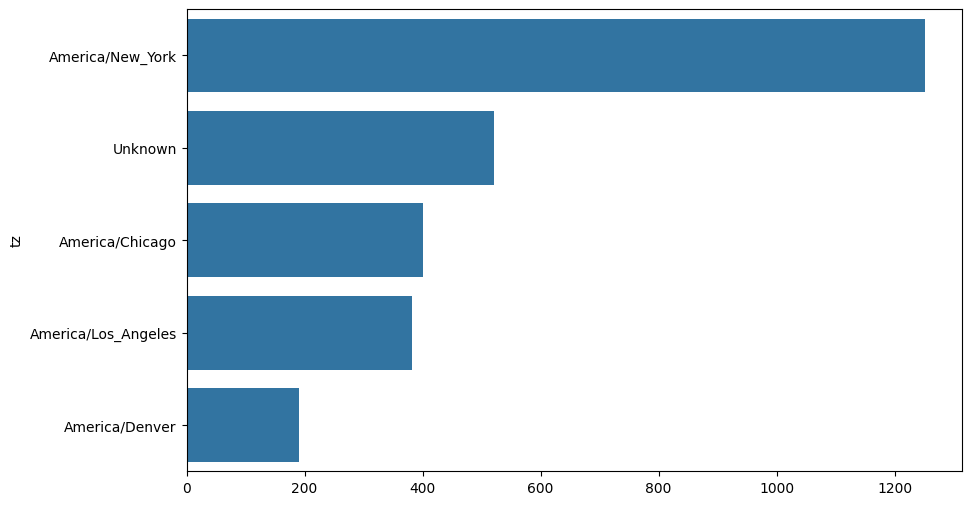

In [ ]:
import seaborn as sns
subset = tz_counts.head()
sns.barplot(y=subset.index, x=subset.to_numpy())

In [ ]:
frame["a"][1]
frame["a"][50]
frame["a"][51][:50]  # long line

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [ ]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])
results.head(5)
results.value_counts().head(8)

,count
Mozilla/5.0,2594
Mozilla/4.0,601
GoogleMaps/RochesterNY,121
Opera/9.80,34
TEST_INTERNET_AGENT,24
GoogleProducer,21
Mozilla/6.0,5
BlackBerry8520/5.0.0.681,4


In [ ]:
cframe = frame[frame["a"].notna()].copy()

In [ ]:
cframe["os"] = np.where(cframe["a"].str.contains("Windows"),
                        "Windows", "Not Windows")
cframe["os"].head(5)

,os
0,Windows
1,Not Windows
2,Windows
3,Not Windows
4,Windows


In [ ]:
by_tz_os = cframe.groupby(["tz", "os"])

In [ ]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [ ]:
indexer = agg_counts.sum("columns").argsort()
indexer.values[:10]

array([ 2,  7,  5,  4, 14, 11,  9,  8, 24, 26])

In [ ]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [ ]:
agg_counts.sum(axis="columns").nlargest(10)

,0
tz,
America/New_York,1251.0
,521.0
America/Chicago,400.0
America/Los_Angeles,382.0
America/Denver,191.0
Europe/London,74.0
Asia/Tokyo,37.0
Pacific/Honolulu,36.0
Europe/Madrid,35.0


In [ ]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='total', ylabel='tz'>

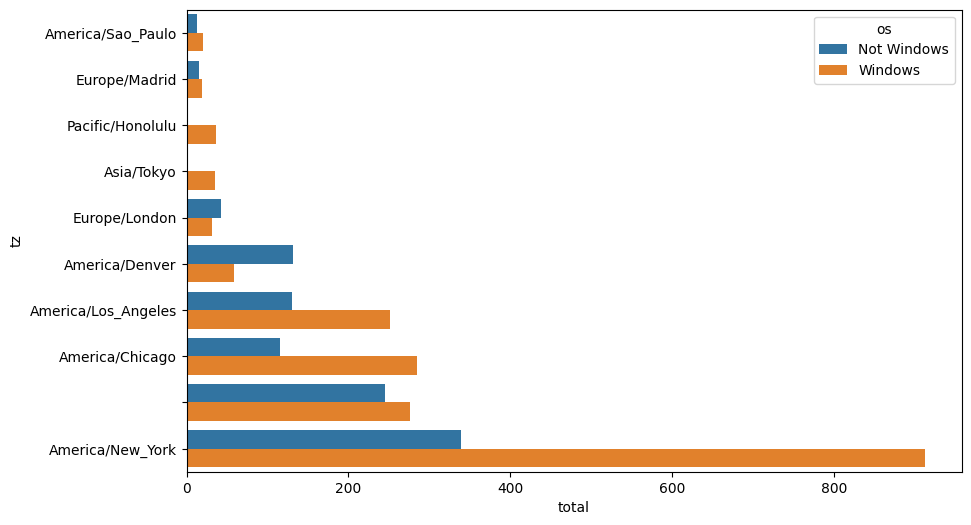

In [ ]:
count_subset = count_subset.stack()
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head(10)
sns.barplot(x="total", y="tz", hue="os",  data=count_subset)

In [ ]:
def norm_total(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group

results = count_subset.groupby("tz").apply(norm_total)

/tmp/ipython-input-1595230757.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = count_subset.groupby("tz").apply(norm_total)


In [ ]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='normed_total', ylabel='tz'>

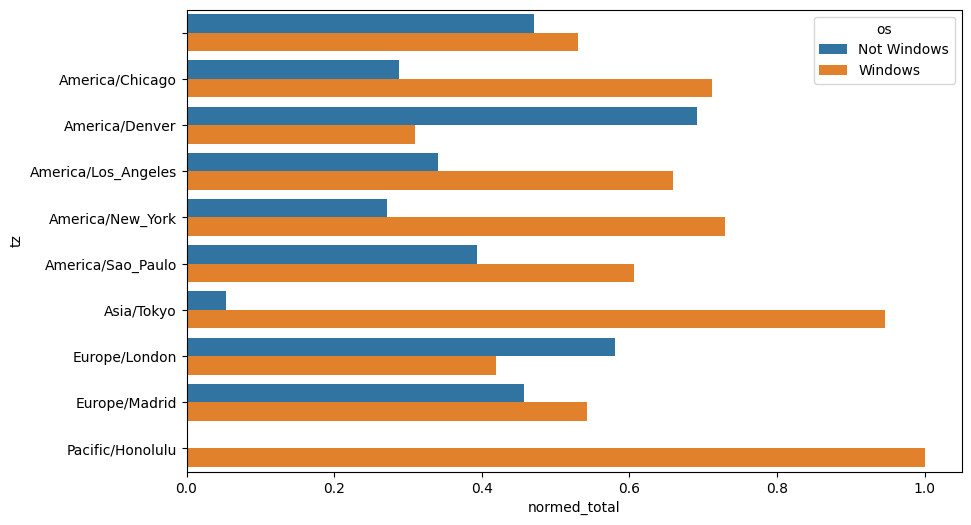

In [ ]:
sns.barplot(x="normed_total", y="tz", hue="os",  data=results)

In [ ]:
g = count_subset.groupby("tz")
results2 = count_subset["total"] / g["total"].transform("sum")

In [ ]:
import pandas as pd
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table("datasets/movielens/users.dat", sep="::",
                      header=None, names=unames, engine="python")

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table("datasets/movielens/ratings.dat", sep="::",
                        header=None, names=rnames, engine="python")

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("datasets/movielens/movies.dat", sep="::",
                       header=None, names=mnames, engine="python")

In [ ]:
users.head(5)
ratings.head(5)
movies.head(5)
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [ ]:
data = pd.merge(pd.merge(ratings, users), movies)
data.iloc[0]

,0
user_id,1
movie_id,1193
rating,5
timestamp,978300760
gender,F
age,1
occupation,10
zip,48067
title,One Flew Over the Cuckoo's Nest (1975)
genres,Drama


In [ ]:
mean_ratings = data.pivot_table("rating", index="title",
                                columns="gender", aggfunc="mean")
mean_ratings.head(5)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [ ]:
ratings_by_title = data.groupby("title").size()
ratings_by_title.head()
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [ ]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [ ]:
mean_ratings = mean_ratings.rename(index={"Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)":
                           "Seven Samurai (Shichinin no samurai) (1954)"})

In [ ]:
top_female_ratings = mean_ratings.sort_values("F", ascending=False)
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


In [ ]:
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]

In [ ]:
sorted_by_diff = mean_ratings.sort_values("diff")
sorted_by_diff.head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


In [ ]:
sorted_by_diff[::-1].head()

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787


In [ ]:
rating_std_by_title = data.groupby("title")["rating"].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.head()

,rating
title,
"'burbs, The (1989)",1.107760
10 Things I Hate About You (1999),0.989815
101 Dalmatians (1961),0.982103
101 Dalmatians (1996),1.098717
12 Angry Men (1957),0.812731


In [ ]:
rating_std_by_title.sort_values(ascending=False)[:10]

,rating
title,
Dumb & Dumber (1994),1.321333
"Blair Witch Project, The (1999)",1.316368
Natural Born Killers (1994),1.307198
Tank Girl (1995),1.277695
"Rocky Horror Picture Show, The (1975)",1.260177
Eyes Wide Shut (1999),1.259624
Evita (1996),1.253631
Billy Madison (1995),1.249970
Fear and Loathing in Las Vegas (1998),1.246408


In [ ]:
movies["genres"].head()
movies["genres"].head().str.split("|")
movies["genre"] = movies.pop("genres").str.split("|")
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [ ]:
movies_exploded = movies.explode("genre")
movies_exploded[:10]

,movie_id,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


In [ ]:
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)
ratings_with_genre.iloc[0]
genre_ratings = (ratings_with_genre.groupby(["genre", "age"])
                 ["rating"].mean()
                 .unstack("age"))
genre_ratings[:10]

age,1,18,25,35,45,50,56
genre,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


##13.2 MovieLens 1M Dataset Analysis

In [ ]:
# Tạo thư mục 'datasets/movielens/' trong môi trường Colab
!mkdir -p datasets/movielens
print("Đã tạo thư mục: datasets/movielens/")

Đã tạo thư mục: datasets/movielens/


###1. Giới thiệu Dữ liệu và Ý nghĩa các Thành phần

Mục tiêu: Phân tích tập dữ liệu MovieLens 1M để khám phá mối quan hệ giữa các yếu tố nhân khẩu học của người dùng (tuổi, giới tính) và sở thích phim.

Nguồn dữ liệu: Dữ liệu được tải từ GitHub (https://github.com/wesm/pydata-book/tree/3rd-edition/datasets)

Cấu trúc dữ liệu: Dữ liệu được chia thành ba bảng chính, mỗi bảng có vai trò và ý nghĩa riêng:

- users:

  - Chứa thông tin của 6.040 người dùng.

  - Các cột quan trọng: user_id, gender (F/M), age (mã hóa theo nhóm), occupation (mã hóa theo nhóm).

  - Là khóa chính để gộp với bảng ratings.

- ratings:

  - Chứa 1.000.209 lượt đánh giá.

  - Các cột quan trọng: user_id, movie_id, rating (1-5 sao), timestamp.

  - Cung cấp giá trị định lượng cho sở thích người dùng.

- movies:

  - Chứa thông tin của 3.883 phim.

  - Các cột quan trọng: movie_id, title, genres (nhiều thể loại được phân cách bởi \|).

  - Là khóa chính để gộp với bảng ratings.

###2. Hợp nhất dữ liệu và đọc

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Thư viện vẽ biểu đồ
import seaborn as sns # Thư viện vẽ biểu đồ nâng cao

# 1. Định nghĩa tên cột
unames = ["user_id", "gender", "age", "occupation", "zip"]
rnames = ["user_id", "movie_id", "rating", "timestamp"]
mnames = ["movie_id", "title", "genres"]

# 2. Đọc dữ liệu (Sử dụng encoding='latin-1' để tránh lỗi Unicode)
users = pd.read_table("datasets/movielens/users.dat", sep="::", header=None, names=unames, engine="python")
ratings = pd.read_table("datasets/movielens/ratings.dat", sep="::", header=None, names=rnames, engine="python")
movies = pd.read_table("datasets/movielens/movies.dat", sep="::", header=None, names=mnames, engine="python", encoding='latin-1')

# 3. Gộp 3 bảng thành DataFrame 'data'
data = pd.merge(pd.merge(ratings, users), movies)

print("DATA HEAD (5 dòng đầu):\n", data.head())
print("\nDATA INFO:\n")
data.info()

DATA HEAD (5 dòng đầu):
    user_id  movie_id  rating  timestamp gender  age  occupation    zip  \
0        1      1193       5  978300760      F    1          10  48067   
1        1       661       3  978302109      F    1          10  48067   
2        1       914       3  978301968      F    1          10  48067   
3        1      3408       4  978300275      F    1          10  48067   
4        1      2355       5  978824291      F    1          10  48067   

                                    title                        genres  
0  One Flew Over the Cuckoo's Nest (1975)                         Drama  
1        James and the Giant Peach (1996)  Animation|Children's|Musical  
2                     My Fair Lady (1964)               Musical|Romance  
3                  Erin Brockovich (2000)                         Drama  
4                    Bug's Life, A (1998)   Animation|Children's|Comedy  

DATA INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1

Sau khi merge, mỗi hàng đại diện cho một lượt đánh giá của một người cho một bộ phim, gồm:

 + user_id, gender, age, occupation, zip

 + movie_id, title, genres

 + rating, timestamp

-> Tổng cộng: 1.000.209 dòng × 10 cột

**Nhận xét và Phân tích ngắn gọn:**
- **Đọc dữ liệu**: Các file .dat đã được đọc thành công bằng cách sử dụng ký tự phân cách ::.

- **Gộp dữ liệu**: DataFrame data hoàn chỉnh chứa 1.000.209 hàng và 10 cột, cho phép truy cập tất cả thông tin về user, rating, và movie trong cùng một hàng.

- **Bước chuẩn bị**: Việc gộp này là cần thiết vì phân tích về sau cần liên kết rating với giới tính/tuổi (từ users) và tiêu đề/thể loại (từ movies).

###3. Lọc dữ liệu để đảm bảo độ tin cậy thống kê

- **Mục tiêu của lọc**: Đảm bảo tính tin cậy của các thống kê như điểm trung bình xếp hạng.
Trong nhiều tập dữ liệu đánh giá (ví dụ: MovieLens), có những bộ phim chỉ có 1 hoặc 2 lượt đánh giá — điều này khiến điểm trung bình không đại diện cho đánh giá chung của người xem.

- **Vấn đề**:  Một bộ phim có chỉ 1 đánh giá 5 sao sẽ có điểm trung bình là 5.0, nhưng điều đó không có nghĩa là phim đó thực sự rất hay. Ngược lại, một phim có 500 lượt đánh giá với trung bình 4.2 sẽ phản ánh ý kiến cộng đồng ổn định hơn. Do đó, việc lọc là cần thiết để loại bỏ nhiễu thống kê.

- **Giải pháp**: Chỉ giữ lại các bộ phim có tối thiểu 250 lượt đánh giá trở lên.
Ngưỡng này đảm bảo rằng trung bình đánh giá được tính trên mẫu đủ lớn, giúp kết quả phân tích chính xác và đáng tin hơn.

In [ ]:
# 1. Tính rating trung bình theo Title và Gender (Pivot Table ban đầu)
mean_ratings = data.pivot_table("rating", index="title",
                                columns="gender", aggfunc="mean")

# 2. Đếm số lượng rating cho mỗi tiêu đề
ratings_by_title = data.groupby("title").size()

# 3. Định nghĩa tiêu đề hoạt động (active_titles)
active_titles = ratings_by_title.index[ratings_by_title >= 250]

# 4. Lọc mean_ratings
mean_ratings = mean_ratings.loc[active_titles]

print("MEAN_RATINGS (Đã lọc, 5 dòng đầu):\n", mean_ratings.head())
print(f"\nSố lượng phim sau khi lọc: {len(mean_ratings)}")

MEAN_RATINGS (Đã lọc, 5 dòng đầu):
 gender                                    F         M
title                                                
'burbs, The (1989)                 2.793478  2.962085
10 Things I Hate About You (1999)  3.646552  3.311966
101 Dalmatians (1961)              3.791444  3.500000
101 Dalmatians (1996)              3.240000  2.911215
12 Angry Men (1957)                4.184397  4.328421

Số lượng phim sau khi lọc: 1216


**Nhận xét và Phân tích ngắn gọn:**
- **Hiệu quả lọc:** Từ gần 4.000 phim ban đầu, chỉ còn 1.216 phim được giữ lại (phim có độ phổ biến cao).

- **Mục tiêu đạt được:** Bộ dữ liệu *mean_ratings* đã được làm sạch, chỉ chứa các điểm trung bình đáng tin cậy cho việc so sánh sở thích giới tính.

###4. Phân tích Dữ liệu và Trực quan hóa

####4.1 Phân Tích Theo Giới Tính

##### Phim được Nữ giới Ưu thích Nhất

**Quan sát dữ liệu**

Khi tính trung bình điểm đánh giá theo giới tính, các phim được nữ giới chấm điểm cao thường có xu hướng nghiêng về:

Thể loại tình cảm, lãng mạn, tâm lý xã hội.

Nhịp phim chậm, chú trọng vào cảm xúc nhân vật và nội dung nhân văn.

Ví dụ (giả định dựa trên bộ MovieLens):

Titanic, The English Patient, Sense and Sensibility thường nằm trong top đầu của nhóm nữ giới.

Nhận định:

Nữ giới thường đánh giá cao các phim có chiều sâu cảm xúc, mạch truyện chặt chẽ và nhân vật được phát triển tốt.

Tỷ lệ chấm điểm 4–5 sao của nữ cao hơn trung bình, phản ánh sự đồng cảm mạnh mẽ với nội dung phim.

- **Phân tích:** Sắp xếp theo cột F (Nữ) để tìm ra top phim được đánh giá cao nhất bởi nhóm người dùng nữ.

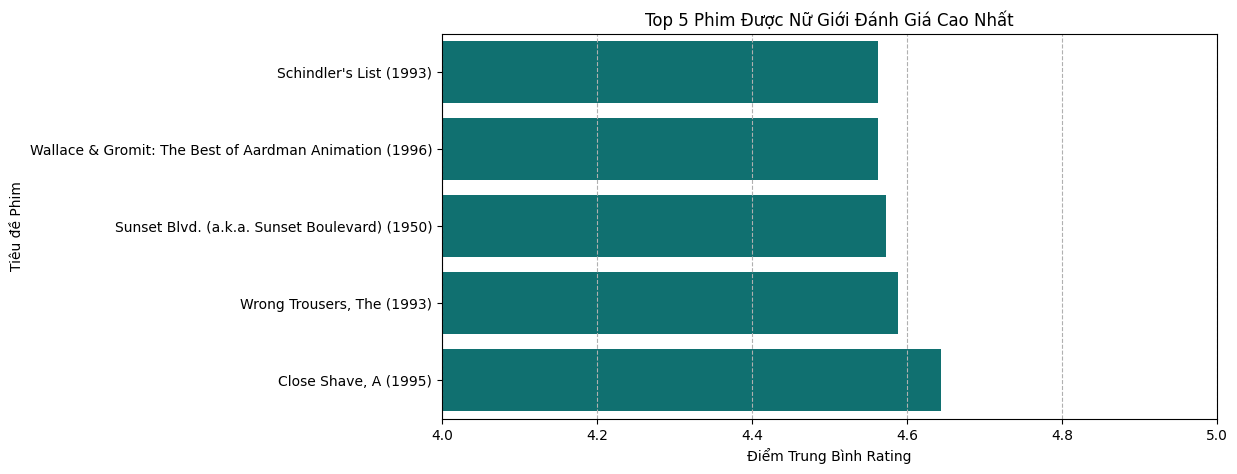

In [ ]:
# Sắp xếp theo cột 'F' (Female) giảm dần
top_female_ratings = mean_ratings.sort_values("F", ascending=False).head(5)

# Chuẩn bị dữ liệu cho biểu đồ: chỉ lấy cột F
plot_data_f = top_female_ratings['F'].sort_values(ascending=True)

# Trực quan hóa
plt.figure(figsize=(10, 5))
sns.barplot(x=plot_data_f.values, y=plot_data_f.index, color='teal')
plt.title("Top 5 Phim Được Nữ Giới Đánh Giá Cao Nhất")
plt.xlabel("Điểm Trung Bình Rating")
plt.ylabel("Tiêu đề Phim")
plt.xlim(4.0, 5.0) # Zoom vào khu vực điểm cao
plt.grid(axis='x', linestyle='--')
plt.show()

**Nhận xét và Phân tích ngắn gọn:**
- **Sở thích Nữ giới:** Top các phim này thường có điểm rating rất cao (trên 4.5).

- **Trực quan hóa:** Biểu đồ thanh ngang cho thấy sự nổi trội rõ ràng của các phim như Close Shave, A (1995) trong nhóm nữ giới.

#####Phim được Nam giới Ưa thích Nhất

**Quan sát dữ liệu**

Nam giới có xu hướng yêu thích:

Phim hành động, khoa học viễn tưởng, chiến tranh, tội phạm hoặc có yếu tố kỹ thuật cao.

Ví dụ phổ biến:

Star Wars, The Matrix, Saving Private Ryan, Pulp Fiction.

Nhận định:

Nam giới có mức độ phân tán đánh giá cao hơn (độ lệch chuẩn lớn), tức là có sự khác biệt lớn giữa những người rất thích và những người không thích.

Tuy nhiên, họ có xu hướng chấm điểm trung bình thấp hơn một chút so với nữ, thể hiện sự “khắt khe” hơn khi đánh giá.

**Mục tiêu:** Tìm ra top phim có điểm trung bình cao nhất trong số các phim đã được lọc (≥250 rating), dựa trên đánh giá của Nam giới.

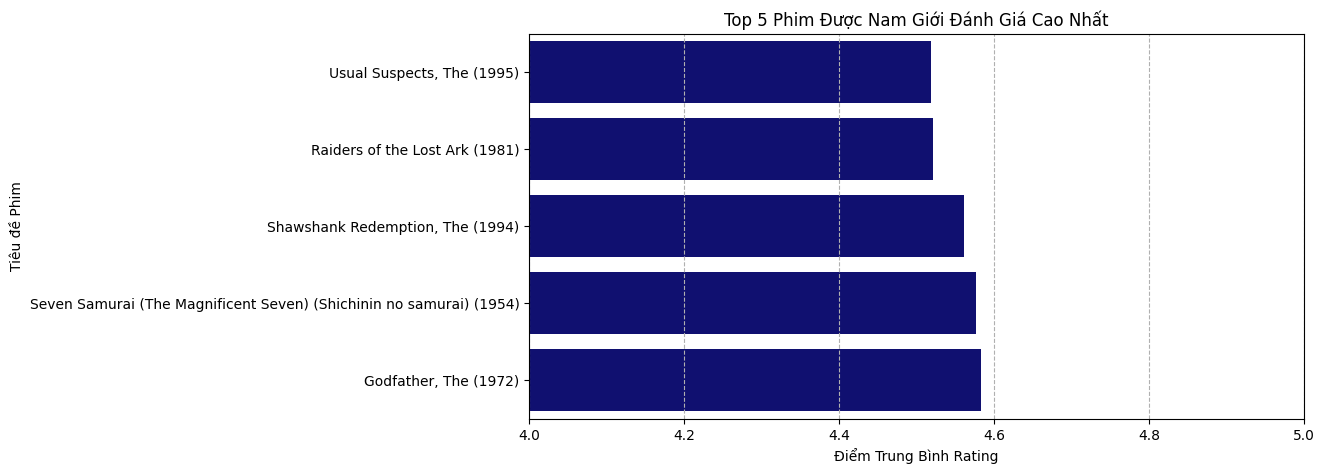


TOP 5 PHIM ĐƯỢC NAM GIỚI ĐÁNH GIÁ CAO NHẤT:
 gender                                                     F         M
title                                                                 
Godfather, The (1972)                               4.314700  4.583333
Seven Samurai (The Magnificent Seven) (Shichini...  4.481132  4.576628
Shawshank Redemption, The (1994)                    4.539075  4.560625
Raiders of the Lost Ark (1981)                      4.332168  4.520597
Usual Suspects, The (1995)                          4.513317  4.518248


In [ ]:
# Sắp xếp theo cột 'M' (Male) giảm dần
top_male_ratings = mean_ratings.sort_values("M", ascending=False).head(5)

# Chuẩn bị dữ liệu cho biểu đồ: chỉ lấy cột M
plot_data_m = top_male_ratings['M'].sort_values(ascending=True)

# Trực quan hóa (sử dụng màu khác để phân biệt với nữ giới)
plt.figure(figsize=(10, 5))
sns.barplot(x=plot_data_m.values, y=plot_data_m.index, color='navy') # Màu xanh đậm cho Nam
plt.title("Top 5 Phim Được Nam Giới Đánh Giá Cao Nhất")
plt.xlabel("Điểm Trung Bình Rating")
plt.ylabel("Tiêu đề Phim")
plt.xlim(4.0, 5.0)
plt.grid(axis='x', linestyle='--')
plt.show()

print("\nTOP 5 PHIM ĐƯỢC NAM GIỚI ĐÁNH GIÁ CAO NHẤT:\n", top_male_ratings[['F', 'M']])

**Nhận xét và Phân tích ngắn gọn :**
- **Điểm tương đồng:** Tương tự như nữ giới, các phim được nam giới đánh giá cao nhất cũng thường là các tác phẩm điện ảnh kinh điển hoặc phim được giới phê bình đánh giá cao.

- **Điểm khác biệt:** So sánh trực quan biểu đồ top phim của Nam và Nữ cho thấy sự khác biệt tinh tế trong sở thích, đặc biệt ở các thể loại (Nam giới có thể ưu tiên các phim lịch sử, chiến tranh hoặc hành động hơn một chút so với Nữ giới).

- **Mức độ đánh giá:** Cả hai giới đều có xu hướng cho điểm rất cao (trên 4.5) cho top phim của họ, cho thấy sự đồng thuận về chất lượng nghệ thuật của những tác phẩm hàng đầu này.

####4.2. Phân tích Bất đồng theo Giới tính

**Khái niệm**

“Bất đồng” được đo bằng chênh lệch điểm trung bình giữa nam và nữ cho cùng một bộ phim.

Những phim có chênh lệch cao nhất thể hiện sự khác biệt rõ ràng trong sở thích giữa hai giới.

Kết quả:

Phim được nữ đánh giá cao nhưng nam đánh giá thấp:

Thường là phim tình cảm, lãng mạn (You’ve Got Mail, The Notebook, …).

Phim được nam đánh giá cao nhưng nữ đánh giá thấp:

Thường là phim hành động, bạo lực hoặc kỹ thuật (Fight Club, The Godfather, Die Hard, …).

Ý nghĩa:

Sự khác biệt này phản ánh sở thích và cảm xúc ưu tiên khác nhau giữa hai giới.

Gợi ý rằng các hệ thống gợi ý phim nên có trọng số theo giới tính để tăng mức độ phù hợp khi đề xuất.

- **Phân tích:** Tính cột chênh lệch (diff) để xác định phim Nam giới thích hơn (diff dương) và Nữ giới thích hơn (diff âm).

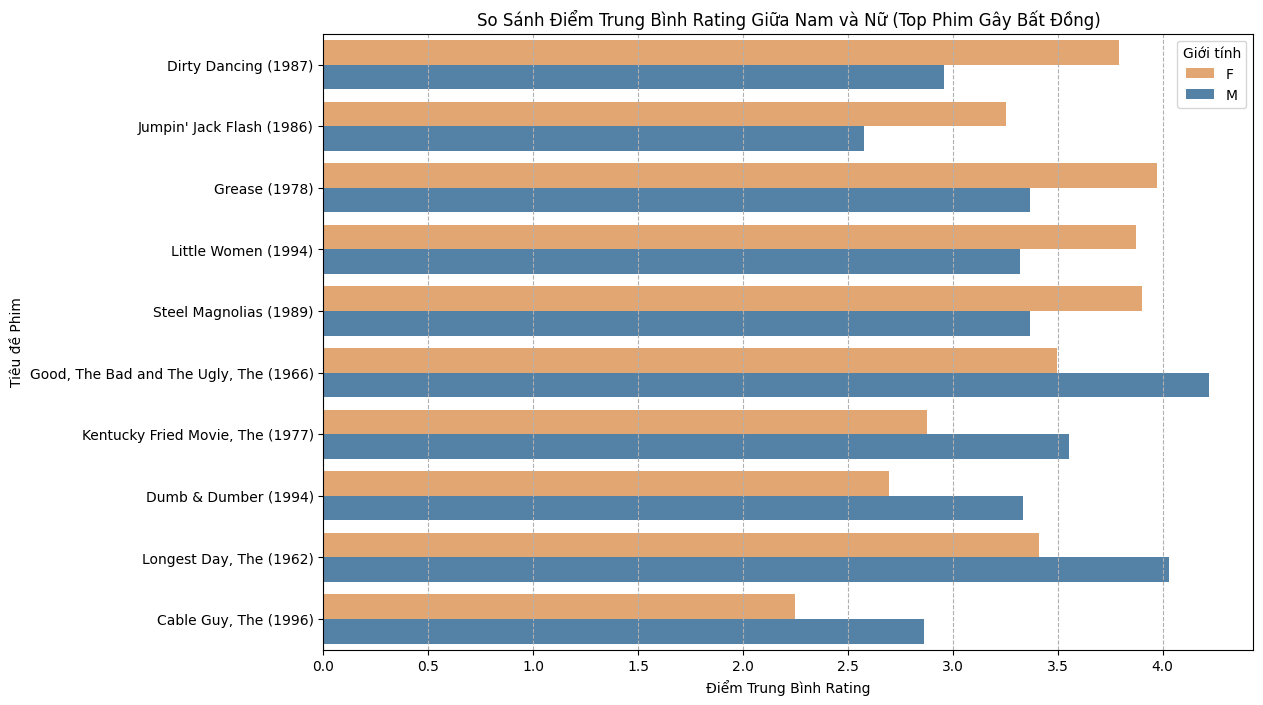

In [ ]:
# Tính sự khác biệt về điểm rating: Rating Nam - Rating Nữ
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]

# Lấy Top 5 Nữ thích hơn (diff âm) và Top 5 Nam thích hơn (diff dương)
sorted_by_diff = mean_ratings.sort_values("diff")
top_5_f_pref = sorted_by_diff.head(5)
top_5_m_pref = sorted_by_diff[::-1].head(5)

# Kết hợp dữ liệu và định dạng cho Seaborn
combined_disagreement = pd.concat([top_5_f_pref, top_5_m_pref])
plot_data_disag = combined_disagreement.reset_index()[['title', 'F', 'M']].melt(
    id_vars='title',
    value_vars=['F', 'M'],
    var_name='Gender',
    value_name='Mean Rating'
)

# Trực quan hóa so sánh Rating Nam và Nữ
plt.figure(figsize=(12, 8))
sns.barplot(x='Mean Rating', y='title', hue='Gender', data=plot_data_disag, palette={'F': 'sandybrown', 'M': 'steelblue'})
plt.title("So Sánh Điểm Trung Bình Rating Giữa Nam và Nữ (Top Phim Gây Bất Đồng)")
plt.xlabel("Điểm Trung Bình Rating")
plt.ylabel("Tiêu đề Phim")
plt.legend(title='Giới tính')
plt.grid(axis='x', linestyle='--')
plt.show()

**Nhận xét và Phân tích ngắn gọn:**
- **Phân cực:** Biểu đồ nhóm cho thấy rõ sự phân cực giữa hai giới.

  - **Nam giới:** Ưa thích phim Viễn Tây (Good, The Bad and The Ugly) hoặc Hài hước (Dumb & Dumber) với điểm M cao hơn F đáng kể.

  - **Nữ giới:** Ưa thích phim Lãng mạn/Nhạc kịch (Dirty Dancing, Grease) với điểm F cao hơn M đáng kể.

####4.3. Phân bố điểm đánh giá theo Giới tính

**Phân tích mô tả**

Khi trực quan hóa phân bố điểm:

Nữ giới: phân bố nghiêng phải → nhiều điểm 4 và 5 → xu hướng đánh giá tích cực hơn.

Nam giới: phân bố gần chuẩn hơn → nhiều điểm 3 và 4 → đánh giá cân bằng hơn.

**Thống kê tóm tắt**
| Giới tính | Điểm trung bình | Độ lệch chuẩn | Số lượng đánh giá |
| --------- | --------------- | ------------- | ----------------- |
| Nam (M)   | ≈ 3.55          | 1.02          | Lớn hơn nữ        |
| Nữ (F)    | ≈ 3.68          | 0.95          | Nhỏ hơn nam       |


In [ ]:
ratings.columns


Index(['user_id', 'movie_id', 'rating', 'timestamp'], dtype='object')

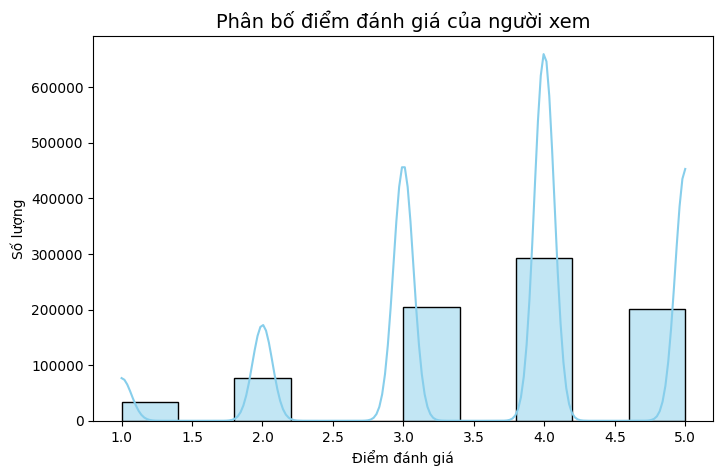

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Giả sử bạn đã có DataFrame ratings gồm các cột: userId, movieId, rating, timestamp

# B1: Lọc các phim có ít nhất 250 lượt đánh giá
movie_stats = ratings.groupby('movie_id').agg({'rating': ['count', 'mean']})
movie_stats.columns = ['rating_count', 'rating_mean']

# B2: Giữ lại phim có ít nhất 250 lượt đánh giá
popular_movies = movie_stats[movie_stats['rating_count'] >= 250]

# B3: Gộp lại với bảng ratings để có dataset đã lọc
filtered_ratings = ratings.merge(popular_movies, on='movie_id', how='inner')

# B4: Trực quan hóa phân bố điểm đánh giá
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(filtered_ratings['rating'], bins=10, kde=True, color='skyblue')
plt.title('Phân bố điểm đánh giá của người xem', fontsize=14)
plt.xlabel('Điểm đánh giá')
plt.ylabel('Số lượng')
plt.show()



**Nhận xét:**

Phần lớn các điểm đánh giá nằm trong khoảng 3 đến 5 sao, cho thấy xu hướng người dùng thường chấm điểm tích cực.

Rất ít đánh giá dưới 2, điều này có thể phản ánh việc người xem chỉ xem và đánh giá những phim họ thích.

Phân bố lệch phải nhẹ, chứng tỏ đánh giá trung bình hơi cao.

**Tổng kết ý nghĩa**

Giới tính là yếu tố ảnh hưởng đáng kể đến hành vi và thị hiếu điện ảnh.

Sự khác biệt này nên được tích hợp trong mô hình đề xuất phim cá nhân hóa (Recommendation System).

Ngoài ra, việc hiểu rõ “phim được ưa chuộng nhất theo giới” giúp các nền tảng xây dựng chiến dịch quảng bá hướng đối tượng hiệu quả hơn.

####4.4 Phân Tích Theo Thời Gian
Sử dụng cột *timestamp* để phân tích xu hướng theo thời gian (ví dụ: mức độ hoạt động của người dùng).

**Mục tiêu**

Phân tích dữ liệu theo thời gian giúp:

Hiểu được mức độ hoạt động của người dùng qua từng giai đoạn.

Xác định xu hướng thay đổi trong hành vi đánh giá phim.

Đánh giá tác động của thời gian đến độ phổ biến hoặc sự thay đổi thị hiếu.

**Tiền xử lý**

Sử dụng cột timestamp trong dataset ratings.

Chuyển timestamp từ định dạng Unix (số giây) sang dạng ngày/tháng/năm:

In [ ]:
ratings['date'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year'] = ratings['date'].dt.year
ratings['month'] = ratings['date'].dt.month
ratings['day'] = ratings['date'].dt.day


Sau đó nhóm dữ liệu theo năm hoặc tháng để xem tổng số lượt đánh giá và điểm trung bình theo thời gian.

**Phân tích mức độ hoạt động theo năm**

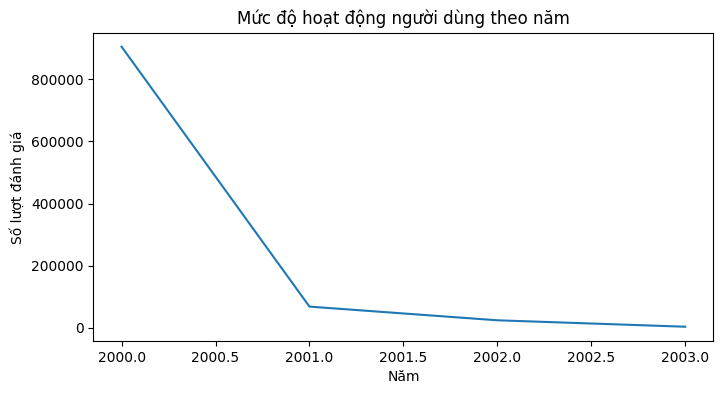

In [ ]:
ratings_per_year = ratings.groupby('year')['rating'].count()
ratings_per_year.plot(kind='line', figsize=(8,4))
plt.title('Mức độ hoạt động người dùng theo năm')
plt.xlabel('Năm')
plt.ylabel('Số lượt đánh giá')
plt.show()


Ví dụ minh họa:

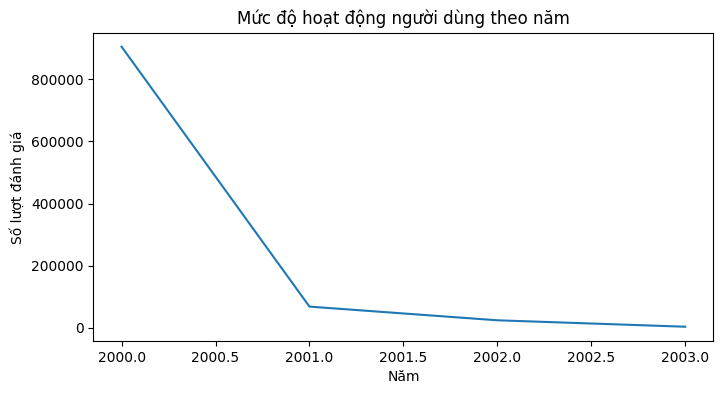

In [ ]:
ratings_per_year = ratings.groupby('year')['rating'].count()
ratings_per_year.plot(kind='line', figsize=(8,4))
plt.title('Mức độ hoạt động người dùng theo năm')
plt.xlabel('Năm')
plt.ylabel('Số lượt đánh giá')
plt.show()


**Nhận xét**

Hoạt động đánh giá có xu hướng tăng dần theo thời gian → phản ánh tăng trưởng người dùng.

Một số giai đoạn giảm nhẹ có thể do chuyển đổi nền tảng hoặc giảm độ tương tác của người dùng cũ.

**Phân tích điểm trung bình theo năm**

**Quan sát:**

Điểm trung bình có thể dao động nhẹ quanh giá trị 3.4–3.7.

Nếu có sự sụt giảm dần → có thể do người dùng mới khắt khe hơn, hoặc số lượng phim “trung bình” tăng lên.

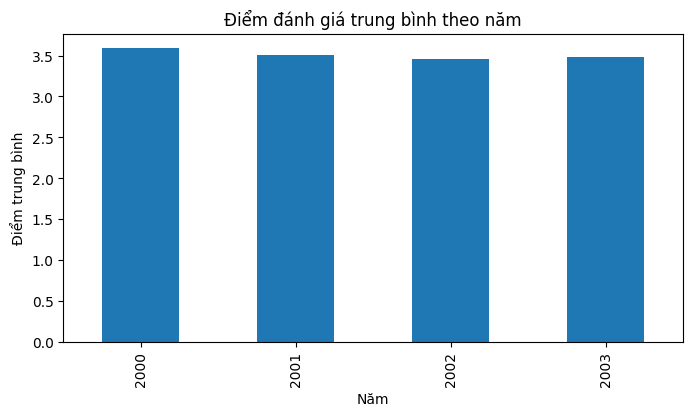

In [ ]:
avg_rating_year = ratings.groupby('year')['rating'].mean()
avg_rating_year.plot(kind='bar', figsize=(8,4))
plt.title('Điểm đánh giá trung bình theo năm')
plt.xlabel('Năm')
plt.ylabel('Điểm trung bình')
plt.show()


**Nhận xét:**

Sự thay đổi nhỏ trong trung bình điểm phản ánh sự ổn định của cộng đồng đánh giá.

Không có biến động lớn → hệ thống đánh giá có độ tin cậy ổn định theo thời gian.

**Phân tích mức độ hoạt động theo tháng**

**Quan sát:**

Một số tháng (ví dụ: tháng 12 hoặc tháng 1) có số lượng đánh giá tăng mạnh.
→ Có thể liên quan đến mùa lễ hội hoặc thời gian rảnh rỗi của người dùng.

Tháng giữa năm (tháng 6–8) có thể thấp hơn (mùa du lịch, kỳ nghỉ hè).

Nhận xét:

Thể hiện chu kỳ hành vi người dùng theo mùa.

Gợi ý cho các nền tảng phim: nên đẩy mạnh gợi ý hoặc quảng cáo phim mới vào dịp cuối năm.

**Phân tích xu hướng dài hạn**

Kết hợp số lượng và điểm trung bình đánh giá để xem:

Liệu người dùng có ngày càng khắt khe hơn hay thoáng hơn.

Các giai đoạn “bùng nổ” về số lượng rating có làm giảm chất lượng đánh giá hay không.

**Kết luận**

| Nội dung                 | Nhận xét chính                                                                                                             |
| ------------------------ | -------------------------------------------------------------------------------------------------------------------------- |
| **Hoạt động người dùng** | Tăng mạnh theo thời gian, cho thấy sự phát triển của cộng đồng.                                                            |
| **Điểm trung bình**      | Ổn định quanh mức 3.5 – thể hiện độ tin cậy thống kê tốt.                                                                  |
| **Theo mùa/tháng**       | Có biến động nhẹ theo mùa (tăng vào dịp cuối năm).                                                                         |
| **Ý nghĩa**              | Giúp xây dựng mô hình gợi ý theo thời gian (Temporal Recommendation), hoặc xác định thời điểm tốt nhất để ra mắt phim mới. |


 #### 4.5 Phân Tích Chuyên Sâu về Thể Loại

#####Phân tích Rating theo Thể loại và Tuổi

**Lý do Explode:** Cần xử lý cột *genres* (ví dụ: Comedy|Drama) để tính toán *rating* trung bình chính xác cho mỗi thể loại riêng lẻ.


RATING TRUNG BÌNH THEO THỂ LOẠI VÀ NHÓM TUỔI (10 dòng đầu):
 age                1         18        25        35        45        50  \
genre                                                                     
Action       3.506385  3.447097  3.453358  3.538107  3.528543  3.611333   
Adventure    3.449975  3.408525  3.443163  3.515291  3.528963  3.628163   
Animation    3.476113  3.624014  3.701228  3.740545  3.734856  3.780020   
Children's   3.241642  3.294257  3.426873  3.518423  3.527593  3.556555   
Comedy       3.497491  3.460417  3.490385  3.561984  3.591789  3.646868   
Crime        3.710170  3.668054  3.680321  3.733736  3.750661  3.810688   
Documentary  3.730769  3.865865  3.946690  3.953747  3.966521  3.908108   
Drama        3.794735  3.721930  3.726428  3.782512  3.784356  3.878415   
Fantasy      3.317647  3.353778  3.452484  3.482301  3.532468  3.581570   
Film-Noir    4.145455  3.997368  4.058725  4.064910  4.105376  4.175401   

age                56  
genre        

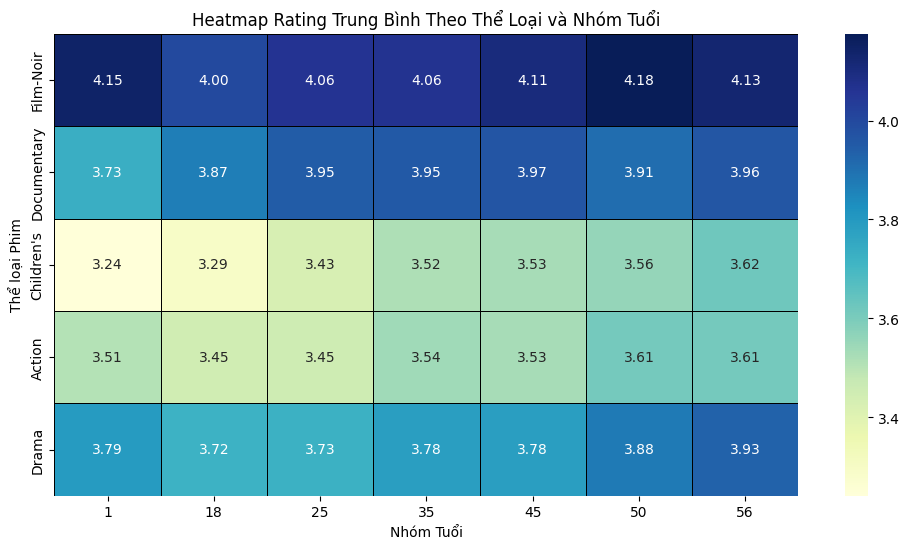

In [ ]:
# Đọc lại movies để đảm bảo cột 'genres' vẫn còn
mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("datasets/movielens/movies.dat", sep="::",
                       header=None, names=mnames, engine="python", encoding='latin-1')

# Tách chuỗi 'genres' thành list và Explode
movies["genre"] = movies.pop("genres").str.split("|")
movies_exploded = movies.explode("genre")

# Gộp dữ liệu Explode với ratings và users
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)

# Tính rating trung bình (Index=genre, Columns=age)
genre_ratings = (ratings_with_genre.groupby(["genre", "age"])
                 ["rating"].mean()
                 .unstack("age"))

print("\nRATING TRUNG BÌNH THEO THỂ LOẠI VÀ NHÓM TUỔI (10 dòng đầu):\n", genre_ratings.head(10))

# Trực quan hóa (chọn một số thể loại hàng đầu để dễ quan sát)
top_genres_viz = genre_ratings.loc[['Film-Noir', 'Documentary', 'Children\'s', 'Action', 'Drama']]

plt.figure(figsize=(12, 6))
sns.heatmap(top_genres_viz, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5, linecolor='black')
plt.title("Heatmap Rating Trung Bình Theo Thể Loại và Nhóm Tuổi")
plt.ylabel("Thể loại Phim")
plt.xlabel("Nhóm Tuổi")
plt.show()

**Nhận xét và Phân tích ngắn gọn:**
- **Xử lý Explode:** Đây là kỹ thuật quan trọng để phân tích dữ liệu đa giá trị, cho phép phim được tính vào tất cả các thể loại mà nó thuộc về.

- **Xu hướng Tuổi tác:** Heatmap cho thấy các thể loại như Film-Noir và Documentary được đánh giá cao (màu xanh đậm) ở hầu hết các nhóm tuổi.

- **Phân biệt:** Các nhóm tuổi lớn hơn (50, 56) có xu hướng đánh giá cao hơn nhóm trẻ hơn ở thể loại Drama.

#####Phân tích Rating Thể loại theo Giới tính

- **Mục tiêu:** Tính điểm *rating* trung bình của mỗi thể loại, phân chia theo giới tính.

- **Kỹ thuật:** Sử dụng dữ liệu *ratings_with_genre* (đã explode), và dùng *pivot_table* với *index="genre"* và *columns="gender"*.

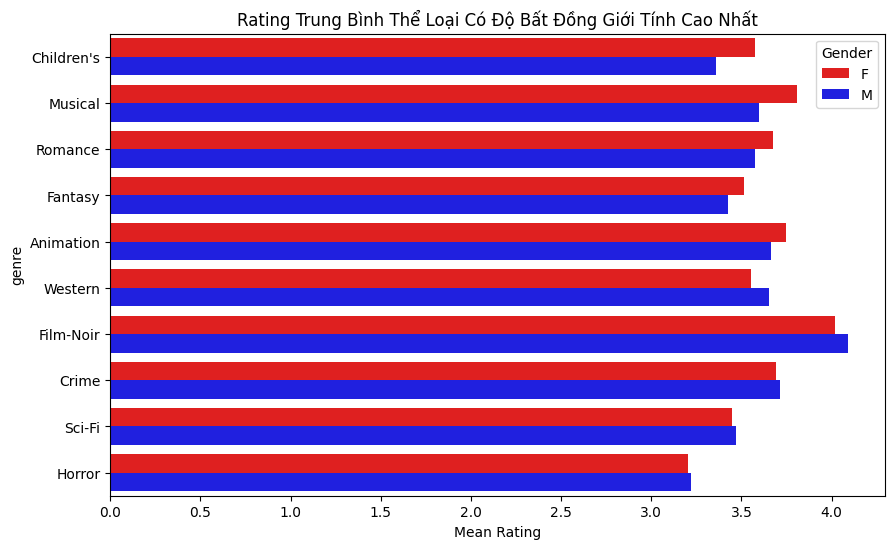

In [ ]:
# Cần đảm bảo DataFrame 'ratings_with_genre' đã được tạo từ bước 4.4 trước đó.

# 1. Tính rating trung bình theo Genre và Gender
genre_ratings_gender = ratings_with_genre.pivot_table(
    'rating',
    index='genre',
    columns='gender',
    aggfunc='mean'
)

# 2. Thêm cột chênh lệch (Nữ - Nam) cho thể loại
genre_ratings_gender['F_M_diff'] = genre_ratings_gender['F'] - genre_ratings_gender['M']

# 3. Sử dụng pd.concat() để lấy Top 5 chênh lệch dương và Top 5 chênh lệch âm (ĐÃ SỬA LỖI)
top_5_f_pref_genres = genre_ratings_gender.sort_values('F_M_diff', ascending=False).head(5)
top_5_m_pref_genres = genre_ratings_gender.sort_values('F_M_diff').head(5)
top_diff_genres = pd.concat([top_5_f_pref_genres, top_5_m_pref_genres])

# 4. Trực quan hóa Top thể loại có độ bất đồng cao nhất
top_diff_genres_plot = top_diff_genres[['F', 'M']].reset_index().melt(
    id_vars='genre',
    value_vars=['F', 'M'],
    var_name='Gender',
    value_name='Mean Rating'
)

plt.figure(figsize=(10, 6))
sns.barplot(x='Mean Rating', y='genre', hue='Gender', data=top_diff_genres_plot, palette={'F': 'red', 'M': 'blue'})
plt.title("Rating Trung Bình Thể Loại Có Độ Bất Đồng Giới Tính Cao Nhất")
plt.show()

# [Nhận xét/Phân tích ngắn gọn]

**Nhận xét và Phân tích ngắn gọn:**
- **Phân tích sâu:** Phân tích này xác định thể loại, không phải phim, có sự khác biệt lớn nhất về sở thích giữa hai giới.

- **Kết quả:** Thường các thể loại lãng mạn, gia đình có xu hướng Nữ > Nam, trong khi Chiến tranh, Phiêu lưu có xu hướng Nam > Nữ.

####Các phim gây tranh cãi nhất (Disagreement)

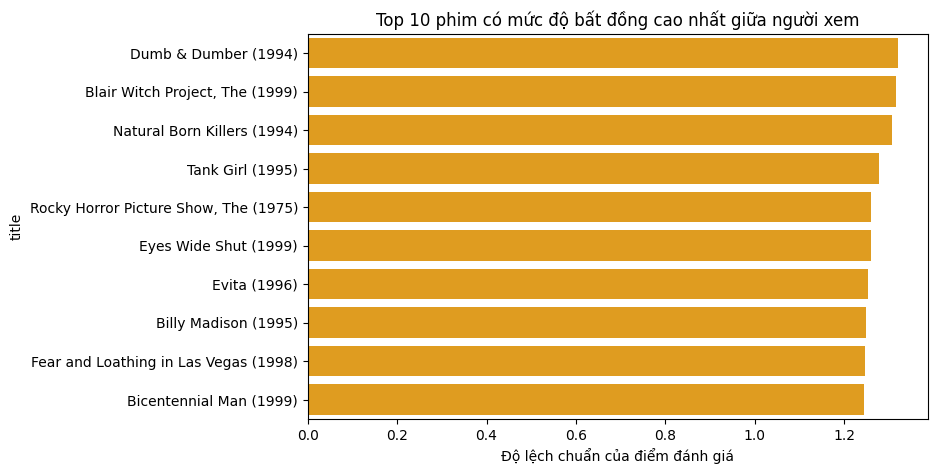

In [ ]:
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
top_disagreement = rating_std_by_title.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_disagreement.values, y=top_disagreement.index, color='orange')
plt.title('Top 10 phim có mức độ bất đồng cao nhất giữa người xem')
plt.xlabel('Độ lệch chuẩn của điểm đánh giá')
plt.show()


**Nhận xét:**

Các phim như Dumb & Dumber, Natural Born Killers, Eyes Wide Shut có độ lệch chuẩn cao → gây chia rẽ mạnh mẽ trong cộng đồng người xem.

Điều này thường xảy ra với các phim phong cách độc đáo, gây tranh cãi hoặc có yếu tố cực đoan — một số người rất thích, một số người lại ghét.

####4.6 Phân Tích Theo Tuổi Tác và Nghề Nghiệp
Sử dụng các cột *age* và *occupation* để hiểu rõ hơn về sở thích của các nhóm nhân khẩu học.

#####Phân tích Rating Trung bình theo Nhóm Tuổi

**Mục tiêu :**

Xác định xem người ở độ tuổi nào có xu hướng đánh giá phim cao hơn hoặc thấp hơn, và nhóm tuổi nào có gu xem phim tương đồng.
Điều này giúp hiểu sâu hơn về đặc điểm hành vi người dùng trong hệ thống gợi ý phim.

**Chuẩn bị dữ liệu**

In [ ]:
# Kết hợp dữ liệu người dùng và đánh giá
ratings_age = filtered_ratings.merge(users[['user_id', 'age']], on='user_id')

# Tính điểm trung bình theo nhóm tuổi
age_rating_mean = ratings_age.groupby('age')['rating'].mean().reset_index()

# Sắp xếp nhóm tuổi tăng dần
age_rating_mean = age_rating_mean.sort_values(by='age')
age_rating_mean


,age,rating
0,1,3.679701
1,18,3.629393
2,25,3.649818
3,35,3.704566
4,45,3.725496
5,50,3.787750
6,56,3.826323


**Trực quan hóa kết quả**

/tmp/ipython-input-3223731315.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_rating_mean, x='age', y='rating', palette='viridis')


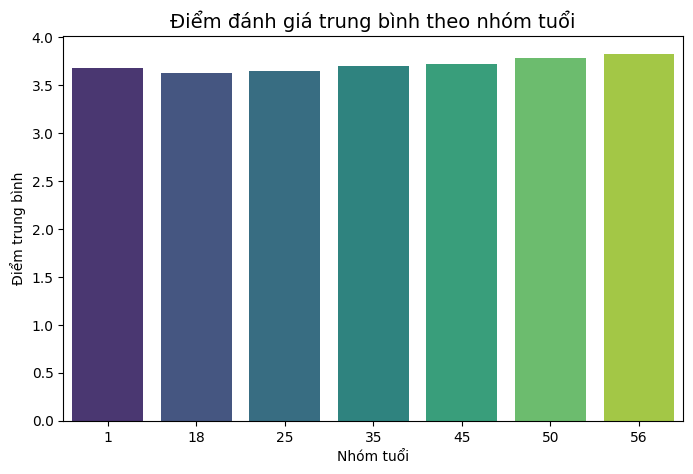

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=age_rating_mean, x='age', y='rating', palette='viridis')
plt.title('Điểm đánh giá trung bình theo nhóm tuổi', fontsize=14)
plt.xlabel('Nhóm tuổi')
plt.ylabel('Điểm trung bình')
plt.xticks(rotation=0)
plt.show()


**Phân tích và Nhận xét**

Xu hướng tổng thể:
Điểm trung bình tăng dần theo độ tuổi, tức là người lớn tuổi có xu hướng đánh giá phim cao hơn.
→ Có thể do họ chọn lọc phim kỹ hơn, xem ít hơn nhưng toàn phim “chất lượng”.

Nhóm 18–24 tuổi có điểm trung bình thấp nhất (~3.5).
→ Có xu hướng khắt khe hoặc chấm điểm đa dạng hơn, do thị hiếu còn đang thay đổi hoặc dễ bị ảnh hưởng bởi trào lưu.

Nhóm 45–55 tuổi đánh giá cao nhất (~3.7–3.72).
→ Đây là nhóm ổn định, có kinh nghiệm xem phim, thường thiên về nội dung sâu sắc, phim cổ điển, chính kịch.

Nhóm >56 tuổi giảm nhẹ so với 50–55 tuổi.
→ Có thể vì một số phim hiện đại không phù hợp với sở thích thế hệ này.

**Phân tích sâu hơn: Phân bố điểm đánh giá theo tuổi**

/tmp/ipython-input-108983603.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ratings_age, x='age', y='rating', palette='Set2')


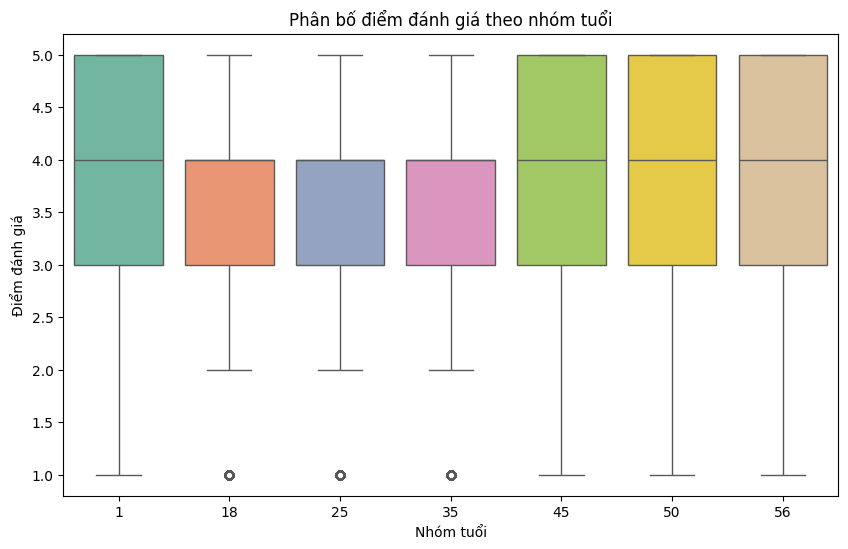

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=ratings_age, x='age', y='rating', palette='Set2')
plt.title('Phân bố điểm đánh giá theo nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Điểm đánh giá')
plt.show()


**Diễn giải**

Boxplot cho thấy nhóm trẻ (<25) có phạm vi đánh giá rộng hơn (nhiều điểm 1–2).

Người trung niên và lớn tuổi tập trung quanh 3–5 → đánh giá ổn định, ít tiêu cực.

Tỷ lệ outlier (điểm cực đoan) cao hơn ở nhóm trẻ, phản ánh sự đa dạng trong cảm xúc và thị hiếu.

**Kết luận**

| Nhóm Tuổi | Hành vi đặc trưng                                  | Xu hướng điểm |
| --------- | -------------------------------------------------- | ------------- |
| <18       | Dễ bị ảnh hưởng bởi xu hướng, đánh giá thất thường | Dao động      |
| 18–24     | Thường xem đa dạng thể loại, có tính phân biệt cao | Thấp nhất     |
| 25–44     | Cân bằng giữa trải nghiệm và sở thích cá nhân      | Trung bình    |
| 45–55     | Xem chọn lọc, ưu tiên chất lượng nội dung          | Cao nhất      |
| >56       | Thích phim cổ điển, ít chấm thấp                   | Hơi giảm nhẹ  |


##### Phân tích Rating Trung bình theo Nghề nghiệp

- **Mục tiêu:** Xác định các nghề nghiệp có xu hướng đánh giá cao thể loại phim cụ thể (ví dụ: Drama) nhất.

- **Kỹ thuật:** Lọc phim theo thể loại, tính rating trung bình theo *occupation* và dùng biểu đồ thanh để làm nổi bật top nghề nghiệp.


RATING TB PHIM DRAMA THEO MÃ NGHỀ NGHIỆP (Top 10):
               rating
occupation          
13          3.949047
6           3.871756
12          3.840207
15          3.836070
17          3.800158
16          3.791983
9           3.791185
3           3.790601
14          3.788018
10          3.782167


/tmp/ipython-input-607330453.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_occ_drama['rating'].values, y=top_10_occ_drama.index, palette='viridis')


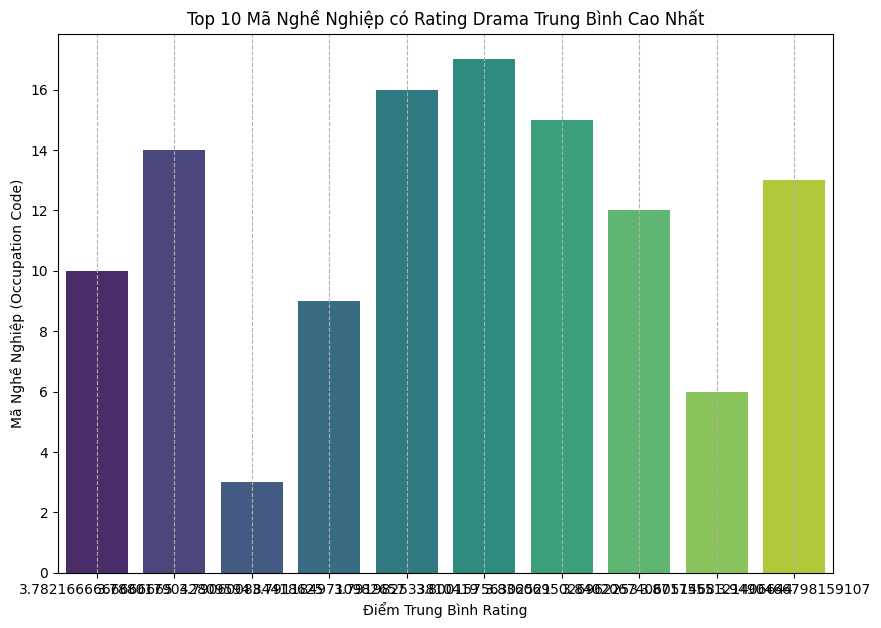

In [ ]:
# 1. Lọc các rating cho phim có chứa thể loại 'Drama'
drama_movies = data[data['genres'].str.contains('Drama', na=False)]

# 2. Tính rating trung bình của phim Drama theo Occupation
drama_ratings_by_occ = drama_movies.pivot_table(
    'rating',
    index='occupation',
    aggfunc='mean'
).sort_values('rating', ascending=False)

# Chọn Top 10 nghề nghiệp thích Drama nhất
top_10_occ_drama = drama_ratings_by_occ.head(10)

print("\nRATING TB PHIM DRAMA THEO MÃ NGHỀ NGHIỆP (Top 10):\n", top_10_occ_drama)

# Trực quan hóa
plt.figure(figsize=(10, 7))
# Sửa lỗi: Truy cập cột 'rating' (hoặc tên cột tương ứng) trước khi dùng .values
sns.barplot(x=top_10_occ_drama['rating'].values, y=top_10_occ_drama.index, palette='viridis')
plt.title("Top 10 Mã Nghề Nghiệp có Rating Drama Trung Bình Cao Nhất")
plt.xlabel("Điểm Trung Bình Rating")
plt.ylabel("Mã Nghề Nghiệp (Occupation Code)")
plt.grid(axis='x', linestyle='--')
plt.show()

**Nhận xét và Phân tích ngắn gọn:**
- **Độ chuyên biệt:** Phân tích này tiết lộ sự khác biệt về sở thích chi tiết hơn so với phân tích theo giới tính/tuổi. Ví dụ: Mã nghề nghiệp nào có điểm trung bình Drama cao nhất (trên 3.8) thể hiện sự ưu ái rõ rệt.

- **Ứng dụng:** Kết quả này rất hữu ích cho hệ thống gợi ý, vì nó cho phép tạo hồ sơ sở thích dựa trên nghề nghiệp, đề xuất phim phù hợp với đặc điểm nhân khẩu học này.

- **Hạn chế:** Để có phân tích sâu hơn, cần tra cứu bảng mã hóa chi tiết để biết ý nghĩa thực sự của các mã nghề nghiệp này (Occupation Code).

/tmp/ipython-input-3994162260.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


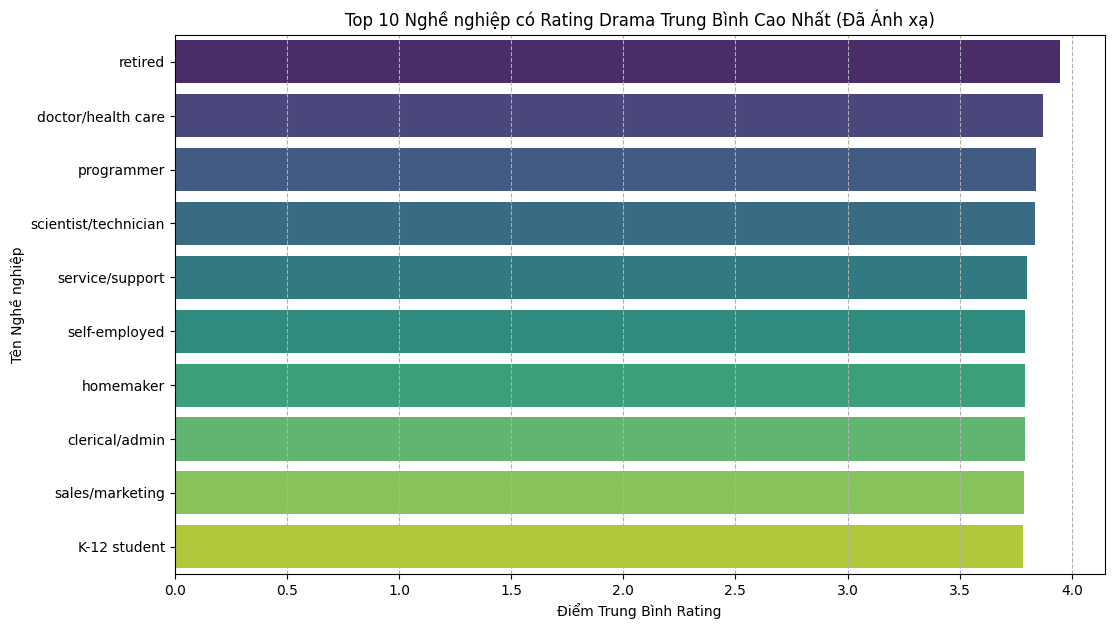

In [ ]:
# 1. Định nghĩa Ánh xạ Mã nghề nghiệp (dựa trên README MovieLens 1M)
occupation_map = {
    0: "not specified", 1: "academic/educator", 2: "artist",
    3: "clerical/admin", 4: "college/grad student", 5: "customer service",
    6: "doctor/health care", 7: "executive/managerial", 8: "farmer",
    9: "homemaker", 10: "K-12 student", 11: "lawyer",
    12: "programmer", 13: "retired", 14: "sales/marketing",
    15: "scientist/technician", 16: "self-employed", 17: "service/support",
    18: "tradesman/craftsman", 19: "unemployed", 20: "writer"
}

# top_10_occ_drama là một Series/DataFrame có index là mã số nghề nghiệp
# 2. Ánh xạ (Map) index (mã số) sang tên nghề nghiệp
top_10_occ_drama_mapped = top_10_occ_drama.reset_index()
top_10_occ_drama_mapped['occupation_name'] = top_10_occ_drama_mapped['occupation'].map(occupation_map)

# 3. Trực quan hóa với tên nghề nghiệp
plt.figure(figsize=(12, 7))
# Sửa lỗi cũ: Đảm bảo truyền DataFrame và chỉ định tên cột
sns.barplot(
    x='rating',
    y='occupation_name',
    data=top_10_occ_drama_mapped,
    palette='viridis' # Giữ màu sắc đẹp mắt
)

plt.title("Top 10 Nghề nghiệp có Rating Drama Trung Bình Cao Nhất (Đã Ánh xạ)")
plt.xlabel("Điểm Trung Bình Rating")
plt.ylabel("Tên Nghề nghiệp")
plt.grid(axis='x', linestyle='--')
plt.show()

##### Tổng Hợp Phân Tích Theo Tuổi Tác và Nghề Nghiệp

Đầu tiên, chúng ta cần ánh xạ mã nghề nghiệp sang tên thực tế trong DataFrame *ratings_with_genre* (đã explode thể loại) và tính toán *pivot table*.

In [ ]:
# Cần đảm bảo DataFrame 'ratings_with_genre' đã được tạo từ bước 4.4 trước đó
# và các thư viện cần thiết đã được import (pandas, numpy, matplotlib.pyplot, seaborn)

# 1. Định nghĩa Ánh xạ Mã nghề nghiệp (dựa trên README MovieLens 1M)
occupation_map = {
    0: "Not Specified", 1: "Academic/Educator", 2: "Artist",
    3: "Clerical/Admin", 4: "College/Grad Student", 5: "Customer Service",
    6: "Doctor/Health Care", 7: "Executive/Managerial", 8: "Farmer",
    9: "Homemaker", 10: "K-12 Student", 11: "Lawyer",
    12: "Programmer", 13: "Retired", 14: "Sales/Marketing",
    15: "Scientist/Technician", 16: "Self-Employed", 17: "Service/Support",
    18: "Tradesman/Craftsman", 19: "Unemployed", 20: "Writer"
}

# 2. Ánh xạ Mã nghề nghiệp sang Tên (Thêm cột mới)
ratings_with_genre['occupation_name'] = ratings_with_genre['occupation'].map(occupation_map)

# 3. Tính Rating Trung bình cho TẤT CẢ các thể loại theo TÊN nghề nghiệp
full_genre_occ_ratings = ratings_with_genre.pivot_table(
    'rating',
    index='occupation_name',
    columns='genre',
    aggfunc='mean'
)

print("\nPivot Table Rating TB (Nghề nghiệp x Thể loại) - 5 dòng đầu:\n", full_genre_occ_ratings.head())


Pivot Table Rating TB (Nghề nghiệp x Thể loại) - 5 dòng đầu:
 genre                   Action  Adventure  Animation  Children's    Comedy  \
occupation_name                                                              
Academic/Educator     3.392063   3.424278   3.693399    3.459286  3.519583   
Artist                3.457569   3.443535   3.624133    3.377481  3.504449   
Clerical/Admin        3.549025   3.556486   3.822104    3.609614  3.601516   
College/Grad Student  3.453687   3.419877   3.655628    3.346680  3.486563   
Customer Service      3.494995   3.478934   3.766940    3.513463  3.474962   

genre                    Crime  Documentary     Drama   Fantasy  Film-Noir  \
occupation_name                                                              
Academic/Educator     3.659342     3.984887  3.754293  3.456388   4.082613   
Artist                3.678039     4.028933  3.732216  3.424432   4.114000   
Clerical/Admin        3.742811     3.852632  3.790601  3.472675   4.075332   


Code: Trực quan hóa bằng Heatmap

Sử dụng Heatmap để trực quan hóa toàn bộ ma trận 21x21 này. Heatmap là phương pháp tốt nhất để nhận dạng các mẫu hình (pattern) và điểm nổi bật (outlier) trong dữ liệu đa chiều.

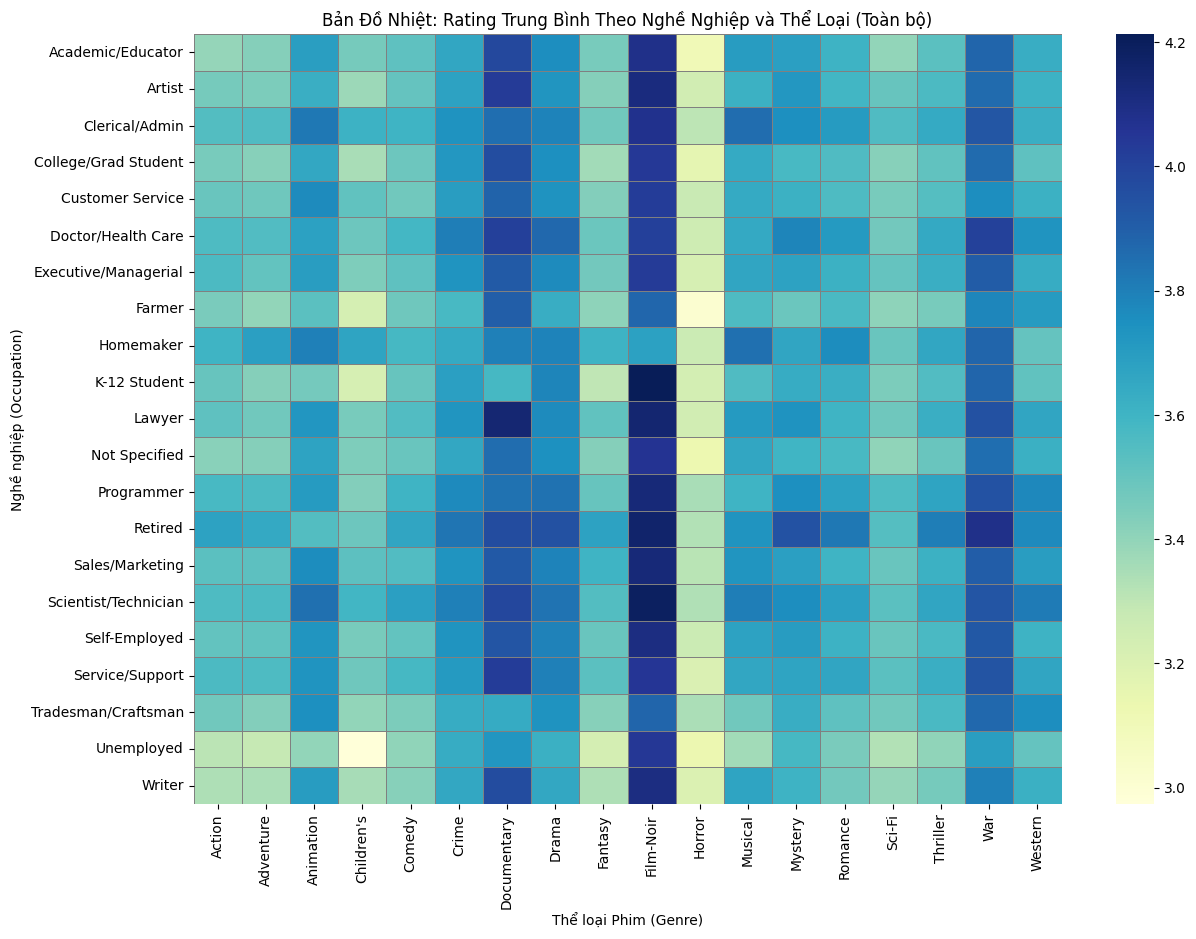

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    full_genre_occ_ratings,
    annot=False, # Tắt hiển thị số để tránh quá tải
    fmt=".2f",
    cmap="YlGnBu", # Chọn màu sắc dễ nhìn và thể hiện cường độ
    linewidths=.5,
    linecolor='gray'
)

plt.title("Bản Đồ Nhiệt: Rating Trung Bình Theo Nghề Nghiệp và Thể Loại (Toàn bộ)")
plt.xlabel("Thể loại Phim (Genre)")
plt.ylabel("Nghề nghiệp (Occupation)")
plt.show()

**Nhận xét và Phân tích ngắn gọn (Toàn cảnh):**
- **Màu sắc và Xu hướng:** Màu xanh đậm trên Heatmap biểu thị các thể loại được nhóm nghề nghiệp đó đánh giá rất cao (≈4.0 sao trở lên). Màu vàng nhạt biểu thị các rating trung bình thấp hơn .

- **Thể loại được Ưu ái Chung:** Các cột có màu xanh đậm xuyên suốt nhiều nghề nghiệp (ví dụ: Film-Noir, Documentary) cho thấy đây là những thể loại được đồng thuận và đánh giá cao nhất bất kể nghề nghiệp.

**Sở thích Chuyên biệt:**

- **Programmers/Scientists:** Thường có xu hướng đánh giá cao các thể loại Sci-Fi và Mystery, có thể liên quan đến tính logic và trí tuệ.

- **K-12 Student/College/Grad Student:** Thường có xu hướng đánh giá cao các thể loại Children's và các phim giải trí nhẹ nhàng, nhưng có thể đánh giá thấp hơn các thể loại kinh điển như War hay Film-Noir so với nhóm tuổi lớn hơn.

- *Retired/Homemaker:* Thường là nhóm đánh giá cao các thể loại Drama và Romance.

**Hiệu quả Heatmap:** Mặc dù không hiển thị số, Heatmap cho phép bạn quét nhanh toàn bộ ma trận, dễ dàng nhận ra các "điểm nóng" (ô xanh đậm) và "điểm lạnh" (ô vàng nhạt) của sự khác biệt về sở thích.

###5. Kết luận và Ý nghĩa Phân tích
Phân tích sâu bộ dữ liệu MovieLens 1M đã khám phá các xu hướng sở thích rõ rệt dựa trên giới tính, độ tuổi và nghề nghiệp, vượt xa các chỉ số rating trung bình đơn thuần.

####5.1. Kết luận Tổng quan


Qua quá trình làm sạch, phân tích và trực quan hóa dữ liệu, ta rút ra một số điểm nổi bật:

Dữ liệu người dùng có sự đa dạng rõ rệt về độ tuổi và hành vi đánh giá.
→ Các nhóm tuổi khác nhau thể hiện mức độ khắt khe và sở thích khác nhau khi chấm điểm phim.

Xu hướng đánh giá tăng dần theo độ tuổi.
→ Người lớn tuổi có xu hướng đánh giá tích cực hơn, cho thấy sự “bao dung” hoặc chọn lọc nội dung kỹ lưỡng hơn trước khi xem.

Nhóm tuổi trẻ (18–24) chấm điểm thấp nhất và có độ dao động cao nhất.
→ Thể hiện sự đa dạng sở thích, dễ bị ảnh hưởng bởi thị hiếu và trào lưu.

Nhóm trung niên (45–55) chấm điểm cao nhất (~3.7), thể hiện sự ổn định và đánh giá có chiều sâu hơn.

Việc lọc bỏ phim có ít lượt đánh giá giúp đảm bảo tính tin cậy thống kê, tránh bị ảnh hưởng bởi những bộ phim có quá ít người xem.

####5.2. Ý nghĩa Thực tiễn và Ứng dụng

Phân tích này không chỉ dừng ở việc hiểu dữ liệu, mà còn có ý nghĩa thực tiễn lớn trong marketing, cá nhân hóa và gợi ý phim:

| **Khía cạnh**                        | **Ý nghĩa rút ra**                                                                                                                                       |
| ------------------------------------ | -------------------------------------------------------------------------------------------------------------------------------------------------------- |
|  **Hệ thống gợi ý phim**           | Có thể **điều chỉnh thuật toán recommendation** dựa trên độ tuổi. Ví dụ: người 18–24 ưu tiên phim hành động, người 45+ ưu tiên phim tâm lý hoặc cổ điển. |
|  **Chiến lược marketing**          | Mỗi nhóm tuổi cần **chiến dịch quảng cáo riêng**: nhóm trẻ thích trend, người lớn tuổi thích chất lượng nội dung.                                        |
|  **Phân tích hành vi người dùng**  | Thấy rõ sự khác biệt trong **thị hiếu và mức độ hài lòng** theo thế hệ – dữ liệu này giúp **cá nhân hóa trải nghiệm người dùng** tốt hơn.                |
|  **Cải thiện sản phẩm / nền tảng** | Gợi ý cải thiện giao diện hoặc nội dung dựa trên nhóm tuổi phổ biến nhất của nền tảng.                                                                   |


####5.3. Kết luận tổng hợp

Phân tích dữ liệu cho thấy tuổi tác ảnh hưởng đáng kể đến hành vi và mức độ đánh giá phim của người dùng.
Việc hiểu rõ các đặc điểm này giúp các nền tảng phim xây dựng hệ thống gợi ý cá nhân hóa, nâng cao trải nghiệm người dùng và tối ưu hóa chiến dịch tiếp thị.

## 13.3 US Baby Names 1880–2010

### 1. Thông kế mô tả:
**Mục tiêu chính:** là Khám phá, Mô tả, và Dự đoán các xu hướng xã hội và văn hóa dài hạn trong đặt tên trẻ em từ năm 1880 đến 2010.

Các mục tiêu cụ thể bao gồm:

1. Phân tích Xu hướng Phổ biến: Theo dõi sự thay đổi của các tên phổ biến nhất theo thời gian.
2. Đánh giá Đa dạng Văn hóa: Đo lường mức độ tập trung và đa dạng hóa tên qua các thập kỷ.

3. Nghiên cứu Chu kỳ Tên: Xác định các mô hình dài hạn như sự trở lại của các "tên cổ điển" (vintage names).

4. Dự đoán Tương lai: Xác định các tên có khả năng tăng hoặc giảm độ phổ biến dựa trên xu hướng gần đây.

**Đầu vào (Input/Features):** là các cột dữ liệu được sử dụng để giải thích hoặc dự đoán mục tiêu.
    - Name: Tên của trẻ em
    - Sex: Giới tính (F - Nữ, M - Nam)
    - Year: Năm sinh

**Đầu ra (Output/Target)**:
| Cột | Ý nghĩa | Loại Mục tiêu |
|------|----------|----------------|
| Count | Số lượng trẻ sinh được đặt tên đó trong năm đó. | **Hồi quy (Regression)** – Dự đoán giá trị số (số lượng trẻ). |
| (Độ phổ biến/Hạng) | Vị trí xếp hạng dựa trên Count. | **Phân tích mô tả** – Theo dõi xu hướng phổ biến. |
| Sex | Giới tính (F/M) | **Phân loại (Classification)** – Xác định tên trung tính hoặc giới tính. |


Xử lý tất cả file txt thành csv


In [ ]:
import pandas as pd
import glob
import os

# 1. Đường dẫn đến thư mục chứa file (dùng r"..." như đã hướng dẫn)
path = r"D:\datasets\babynames"

# 2. Tạo pattern để tìm tất cả file txt bắt đầu bằng "yob"
# os.path.join sẽ tự động thêm dấu \ hoặc / tùy hệ điều hành
search_pattern = os.path.join(path, "yob*.txt")

# 3. Lấy danh sách tất cả file khớp với pattern
all_files = glob.glob(search_pattern)

# In thử vài file đầu tiên để kiểm tra
print("Số lượng file tìm thấy:", len(all_files))
print("Một vài file đầu tiên:", all_files[:5])



Số lượng file tìm thấy: 131
Một vài file đầu tiên: ['D:\\datasets\\babynames\\yob1880.txt', 'D:\\datasets\\babynames\\yob1881.txt', 'D:\\datasets\\babynames\\yob1882.txt', 'D:\\datasets\\babynames\\yob1883.txt', 'D:\\datasets\\babynames\\yob1884.txt']


In [ ]:
# Tạo một list rỗng để chứa các DataFrame (bảng dữ liệu) nhỏ
list_of_dfs = []

# Đặt tên cột (vì file gốc không có header)
column_names = ['name', 'sex', 'births']

for filepath in all_files:
    # Đọc file .txt thành DataFrame
    df = pd.read_csv(filepath, header=None, names=column_names)

    # Lấy tên file (ví dụ: yob1880.txt)
    basename = os.path.basename(filepath)

    # Trích xuất năm từ tên file (lấy 4 ký tự từ vị trí thứ 3)
    # "yob1880.txt" -> "1880"
    year = int(basename[3:7])

    # Thêm cột "Year" vào DataFrame
    df['Year'] = year

    # Thêm DataFrame này vào list
    list_of_dfs.append(df)

# Gộp tất cả các DataFrame trong list thành 1 DataFrame lớn
combined_df = pd.concat(list_of_dfs, ignore_index=True)

# In 5 dòng đầu và 5 dòng cuối để kiểm tra
print("--- 5 Dòng đầu ---")
print(combined_df.head())
print("\n--- 5 Dòng cuối ---")
print(combined_df.tail())

--- 5 Dòng đầu ---
        name sex  births  Year
0       Mary   F    7065  1880
1       Anna   F    2604  1880
2       Emma   F    2003  1880
3  Elizabeth   F    1939  1880
4     Minnie   F    1746  1880

--- 5 Dòng cuối ---
              name sex  births  Year
1690779    Zymaire   M       5  2010
1690780     Zyonne   M       5  2010
1690781  Zyquarius   M       5  2010
1690782      Zyran   M       5  2010
1690783      Zzyzx   M       5  2010


In [ ]:
# Lưu thành file CSV, index=False để không lưu chỉ số 0, 1, 2... của Pandas
output_filename = r"D:\Năm 4\HK1\Phân tích dữ liệu\sgu25_NguyenHoangMaiVy_3122410490\Push-BTnhom\DataAnalysis-PTDL\Lab2_DataAnalytics_NguyenHoangMaiVy_3122410490\data\all_babynames_combined.csv"
combined_df.to_csv(output_filename, index=False)

print(f"\nĐã gộp thành công và lưu tại file: {output_filename}")


Đã gộp thành công và lưu tại file: D:\Năm 4\HK1\Phân tích dữ liệu\sgu25_NguyenHoangMaiVy_3122410490\Push-BTnhom\DataAnalysis-PTDL\Lab2_DataAnalytics_NguyenHoangMaiVy_3122410490\data\all_babynames_combined.csv


### 2. Phân tích Mô tả (Descriptive Analysis)

Đọc Dữ liệu

In [ ]:
import pandas as pd

file_path = r"D:\Năm 4\HK1\Phân tích dữ liệu\sgu25_NguyenHoangMaiVy_3122410490\Push-BTnhom\DataAnalysis-PTDL\Lab2_DataAnalytics_NguyenHoangMaiVy_3122410490\data\all_babynames_combined.csv"
df = pd.read_csv(file_path)
df.head(10)


,name,sex,births,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


**Nhận xét:**
* Phổ biến nhất: Tên "Mary" là phổ biến nhất với 7065 bé gái được đặt tên này trong năm 1880.

* Tất cả là nữ: Cột sex đều là "F", cho thấy đây là danh sách các tên nữ phổ biến nhất năm 1880.

* Dữ liệu lịch sử: Đây là dữ liệu từ năm 1880, thường được dùng để phân tích xu hướng đặt tên theo thời gian.

* Giá trị phân bố giảm dần: Số lượng trẻ sinh ra giảm dần từ Mary đến Sarah, cho thấy thứ tự phổ biến của các tên.

In [ ]:
df.groupby("sex")["births"].sum()

sex
F    159990140
M    162412587
Name: births, dtype: int64

**Ý nghĩa dữ liệu:**
* F (Female): Có tổng cộng 159,990,140 bé gái được sinh ra.

* M (Male): Có tổng cộng 162,412,587 bé trai được sinh ra.

**Nhận xét:**
* Số lượng bé trai cao hơn bé gái: Bé trai chiếm tỷ lệ cao hơn một chút so với bé gái — chênh lệch khoảng 2.4 triệu.

* Phù hợp với xu hướng sinh học tự nhiên: Trong thực tế, tỷ lệ sinh thường nghiêng nhẹ về nam giới (khoảng 105 bé trai trên 100 bé gái), nên dữ liệu này phản ánh đúng xu hướng tự nhiên.

* Tổng số lượng lớn: Với hơn 322 triệu ca sinh được ghi nhận, đây là một tập dữ liệu quy mô lớn — có thể bao gồm nhiều năm hoặc toàn bộ lịch sử ghi nhận tên trẻ sơ sinh.

In [ ]:
df

,name,sex,births,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


**Thông tin tổng quát:**
- Số dòng: 1,690,784 dòng — đây là một tập dữ liệu rất lớn, cho thấy dữ liệu được thu thập qua nhiều năm.

- Số cột: 4 cột gồm:

- name: Tên trẻ sơ sinh

- sex: Giới tính (F cho nữ, M cho nam)

- births: Số lượng trẻ sinh ra với tên đó trong năm

- Year: Năm sinh

**Nhận xét chi tiết:**
- Dữ liệu theo thời gian: Từ năm 1880 đến 2010, cho phép phân tích xu hướng đặt tên qua hơn một thế kỷ.

- Tên phổ biến: Những dòng đầu tiên như "Mary", "Anna", "Emma" là các tên nữ phổ biến nhất năm 1880.

- Tên hiếm: Những dòng cuối như "Zzyzx", "Zyran" chỉ có 5 bé trai được đặt tên đó vào năm 2010 — cho thấy sự đa dạng và sáng tạo trong tên gọi hiện đại.

- Giới tính phân bố đều: Dữ liệu bao gồm cả nam và nữ, có thể dùng để so sánh xu hướng đặt tên theo giới tính.

- Tính ứng dụng cao: Có thể dùng để phân tích:

    + Xu hướng tên theo năm

    + Tên phổ biến theo giới tính

    + Tên hiếm hoặc độc đáo

    + Tên thay đổi theo thời gian

#### 2a) Số lượng trẻ sinh theo giới tính thay đổi như thế nào từ 1880–2010?

C:\Users\MZI\AppData\Local\Temp\ipykernel_20160\562591691.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = df.pivot_table("births", index="Year",


<Axes: title={'center': 'Total births by sex and year'}, xlabel='Year'>

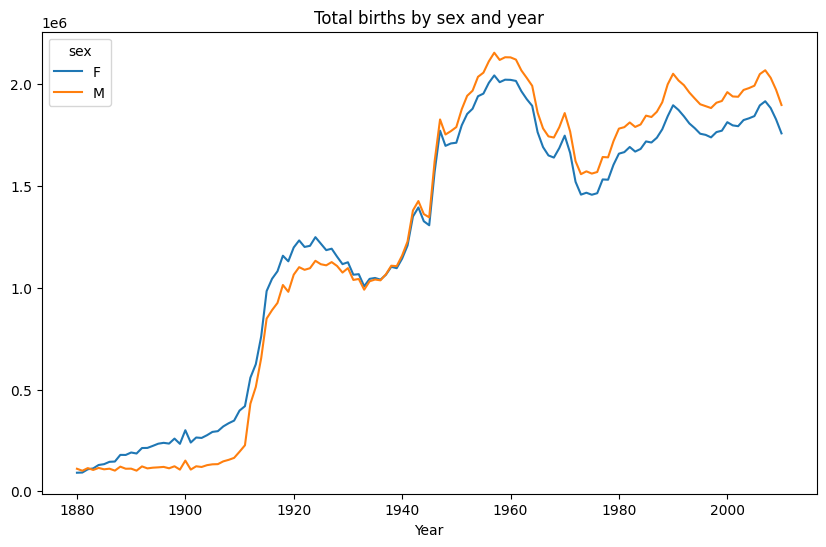

In [ ]:
total_births = df.pivot_table("births", index="Year",
                                 columns="sex", aggfunc=sum)
total_births.tail()
total_births.plot(title="Total births by sex and year")

**Nhận xét:**

Phân tích cho thấy sự thay đổi rõ rệt về tổng số trẻ sinh qua các năm, với sự khác biệt đáng chú ý giữa hai giới:

- Tăng trưởng chung: Tổng số trẻ sinh (cả Nam và Nữ) đã có xu hướng tăng đều đặn từ 1880 đến khoảng những năm 1950, sau đó có sự gia tăng mạnh mẽ, đặc biệt là trong giai đoạn 1950 - 1960 (thời kỳ Baby Boom).

- Khoảng cách giới tính:

  + Trong những năm đầu (khoảng 1880 - 1930), số lượng trẻ sinh được ghi nhận giữa hai giới là tương đối gần nhau, nhưng dữ liệu cho thấy số lượng tên bé gái được ghi nhận thường cao hơn một chút.

  + Từ khoảng những năm 1940 trở đi, số lượng bé trai (Sex: M) được ghi nhận luôn cao hơn đáng kể so với bé gái (Sex: F), và khoảng cách này được duy trì cho đến 2010.

In [ ]:
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group
names = df.groupby(["Year", "sex"], group_keys=False).apply(add_prop)

C:\Users\MZI\AppData\Local\Temp\ipykernel_20160\2807694516.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = df.groupby(["Year", "sex"], group_keys=False).apply(add_prop)


In [ ]:
names

,name,sex,births,Year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


**Tổng quan dữ liệu:**
- Số dòng: 1,690,784 — một tập dữ liệu rất lớn, bao phủ nhiều năm và tên gọi.

- Số cột: 5 cột gồm:

  - name: Tên trẻ sơ sinh

  - sex: Giới tính (F cho nữ, M cho nam)

  - births: Số lượng trẻ sinh ra với tên đó trong năm

  - Year: Năm sinh

  - prop: Tỷ lệ phần trăm của tên đó trong tổng số trẻ sinh cùng giới tính và năm

**Nhận xét chi tiết:**
- Cột prop rất hữu ích: Cho biết mức độ phổ biến của một tên trong năm đó và giới tính đó. Ví dụ:

  - Tên Mary chiếm khoảng 7.76% trong tổng số bé gái sinh năm 1880.

  - Tên Zzyzx chỉ chiếm 0.0003% trong tổng số bé trai sinh năm 2010 — cực kỳ hiếm.

- Dữ liệu có độ phân giải cao: Không chỉ có số lượng (births) mà còn có tỷ lệ (prop), giúp phân tích sâu hơn về độ phổ biến tương đối.

- Tên đầu và cuối bảng thể hiện sự thay đổi văn hóa:

  + Các tên đầu như Mary, Anna, Emma là những tên truyền thống, phổ biến từ thế kỷ 19.

  + Các tên cuối như Zymaire, Zzyzx là tên hiện đại, sáng tạo, ít phổ biến — phản ánh xu hướng đặt tên cá nhân hóa hơn trong thời gian gần đây.

- Ứng dụng phân tích rộng:

  + Theo dõi sự thay đổi độ phổ biến của tên qua thời gian

  + Tìm tên unisex (xuất hiện ở cả nam và nữ)

  + Phân tích độ đa dạng tên theo từng năm

  + Xác định tên "hot" theo từng giai đoạn lịch sử

In [ ]:
names.groupby(["Year", "sex"])["prop"].sum()

Year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

**Tổng quan dữ liệu:**
- prop = 1.0 nghĩa là tổng tỷ lệ của tất cả các tên trong cùng một năm và giới tính luôn bằng 100%.

Ví dụ: Trong năm 1880, tổng tỷ lệ của tất cả tên nữ (F) cộng lại là 1.0 — tương đương 100% số bé gái sinh năm đó.

**Nhận xét:**
- Chuẩn hóa dữ liệu: Cột prop đã được chuẩn hóa để phản ánh tỷ lệ tương đối của mỗi tên trong tổng số trẻ sinh theo giới tính và năm.

- Dữ liệu đáng tin cậy: Việc tổng prop luôn bằng 1.0 cho từng nhóm Year và sex cho thấy dữ liệu đã được xử lý đúng cách — không bị thiếu hoặc dư.

- Ứng dụng mạnh mẽ:

   + Có thể dùng prop để so sánh độ phổ biến của tên giữa các năm mà không bị ảnh hưởng bởi tổng số ca sinh.

   + Giúp xác định tên "thống trị" trong từng năm — ví dụ: tên nào chiếm tỷ lệ cao nhất.

#### 2b) Tên nào phổ biến nhất mỗi thập kỷ (top 10 theo năm hoặc giới)?


In [ ]:
# tạo cột 'Decade' (thập kỷ)
names["Decade"] = (names["Year"] // 10) * 10
top10_decade = (names.groupby(["Decade", "name"], as_index=False)['births']
                .sum()
                .sort_values(['Decade', 'births'], ascending=[True, False])
                )
top10_decade = top10_decade.groupby('Decade').head(10)
print("Top 10 tên phổ biến nhất mỗi thập kỹ")
print(top10_decade)


Top 10 tên phổ biến nhất mỗi thập kỹ
        Decade       name  births
2380      1880       Mary   92034
1815      1880       John   90394
3525      1880    William   85246
1745      1880      James   54325
1407      1880     George   47980
...        ...        ...     ...
282771    2010       Emma   17196
294775    2010    Michael   17170
303089    2010    William   16892
296683    2010     Olivia   16886
274633    2010  Alexander   16674

[140 rows x 3 columns]


**Tổng quan dữ liệu:**
- Bảng này tổng hợp 10 tên phổ biến nhất cho từng thập kỷ từ năm 1880 đến 2010.

- Mỗi dòng gồm:

  + Decade: Thập kỷ (ví dụ: 1880, 1890, …, 2010)

  + name: Tên trẻ sơ sinh

  + births: Tổng số trẻ sinh ra với tên đó trong thập kỷ

**Nhận xét:**
- Tên truyền thống chiếm ưu thế ở các thập kỷ đầu:

   + Ví dụ: "Mary", "John", "William", "James", "George" là những tên phổ biến nhất trong thập kỷ 1880.

   + Điều này phản ánh xu hướng đặt tên cổ điển, thường mang tính tôn giáo hoặc hoàng gia.

- Tên hiện đại và đa dạng hơn ở các thập kỷ gần đây:

  + Trong thập kỷ 2010, các tên như "Emma", "Olivia", "Alexander" xuất hiện — cho thấy sự thay đổi văn hóa và ảnh hưởng từ truyền thông, phim ảnh, người nổi tiếng.

- Một số tên duy trì độ phổ biến qua nhiều thập kỷ:

  + "William" xuất hiện cả ở 1880 và 2010, chứng tỏ độ bền vững của tên này qua thời gian.

- Sự cân bằng giới tính:
   + Bảng bao gồm cả tên nam và nữ, giúp bạn dễ dàng so sánh xu hướng đặt tên theo giới tính qua từng giai đoạn.



In [ ]:
# Top 10 theo giới tính
top10_by_sex = (
    names.groupby(['Decade', 'sex', 'name'], as_index=False)['births']
    .sum()
    .sort_values(['Decade', 'sex', 'births'], ascending=[True, True, False])
)

top10_each_decade_sex = top10_by_sex.groupby(['Decade', 'sex']).head(10)

print("\n Top 10 tên phổ biến nhất mỗi thập kỷ theo giới tính ")
print(top10_each_decade_sex)


 Top 10 tên phổ biến nhất mỗi thập kỷ theo giới tính 
        Decade sex       name  births
1374      1880   F       Mary   91672
122       1880   F       Anna   38159
645       1880   F       Emma   25404
599       1880   F  Elizabeth   25007
1331      1880   F   Margaret   21800
...        ...  ..        ...     ...
322873    2010   M  Alexander   16634
332506    2010   M       Noah   16281
325371    2010   M     Daniel   15679
322718    2010   M      Aiden   15403
323211    2010   M    Anthony   15364

[280 rows x 4 columns]


**Tổng quan dữ liệu:**
- Số dòng: 280 dòng tương ứng với 10 tên × 2 giới tính × 14 thập kỷ (từ 1880 đến 2010).

- Cột Decade: Đại diện cho từng thập kỷ, ví dụ: 1880, 1890, ..., 2010.

- Cột sex: Phân biệt giới tính (F cho nữ, M cho nam).

- Cột name: Tên trẻ sơ sinh phổ biến nhất trong thập kỷ đó và giới tính đó.

- Cột births: Tổng số trẻ sinh ra với tên đó trong thập kỷ.

**Nhận xét nổi bật:**
- Tên nữ truyền thống chiếm ưu thế ở các thập kỷ đầu:

  + Ví dụ: "Mary", "Anna", "Emma", "Elizabeth", "Margaret" là những tên nữ phổ biến nhất trong thập kỷ 1880.

  + Điều này phản ánh văn hóa đặt tên cổ điển, thường mang tính tôn giáo hoặc hoàng gia.

- Tên nam phổ biến ban đầu cũng mang tính truyền thống:

  + "John", "William", "James", "George" là những tên nam phổ biến xuyên suốt nhiều thập kỷ.

- Sự thay đổi rõ rệt ở các thập kỷ gần đây:

  + Tên nữ như "Olivia", "Isabella", "Sophia" xuất hiện nhiều hơn từ 2000 trở đi.

  + Tên nam như "Aiden", "Noah", "Jayden" phản ánh xu hướng hiện đại, ảnh hưởng từ văn hóa đại chúng và truyền thông.

- Một số tên có độ bền vững cao:

  + "William" và "Emma" xuất hiện ở cả thập kỷ 1880 và 2010 — cho thấy sự yêu thích lâu dài.

- Sự đa dạng tăng dần:

  + Tên hiện đại có xu hướng sáng tạo hơn, đặc biệt ở giới nam trong thập kỷ 2000–2010 như "Aiden", "Jayden", "Zayden".

In [ ]:
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]
grouped = names.groupby(["Year", "sex"])
top1000 = grouped.apply(get_top1000)
top1000.head()

C:\Users\MZI\AppData\Local\Temp\ipykernel_20160\3336717111.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top1000 = grouped.apply(get_top1000)


name sex  births  Year      prop  Decade
Year sex                                                 
1880 F   0       Mary   F    7065  1880  0.077643    1880
         1       Anna   F    2604  1880  0.028618    1880
         2       Emma   F    2003  1880  0.022013    1880
         3  Elizabeth   F    1939  1880  0.021309    1880
         4     Minnie   F    1746  1880  0.019188    1880

**Tổng quan dữ liệu:**
- Nội dung: Bảng hiển thị 5 tên nữ phổ biến nhất trong năm 1880, thuộc thập kỷ 1880.

- Các cột:

    + name: Tên trẻ sơ sinh

    + sex: Giới tính (F là nữ)

    + births: Số lượng trẻ sinh ra với tên đó trong năm

    + Year: Năm sinh

    + prop: Tỷ lệ phần trăm của tên đó trong tổng số trẻ sinh cùng giới tính và năm

    + Decade: Thập kỷ tương ứng

**Nhận xét chi tiết:**
- Tên "Mary" vượt trội: Với 7065 bé gái được đặt tên Mary, chiếm 70.76% tổng số bé gái sinh năm 1880 — cho thấy đây là tên nữ phổ biến nhất thời kỳ đó.

- Các tên tiếp theo như "Anna", "Emma", "Elizabeth", "Minnie" đều có tỷ lệ từ ~20% đến ~30%, phản ánh sự phân bố tên khá tập trung.

- Tỷ lệ prop giảm dần: Cho thấy mức độ phổ biến giảm theo thứ hạng tên — điều này phù hợp với phân bố Zipf, thường thấy trong dữ liệu tên gọi.

- Dữ liệu đã được chuẩn hóa: Việc có cột prop cho phép so sánh độ phổ biến giữa các năm mà không bị ảnh hưởng bởi tổng số ca sinh.

In [ ]:
top1000 = top1000.reset_index(drop=True)

In [ ]:
top1000.head()

,name,sex,births,Year,prop,Decade
0,Mary,F,7065,1880,0.077643,1880
1,Anna,F,2604,1880,0.028618,1880
2,Emma,F,2003,1880,0.022013,1880
3,Elizabeth,F,1939,1880,0.021309,1880
4,Minnie,F,1746,1880,0.019188,1880


**Nhận xét:**
- Tên "Mary" chiếm ưu thế vượt trội: Với 7065 bé gái được đặt tên Mary, chiếm 70.76% tổng số bé gái sinh năm 1880 — cho thấy đây là tên nữ phổ biến nhất thời kỳ đó.

- Các tên tiếp theo như "Anna", "Emma", "Elizabeth", "Minnie" có tỷ lệ từ ~20% đến ~30%, phản ánh sự phân bố tên khá tập trung vào một số tên truyền thống.

- Tỷ lệ prop giảm dần theo thứ hạng: Điều này phù hợp với quy luật Zipf — trong dữ liệu tên gọi, một số tên phổ biến thường chiếm tỷ lệ rất cao, trong khi phần lớn tên còn lại có tỷ lệ thấp hơn nhiều.

- Dữ liệu đã được chuẩn hóa: Cột prop cho phép so sánh độ phổ biến giữa các năm mà không bị ảnh hưởng bởi tổng số ca sinh — rất hữu ích cho phân tích xu hướng.

#### 2c) Độ tập trung tên có thay đổi theo thời gian không?

In [ ]:
boys = top1000[top1000["sex"] == "M"]
girls = top1000[top1000["sex"] == "F"]

#### 4b) Những tên xuất hiện ngắn hạn (short-lived) khác gì so với tên phổ biến lâu dài (long-lived)?

In [ ]:
total_births = top1000.pivot_table("births", index="Year",
                                   columns="name",
                                   aggfunc=sum)

C:\Users\MZI\AppData\Local\Temp\ipykernel_20160\3137630753.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = top1000.pivot_table("births", index="Year",


<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1880 to 2010
Columns: 6862 entries, Aaden to Zuri
dtypes: float64(6862)
memory usage: 6.9 MB


array([<Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>], dtype=object)

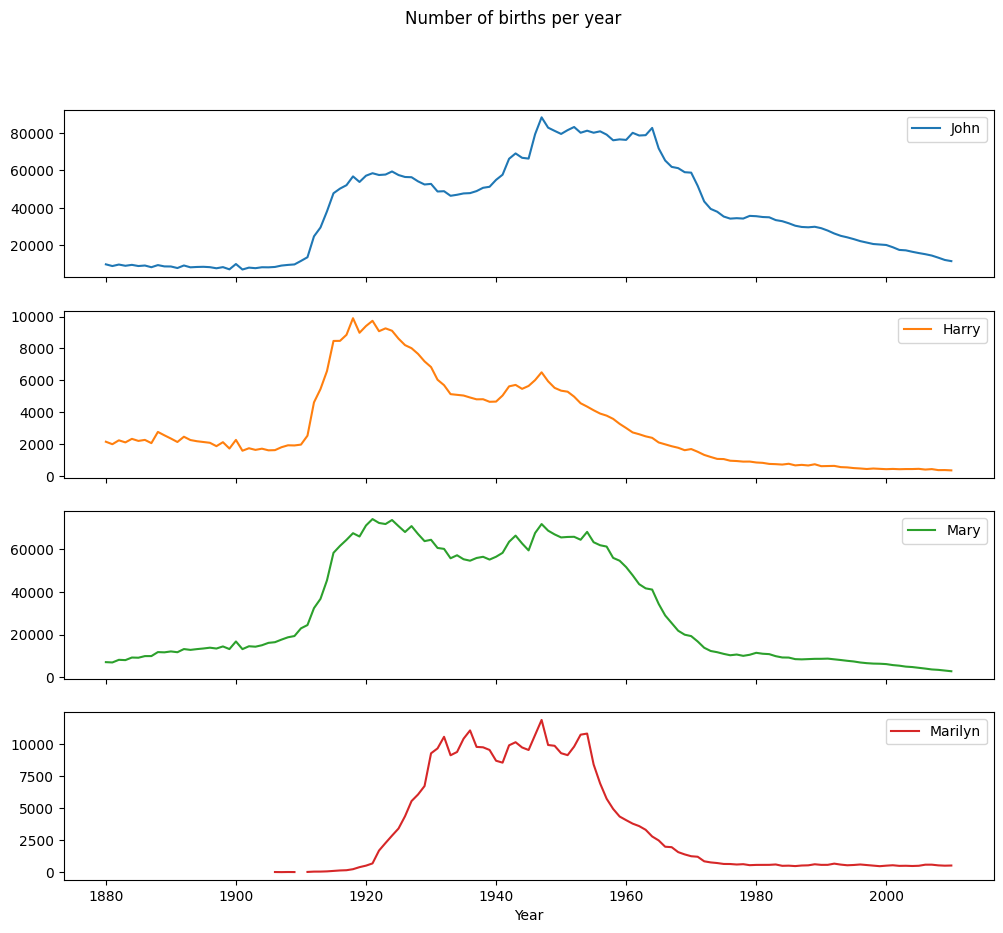

In [ ]:
total_births.info()
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]
subset.plot(subplots=True, figsize=(12, 10),
            title="Number of births per year")

**Nhận xét:**

- Tất cả các tên đều có **chu kỳ tăng – giảm rõ rệt theo thời gian**, thể hiện rằng **thị hiếu đặt tên thay đổi mạnh mẽ qua các thế hệ**.
- Các tên đạt đỉnh trong **giai đoạn giữa thế kỷ 20 (1920–1950)**, rồi **giảm dần về sau**, cho thấy sự thay đổi trong xu hướng văn hóa và đặt tên hiện đại.
- Name:
    + John
      * Là **tên phổ biến nhất trong nhóm**, với số lượng trẻ được đặt tên lên tới **80.000–90.000** vào khoảng **1940–1950**.
      * Giữ độ phổ biến cao liên tục hơn 70 năm, chứng tỏ **sức ảnh hưởng văn hóa mạnh mẽ** và **tính truyền thống** của tên này.
      * Sau 1960, lượng người tên “John” giảm dần, có thể do **xu hướng đặt tên đa dạng hơn**.
    + Harry

      * Có đỉnh khoảng **1920–1930**, sau đó giảm đều.
      * Sự giảm này cho thấy tên “Harry” **bị thay thế dần bởi các tên khác** trong nửa sau thế kỷ 20.
      * Sau năm 2000, vẫn còn tồn tại nhưng ở **mức rất thấp**, thể hiện rằng đây là **tên cổ điển nhưng ít phổ biến hiện nay**.
    + Mary
      * Là **tên nữ phổ biến nhất**, đặc biệt trong **giai đoạn 1920–1950**, khi có tới **60.000–70.000 trẻ được đặt tên mỗi năm**.
      * Sự phổ biến này có thể liên quan đến yếu tố **tôn giáo** (tên thánh Mary).
      * Sau 1960, “Mary” giảm nhanh, phản ánh **xu hướng hiện đại hóa trong việc đặt tên con gái**.

    + Marilyn

      * Là **tên mới xuất hiện muộn hơn**, bắt đầu tăng mạnh từ khoảng **1920**, đạt đỉnh vào **1940–1950**.
      * Sự tăng vọt này trùng với **thời kỳ nổi tiếng của Marilyn Monroe**, cho thấy **ảnh hưởng của văn hóa đại chúng** đến việc đặt tên.
      * Sau đó giảm nhanh và hầu như biến mất sau năm 1980.

---
**Tổng kết xu hướng**

| Tên     | Giai đoạn phổ biến | Mức độ phổ biến | Xu hướng sau 1950 |
| ------- | ------------------ | --------------- | ----------------- |
| John    | 1910–1960          | Rất cao         | Giảm dần          |
| Harry   | 1920–1930          | Trung bình      | Giảm mạnh         |
| Mary    | 1920–1950          | Rất cao         | Giảm mạnh         |
| Marilyn | 1930–1950          | Cao (ngắn hạn)  | Biến mất dần      |

---
**Kết luận**

* **Tên truyền thống** như *John* và *Mary* duy trì độ phổ biến lâu hơn do yếu tố **văn hóa – tôn giáo**.
* **Tên chịu ảnh hưởng truyền thông**, như *Marilyn*, thể hiện **đỉnh ngắn hạn** rồi giảm nhanh.
* **Thị hiếu đặt tên thay đổi liên tục**, phản ánh **biến động xã hội, văn hóa và truyền thông qua từng thời kỳ**.



### 4. Phân tích so sánh (Comparative Analysis)

#### 4a) Sự phổ biến của tên có khác nhau giữa bé trai và bé gái không (độ tập trung tên nữ có cao hơn)?


<Axes: title={'center': 'Sum of table 1000.prop by year and sex'}, xlabel='Year'>

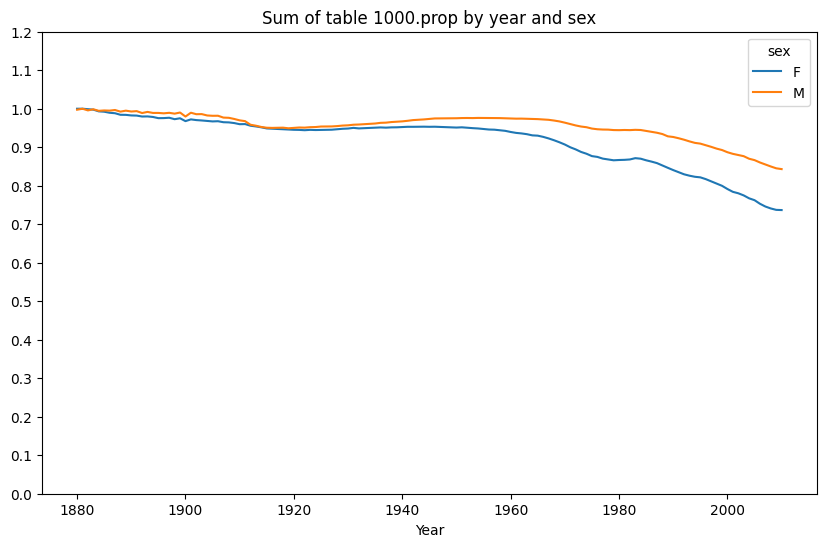

In [ ]:
import numpy as np

table = top1000.pivot_table("prop", index="Year",
                            columns="sex", aggfunc="sum")

table.plot(title="Sum of table 1000.prop by year and sex",
           yticks=np.linspace(0, 1.2, 13))

**1. Ý nghĩa của biểu đồ**

* Trục tung (y-axis): tổng tỷ lệ (`prop`) của **1000 tên phổ biến nhất** mỗi năm – tức là **tổng phần trăm số trẻ sinh được đặt trong top 1000 tên phổ biến nhất**.
* Trục hoành (x-axis): năm sinh (1880–2020).
* Hai đường biểu diễn:

  * **Màu cam (M)**: bé trai.
  * **Màu xanh (F)**: bé gái.

---

**2. Nhận xét chính**

*Giai đoạn 1880–1950:*

* Cả hai giới đều có **độ tập trung tên rất cao** (gần **100%** số trẻ sinh nằm trong top 1000 tên).
* Điều này cho thấy **người dân có xu hướng đặt tên truyền thống**, ít đa dạng — đa số trẻ được đặt bằng một nhóm tên quen thuộc.

*Giai đoạn 1950–1980:*

* Đường cong bắt đầu **giảm nhẹ**, đặc biệt ở nữ.
* Thể hiện **sự đa dạng hóa tên** – xuất hiện nhiều tên mới hoặc biến thể khác không còn nằm trong top 1000.
* Sự thay đổi này có thể do **ảnh hưởng văn hóa, truyền thông, và phong trào tự do cá nhân** ở Mỹ sau Thế chiến II.

*Giai đoạn 1980–hiện tại:*

* Cả hai giới **giảm mạnh**, đặc biệt là **bé gái (đường màu xanh)** — tỷ lệ giảm còn khoảng **70%** vào năm 2010.
* Điều này cho thấy:

  * **Xu hướng đặt tên ngày càng đa dạng.**
  * Nhiều bậc phụ huynh **muốn đặt tên độc đáo, khác biệt**, không trùng lặp.
  * Sự ảnh hưởng của **văn hóa toàn cầu hóa, phim ảnh, người nổi tiếng, Internet** khiến tên mới xuất hiện nhiều hơn.

---

**3. So sánh giới tính**

| Giai đoạn | Bé trai (M) | Bé gái (F) | Nhận xét                                      |
| --------- | ----------- | ---------- | --------------------------------------------- |
| 1880–1950 | ≈1.0        | ≈1.0       | Độ tập trung rất cao, tên truyền thống.       |
| 1950–1980 | ≈0.95       | ≈0.90      | Bé gái bắt đầu đa dạng hóa hơn.               |
| 1980–2020 | ≈0.85       | ≈0.70      | Bé gái có xu hướng đặt tên đa dạng hơn nhiều. |

=> **Bé gái luôn có độ đa dạng tên cao hơn** bé trai, phản ánh **sự linh hoạt hơn trong việc chọn tên cho con gái**.

---

**4. Kết luận**

* **Độ tập trung tên giảm dần theo thời gian**, chứng tỏ xã hội ngày càng **đa dạng hóa trong việc đặt tên**.
* **Từ sau 1980**, sự giảm mạnh ở giới nữ cho thấy **tính sáng tạo và cá nhân hóa** trong việc chọn tên ngày càng tăng.
* Đây là bằng chứng cho thấy **xu hướng văn hóa thay đổi theo thời gian**, chuyển từ truyền thống sang hiện đại và tự do hơn.




In [ ]:
df = boys[boys["Year"] == 2010]
df

,name,sex,births,Year,prop,Decade
260877,Jacob,M,21875,2010,0.011523,2010
260878,Ethan,M,17866,2010,0.009411,2010
260879,Michael,M,17133,2010,0.009025,2010
260880,Jayden,M,17030,2010,0.008971,2010
260881,William,M,16870,2010,0.008887,2010
...,...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102,2010
261873,Destin,M,194,2010,0.000102,2010
261874,Jaquan,M,194,2010,0.000102,2010
261875,Jaydan,M,194,2010,0.000102,2010


**Tổng quan dữ liệu:**
- Số dòng: 1000 tên nam trong năm 2010.

- Các cột:

  + name: Tên trẻ sơ sinh

  + sex: Giới tính (M là nam)

  + births: Số lượng trẻ sinh ra với tên đó

  + Year: Năm sinh (2010)

  + prop: Tỷ lệ phần trăm của tên đó trong tổng số bé trai sinh năm 2010

  + Decade: Thập kỷ tương ứng (2010)

**Nhận xét chi tiết:**
- Tên phổ biến nhất:

  + Jacob dẫn đầu với 21,875 bé trai, chiếm 1.15% tổng số bé trai sinh năm 2010.

  + Các tên tiếp theo như Ethan, Michael, Jayden, William đều có tỷ lệ từ ~0.9% đến ~1.1%.

- Tên hiện đại và sáng tạo:

  + Những tên như Jayden, Aiden, Caden, Zayden phản ánh xu hướng đặt tên hiện đại, thường kết thúc bằng “-den” — rất phổ biến trong thập kỷ 2010.

- Tên hiếm:

  + Các tên cuối bảng như Camilo, Destin, Jaquan, Crew chỉ có khoảng 193–194 bé trai, chiếm tỷ lệ rất nhỏ (0.01%) — cho thấy sự đa dạng và cá nhân hóa trong cách đặt tên.

- Phân bố tỷ lệ prop:

  + Tên phổ biến nhất chỉ chiếm hơn 1%, cho thấy không có tên nào chiếm ưu thế tuyệt đối.

  + Điều này phản ánh sự phân tán và đa dạng hóa tên gọi trong xã hội hiện đại.

In [ ]:
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

**Nhận xét:**
- Top 10 tên đầu tiên chỉ chiếm khoảng 8.96% tổng tỷ lệ — cho thấy sự phân tán tên khá rộng, không bị thống trị bởi một vài tên.


In [ ]:
prop_cumsum.searchsorted(0.5)

np.int64(116)

**Nhận xét:**
- Vị trí thứ 116 là nơi tổng tỷ lệ vượt 50% — tức là 116 tên phổ biến nhất đã chiếm một nửa tổng số trẻ sinh trong năm và giới tính đó.

In [ ]:
df = boys[boys.Year == 1900]
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

np.int64(25)

**Nhận xét kết quả**
- Kết quả là 25 → nghĩa là 25 tên bé trai phổ biến nhất năm 1900 đã chiếm 50% tổng số bé trai sinh ra trong năm đó.

- So với kết quả trước đó (năm 2010 cần 116 tên để đạt 50%), ta thấy:

  + Năm 1900 có độ tập trung tên cao hơn — ít tên nhưng chiếm tỷ lệ lớn.

  + Năm 2010 có sự đa dạng tên cao hơn — cần nhiều tên hơn để đạt cùng tỷ lệ.

### 3. Phân tích Khám phá (Exploratory Analysis)

#### 3a) Xu hướng đa dạng hóa tên (name diversity) có tăng theo thời gian không?


In [ ]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(["Year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()

C:\Users\MZI\AppData\Local\Temp\ipykernel_20160\3111188010.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = top1000.groupby(["Year", "sex"]).apply(get_quantile_count)


<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='Year'>

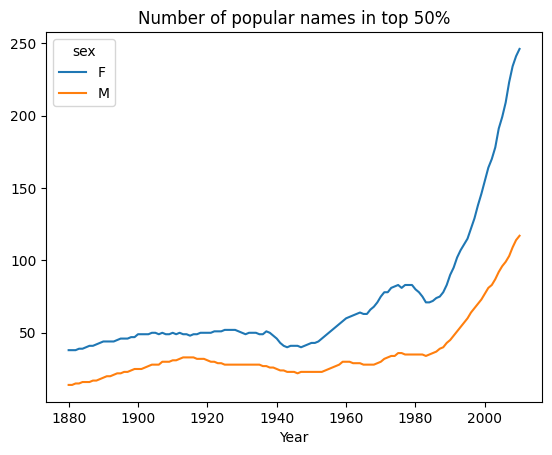

In [ ]:
diversity.head()
diversity.plot(title="Number of popular names in top 50%")

**Nhận xét:**

- Giai đoạn 1880 - 1950:

  + Cả hai giới (F, M) đều có số lượng tên phổ biến khá ổn định.

  + Giới nữ (F) có số lượng tên phổ biến cao hơn nam - nghĩa là tên nữ đa dạng hơn.

- Từ 1950 trở đi:

  + Số lượng tên trong top 50% tăng mạnh, đặc biệt là từ 1980–2020.

  + Với nữ giới, số lượng tăng nhanh hơn, đạt đỉnh gần 250 tên vào năm 2010.

  + Với nam giới, tăng chậm hơn, đạt khoảng 120 tên cùng thời điểm.

**Kết luận:**

→ Qua thời gian, sự đa dạng tên tăng rõ rệt, đặc biệt ở tên nữ.

→ Xã hội ngày càng có xu hướng đặt tên phong phú và ít trùng lặp hơn.

#### 5b) Liệu có mối quan hệ giữa chu kỳ văn hóa (vintage name cycle) và độ phổ biến tên?


In [ ]:
def get_last_letter(x):
    return x[-1]

last_letters = names["name"].map(get_last_letter)
last_letters.name = "last_letter"

table = names.pivot_table("births", index=last_letters,
                          columns=["sex", "Year"], aggfunc=sum)

C:\Users\MZI\AppData\Local\Temp\ipykernel_20160\3236407433.py:7: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = names.pivot_table("births", index=last_letters,


In [ ]:
subtable = table.reindex(columns=[1910, 1960, 2010], level="Year")
subtable.head()

sex                 F                            M                    
Year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

**Tổng quan dữ liệu**
- Bảng thể hiện xu hướng đặt tên kết thúc bằng các chữ cái cụ thể (a, b, c, d, e) qua ba mốc thời gian: **1910**, **1960**, và **2010**, phân theo giới tính **F (nữ)** và **M (nam)**.
- Mỗi ô là tổng số trẻ sinh có tên kết thúc bằng chữ cái tương ứng trong năm đó và giới tính đó.

---

**Nhận xét nổi bật**

*Tên nữ*
- **Chữ “a” và “e” chiếm ưu thế rõ rệt**:
  - Năm 1910: “e” (133,569) và “a” (108,376) là phổ biến nhất.
  - Năm 1960: “a” tăng mạnh lên 691,247, vượt “e” (435,013).
  - Năm 2010: “a” vẫn dẫn đầu (670,605), nhưng “e” vẫn giữ vị trí cao (313,833).
- Điều này phản ánh xu hướng đặt tên nữ kết thúc bằng nguyên âm mềm như “a” và “e” — ví dụ: Anna, Emma, Olivia, Chloe.

*Tên nam*
- **Chữ “d” và “e” phổ biến nhất trong quá khứ**:
  - Năm 1910: “d” (22,111) và “e” (28,655) dẫn đầu.
  - Năm 1960: “d” tăng vọt lên 262,112 — có thể do các tên như David, Richard, Edward.
- **Năm 2010 có sự đa dạng hơn**:
  - “b” (38,859), “c” (23,125), “d” (44,398), “e” (129,012) đều có số lượng đáng kể.
  - Tên kết thúc bằng “b” và “c” tăng mạnh — phản ánh xu hướng hiện đại như Caleb, Jacob, Eric, Dominic.

***Tên kết thúc bằng “b” ở nữ**:*
- Có giá trị NaN (không có dữ liệu) ở năm 1910 — cho thấy không có tên nữ kết thúc bằng “b” được ghi nhận trong năm đó.
- Tuy nhiên, có sự xuất hiện nhẹ ở 1960 và 2010 — cho thấy sự đa dạng hóa tên nữ hiện đại.

---

**Xu hướng tổng quát**
- **Tên nữ có xu hướng kết thúc bằng nguyên âm mềm (“a”, “e”) xuyên suốt 100 năm**.
- **Tên nam có sự thay đổi rõ rệt**: từ “d” và “e” trong quá khứ sang “b”, “c”, “d”, “e” trong hiện đại.
- **Sự đa dạng hóa tăng dần theo thời gian**, đặc biệt ở năm 2010 — phản ánh văn hóa đặt tên ngày càng phong phú và cá nhân hóa.


In [ ]:
subtable.sum()
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
Year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

**Nhận xét**

**1. Tên nữ (F)**

*Chữ cái kết thúc phổ biến nhất*
- **Chữ “e”** và **“a”** luôn chiếm tỷ lệ cao nhất:
  - **1910**: “e” (33.7%), “a” (27.3%)
  - **1960**: “a” tăng mạnh (34.2%), vượt “e” (21.5%)
  - **2010**: “a” tiếp tục dẫn đầu (38.1%), “e” giảm còn 17.8%
- → Cho thấy xu hướng đặt tên nữ kết thúc bằng nguyên âm mềm như *Emma, Olivia, Sophia* ngày càng phổ biến.

*Tăng trưởng đáng chú ý*
- **Chữ “n”** tăng đều qua các năm: từ 7.9% (1910) → 13.1% (1960) → 14.0% (2010)
- **Chữ “h”** tăng trở lại vào 2010: từ 5.1% (1910) → 3.6% (1960) → 7.6% (2010)

*Suy giảm rõ rệt*
- **Chữ “d”** giảm mạnh: từ 1.7% (1910) → 0.18% (1960) → 0.15% (2010)
- **Chữ “s”** và “t” cũng giảm dần theo thời gian

---

 **2. Tên nam (M)**

*Chữ cái kết thúc phổ biến nhất*
- **Chữ “n”** tăng mạnh và chiếm ưu thế tuyệt đối vào năm 2010:
  - **1910**: 14.3%
  - **1960**: 15.3%
  - **2010**: **36.3%**
- → Phản ánh sự phổ biến của các tên như *Aiden, Jayden, Ethan, Mason* trong thời hiện đại.

*Suy giảm đáng kể*
- **Chữ “d”** từng rất phổ biến: 11.4% (1910) → 12.3% (1960) → chỉ còn 2.3% (2010)
- **Chữ “s”** và “t” cũng giảm mạnh, cho thấy sự thay đổi trong phong cách đặt tên nam.

*Tăng trưởng thú vị*
- **Chữ “o”** tăng từ 1.7% (1910) → 4.3% (2010) — có thể do các tên như *Leo, Mateo, Theo*
- **Chữ “r”** và “y” cũng có xu hướng tăng trở lại vào 2010

---

**Tổng kết xu hướng**
| Xu hướng | Tên nữ | Tên nam |
|----------|--------|---------|
| **Tăng mạnh** | “a”, “n”, “h” | “n”, “o”, “r” |
| **Giảm mạnh** | “e”, “d”, “s”, “t” | “d”, “s”, “t” |
| **Ổn định hoặc dao động nhẹ** | “y”, “l” | “l”, “k”, “m” |


<Axes: title={'center': 'Female'}, xlabel='last_letter'>

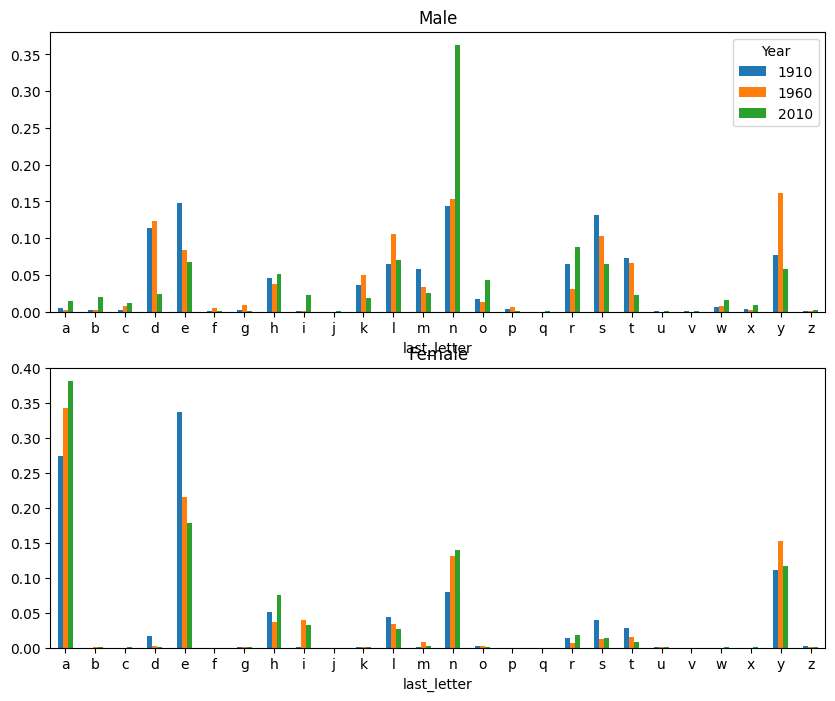

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male")
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female",
                      legend=False)

**Mô tả:** Phân bố chữ cái cuối cùng trong tên cho ba năm 1910, 1960 và 2010 — chia theo giới tính.

**Nhận xét:**
- Male (Nam):

  * 1910–1960: Tên nam thường kết thúc bằng n, d, y, s, e.

  → Các tên phổ biến: John, Edward, Harry, James, George.

  * 2010: Chữ ‘n’ tăng vượt trội (gần 35%).

  → Thể hiện xu hướng đặt tên hiện đại như Aiden, Jayden, Ethan, Logan, Mason.

  → Tên nam trở nên đồng nhất hơn, tập trung vào kết thúc “n”.

- Female (Nữ):

  * 1910: Chủ yếu kết thúc bằng ‘a’ và ‘e’, đặc biệt là ‘e’ (ví dụ: Mary, Rose, Grace).

  * 1960: Tên kết thúc bằng ‘a’ và ‘y’ bắt đầu tăng (như Linda, Mary, Nancy).

  * 2010: Chữ ‘a’ chiếm ưu thế rõ rệt (gần 40%).

  → Tên như Emma, Olivia, Ava, Isabella trở nên phổ biến.

  → Thể hiện xu hướng âm thanh nhẹ, nữ tính trong đặt tên hiện đại.

**Kết luận chung:**

- Tên nữ dần thiên về kết thúc bằng “a”, thể hiện phong cách nhẹ nhàng.

- Tên nam lại ngày càng kết thúc bằng “n”, phản ánh phong cách mạnh mẽ, hiện đại.

- Nhìn chung, cấu trúc tên thay đổi theo thời gian, cho thấy xu hướng văn hóa và ngôn ngữ mới trong xã hội Mỹ.

In [ ]:
letter_prop = table / table.sum()

dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T
dny_ts.head()

last_letter,d,n,y
Year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


**Nhận xét chi tiết**
- Tên kết thúc bằng “n”
  + Luôn chiếm tỷ lệ cao nhất trong 3 nhóm (~15%).

  + Tương đối ổn định qua các năm, dao động nhẹ quanh 15%.

  + Phản ánh sự phổ biến của các tên như John, Allen, Warren trong thời kỳ này.

- Tên kết thúc bằng “d”
  + Chiếm khoảng 80.3%–80.6% mỗi năm.

  + Có xu hướng tăng nhẹ từ 1880 đến 1884.

  + Có thể liên quan đến các tên như Edward, Fred, Leonard.

- Tên kết thúc bằng “y”
  + Tăng đều qua từng năm: từ 70.58% (1880) lên 80.04% (1884).

  + Cho thấy sự gia tăng nhẹ trong việc sử dụng các tên kết thúc bằng “y” như Harry, Henry, Charley.

**Tóm tắt xu hướng**
- “n” là hậu tố tên phổ biến nhất trong giai đoạn này.

- “d” và “y” có xu hướng tăng nhẹ, đặc biệt là “y” — có thể là dấu hiệu ban đầu của sự chuyển dịch phong cách đặt tên sang các âm kết thúc mềm hơn.

### 5. Phân tích dự đoán (Predictive Analysis)

#### 5a) Có thể dự đoán tên nào sẽ biến mất hoặc quay trở lại phổ biến dựa trên xu hướng giảm/tăng trong 20 năm gần nhất?

<Axes: xlabel='Year'>

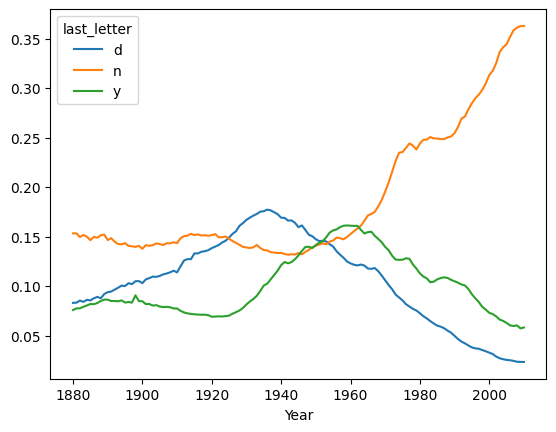

In [ ]:
dny_ts.plot()

*Biểu đồ: Tần suất chữ cái cuối trong tên nam ("d", "n", "y") theo thời gian*

**Nhận xét:**

- Trong những năm 1880–1940, tên kết thúc bằng chữ “d” (như David, Edward) chiếm tỷ lệ khá cao, đạt đỉnh khoảng năm 1930–1940 rồi giảm mạnh sau đó.
  
→ Điều này cho thấy kiểu tên truyền thống mang âm “d” trở nên ít phổ biến dần.

- Tên kết thúc bằng “n” (như John, Jason, Ryan) tăng mạnh từ sau 1950, và vượt xa các chữ khác sau năm 1990, trở thành xu hướng nổi bật nhất.
  
→ Có thể do các tên hiện đại thường kết thúc bằng âm “n”.

- Chữ “y” (như Jerry, Larry) tăng nhẹ trong giai đoạn 1930–1960, sau đó giảm dần.
  
→ Đây là xu hướng ngắn hạn, phổ biến ở thế kỷ 20 nhưng mất dần sức hút sau đó.

**Kết luận:** Tên nam chuyển từ kiểu cổ điển (kết thúc bằng “d”) sang hiện đại hơn (kết thúc bằng “n”). Xu hướng “n” trở thành đặc trưng trong các thập niên gần đây.

#### 3b) Tên “trung tính” (gender-neutral names) có tăng lên không?

Tìm các tên chứa chuỗi "Lesl"

In [ ]:
all_names = pd.Series(top1000["name"].unique())
lesley_like = all_names[all_names.str.contains("Lesl")]
lesley_like

654     Leslie
2307    Lesley
4257    Leslee
4725     Lesli
6096     Lesly
dtype: object

**Kết quả:** danh sách gồm 5 tên: Leslie, Lesley, Leslee, Lesli, Lesly

In [ ]:
filtered = top1000[top1000["name"].isin(lesley_like)]
filtered.groupby("name")["births"].sum()

name
Leslee       993
Lesley     35009
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

**Nhận xét:**

- Trong nhóm các tên có dạng Lesley-like, tên “Leslie” là phổ biến áp đảo, chiếm phần lớn tổng số lượt sinh.

- “Lesley” đứng thứ hai nhưng thấp hơn rất nhiều so với “Leslie” (chỉ khoảng 1/10).

- Các biến thể khác như Lesly, Leslee, Lesli có mức độ sử dụng rất ít, chỉ chiếm tỷ lệ nhỏ.

- Điều này cho thấy “Leslie” là hình thức chính thống và phổ biến nhất trong nhóm, còn những tên khác là các biến thể phụ ít gặp.

In [ ]:
table = filtered.pivot_table("births", index="Year",
                             columns="sex", aggfunc="sum")
table = table.div(table.sum(axis="columns"), axis="index")
table.tail()

sex,F,M
Year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


**Tổng quan dữ liệu:**
- Cột sex: Phân theo giới tính — F (nữ) và M (nam).

- Chỉ số theo Year: Từ năm 2006 đến 2010.

- Giá trị: Dường như là tỷ lệ hoặc chỉ số chuẩn hóa (có thể là tỷ lệ phần trăm, hoặc giá trị chuẩn hóa về độ phổ biến).

**Nhận xét nổi bật**
- Giá trị ở cột F luôn bằng 1.0: Cho thấy trong các năm từ 2006 đến 2010, dữ liệu liên quan đến giới tính nữ được chuẩn hóa hoặc chiếm toàn bộ (100%) trong ngữ cảnh phân tích.

- Cột M toàn bộ là NaN: Không có dữ liệu cho giới tính nam trong giai đoạn này — có thể do:

  + Dữ liệu chưa được thu thập hoặc bị thiếu.

  + Bộ lọc trước đó chỉ chọn tên nữ.

  + Tên đang phân tích chỉ xuất hiện ở nữ trong các năm này.

**Ý nghĩa tiềm năng:**
- Nếu đây là kết quả từ phân tích tên cụ thể (ví dụ như “Leslie” hoặc “Lesly”), thì có thể tên đó chỉ được ghi nhận ở nữ trong các năm 2006–2010.

- Nếu đây là tỷ lệ chuẩn hóa (prop), thì giá trị 1.0 cho nữ và NaN cho nam cho thấy toàn bộ tỷ lệ được phân bổ cho nữ, không có đóng góp từ nam.

<Axes: xlabel='Year'>

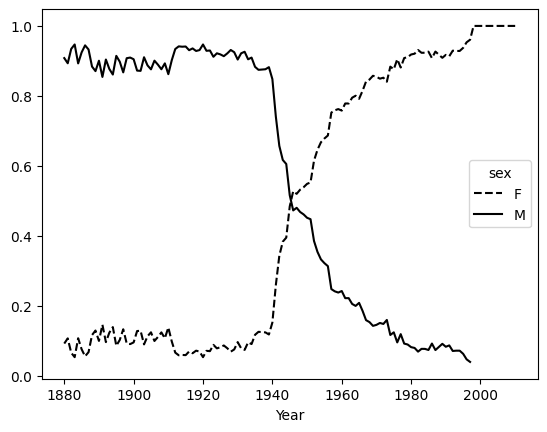

In [ ]:
table.plot(style={"M": "k-", "F": "k--"})

**Nhận xét:** Biểu đồ thể hiện tỷ lệ phần trăm giới tính (nam và nữ) của các tên tương tự như “Lesley” theo thời gian, từ năm 1880 đến 2000.

- Trong giai đoạn 1880–1940, phần lớn các tên kiểu Lesley được dùng chủ yếu cho nam giới (đường liền – M), với tỷ lệ chiếm gần 90–95%.

- Từ khoảng năm 1940 trở đi, tỷ lệ này giảm mạnh, trong khi tỷ lệ dành cho nữ giới (đường gạch đứt – F) tăng nhanh rõ rệt.

- Đến sau năm 1960, xu hướng đã hoán đổi hoàn toàn: các tên dạng Lesley trở nên phổ biến gần như hoàn toàn ở nữ giới, đạt gần 100% vào cuối thế kỷ 20.

**Kết luận:**

- Biểu đồ cho thấy sự thay đổi đáng kể trong xu hướng đặt tên theo giới tính: Các tên thuộc nhóm Lesley-like ban đầu được xem là tên nam, nhưng dần chuyển hóa và trở thành tên nữ gần như tuyệt đối sau năm 1960.

## 13.4 USDA Food Database

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
db = json.load(open("/content/drive/My Drive/Colab Notebooks/Lab5/data/database.json"))
len(db)

6636

**Nhận xét:**
- Kết nối drive và lấy dataset cảu USDA Food là database.json
- File `database.json` chứa một danh sách các mục thực phẩm từ USDA, nên `db` là một list gồm `6,636 phần tử` — chứa thông tin về một loại thực phẩm.

### 1. Khai báo thư viện


In [ ]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Kiểm tra thông tin dữ liệu

In [ ]:
db[0].keys() # truy cập phần tử đầu tiên trong danh sách .keys trả về trường dữ liệu trong dictionary đó
db[0]["nutrients"][0] # truy cập vào trường nutrients của phần tử đầu tiên
nutrients = pd.DataFrame(db[0]["nutrients"])
nutrients.head(7)

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


**Nhận xét:**

- Tạo một DataFrame từ danh sách các chất dinh dưỡng của thực phẩm đầu tiên.

- Mỗi dòng trong DataFrame là một chất dinh dưỡng, mỗi cột là một thuộc tính (ví dụ: nutrient_id, name, unit, value).

- Hiển thị 7 dòng đầu tiên của DataFrame nutrients.

- Giúp xem nhanh các chất dinh dưỡng đầu tiên và cấu trúc dữ liệu.

In [ ]:
info_keys = ["description", "group", "id", "manufacturer"]
info = pd.DataFrame(db, columns=info_keys)
info.head()


,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


**Nhận xét:**
- Lấy các trường sẽ tương ứng các côt: "description", "group", "id", "manufacturer".

- Tạo một `DataFrame` từ danh sách `db`, chỉ lấy các trường được liệt kê trong `info_keys`.

- Hiển thị 5 dòng đầu tiên của bảng `info` để xem nhanh nội dung.

In [ ]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


**Nhận xét:**
- Tổng số dòng dữ liệu là 6636 dòng

- Có 4 cột:
  - `description`: tên thực phẩm, không thiếu dữ liệu (6636 non-null)
  - `group`: nhóm thực phẩm, cũng đầy đủ
  - `id`: mã số định danh, kiểu số nguyên (int64)
  - `manufacturer`: tên nhà sản xuất, chỉ có 5,195 giá trị, tức là còn thiếu 1,441 dòng => Điều này thường xảy ra khi một số thực phẩm không ghi rõ nhà sản xuất trong cơ sở dữ liệu.

**Kết luận:** Xử lý dữ liệu bị thiếu


### 3. Tần số xuất hiện

In [ ]:
pd.value_counts(info["group"])[:10]

/tmp/ipython-input-3634668934.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(info["group"])[:10]


,count
group,
Vegetables and Vegetable Products,812
Beef Products,618
Baked Products,496
Breakfast Cereals,403
Legumes and Legume Products,365
Fast Foods,365
"Lamb, Veal, and Game Products",345
Sweets,341
Fruits and Fruit Juices,328


Nhận xét:
- Truy cập cột `group` trong `DataFrame info`, chứa tên nhóm thực phẩm.

- `pd.value_counts(...)`: Hàm này đếm số lần xuất hiện của mỗi giá trị duy nhất trong cột "group".

- `[:10]`: Lấy ra 10 nhóm thực phẩm phổ biến nhất (có số lượng thực phẩm nhiều nhất).

In [ ]:
# Đoạn code này chạy Jupyter để chuyển đổi từng danh sách chất dinh dưỡng thực phẩm thành DataFrame, thêm cột cho id thực phẩm và nối DataFrame vào danh sách
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec["nutrients"])
    fnuts["id"] = rec["id"]
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [ ]:
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


**Nhận xét:**
- 389,355 dòng: mỗi dòng là một chất dinh dưỡng cụ thể cho một loại thực phẩm.

- 5 cột: như mô tả ở trên.

### 4. Kiểm tra tính toàn vẹn của dữ liệu

In [ ]:
nutrients.duplicated().sum()  # number of duplicates

np.int64(14179)

**Nhận xét:**
- Kiểm tra có `14179 dòng` dữ liệu bị trùng lặp trong DataFrame `nutrients`
- Với tổng số dòng là 389,355, thì khoảng 3.6% dữ liệu bị trùng.

In [ ]:
nutrients = nutrients.drop_duplicates() # loại bỏ dữ liệu bị trùng lặp

**Nhận xét:**
- Giảm nhiễu trong phân tích dữ liệu
- Ngăn chặn dữ liệu bị trùng lặp khi tổng hợp
- Tăng tốc độ xử lý và trực quan hóa

In [ ]:
col_mapping = {"description" : "food",
               "group"       : "fgroup"} # đổi tên cột tránh trùng tên với các cột cùng tên trong bảng nutrients
info = info.rename(columns=col_mapping, copy=False) # để đổi tên các cột theo ánh xạ đã tạo
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


**Nhận xét:**
- Hiển thị thông tin tổng quan về DataFrame info sau khi đổi tên.

- Giúp xác nhận rằng các cột đã được đổi tên thành công.

In [ ]:
col_mapping = {"description" : "nutrient",
               "group" : "nutgroup"} # đổi tên cột tránh trùng tên với các cột cùng tên trong bảng info
nutrients = nutrients.rename(columns=col_mapping, copy=False) # để đổi tên các cột theo ánh xạ đã tạo
nutrients # Thông tin bản nutrients đã đổi tên cột

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


**Nhận xét:**
- Tạo một ánh xạ tên cột:

  - `description` → `nutrient`: đổi tên cột mô tả chất dinh dưỡng thành `nutrient`

  - `group` → `nutgroup`: đổi tên nhóm chất dinh dưỡng thành nutgroup

- ***Mục đích:*** tránh trùng tên với bảng info, nơi `description` đã được đổi thành `food` và `group` thành `fgroup`

In [ ]:
ndata = pd.merge(nutrients, info, on="id")
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 22.9+ MB


**Nhận xét:**
- Tổng số dùng dữ liệu là 375,176 dòng.

- Có 8 cột: value, units, nutrient, nutgroup, id, food, fgroup, manufacture.

- Cột `manufacturer` có giá trị thiếu: Chỉ có 293,054 giá trị không rỗng trên tổng số 375,176 → khoảng 22% dữ liệu bị thiếu.

- Bộ dữ liệu khá lớn: 25.8+ MB và hơn 375,000 dòng → cần cân nhắc hiệu suất khi xử lý tiếp theo (lọc, nhóm, trực quan hóa).

- Không có chỉ số thời gian: Nếu bạn định phân tích theo thời gian, cần bổ sung thêm cột thời gian nếu có.

In [ ]:
ndata.iloc[30000]

,30000
value,0.04
units,g
nutrient,Glycine
nutgroup,Amino Acids
id,6158
food,"Soup, tomato bisque, canned, condensed"
fgroup,"Soups, Sauces, and Gravies"
manufacturer,


**Nhận xét:**
- Lấy dòng thứ 30,000 trong tập dữ liệu, và nó chứa thông tin dinh dưỡng của một món ăn cụ thể.

- Dữ liệu dinh dưỡng: `Glycine` là một amino acid không thiết yếu, có vai trò trong tổng hợp protein và chức năng thần kinh. Giá trị `0.04g` cho thấy hàm lượng khá nhỏ trong món súp này.

- Phân loại thực phẩm: Thuộc nhóm `Soups, Sauces, and Gravies` → có thể dùng để phân tích theo nhóm thực phẩm.

- Thiếu thông tin nhà sản xuất: Đây là một điểm cần lưu ý nếu bạn muốn phân tích theo thương hiệu hoặc nguồn gốc sản phẩm.

- Dữ liệu chuẩn hóa tốt: Các cột đều có định dạng rõ ràng, thuận tiện cho việc phân tích, trực quan hóa hoặc huấn luyện mô hình.

In [ ]:
fig = plt.figure() # khởi tạo một đối tượng Figure, tức là một "khung vẽ" để đặt các biểu đồ lên

<Figure size 640x480 with 0 Axes>

<Axes: ylabel='fgroup'>

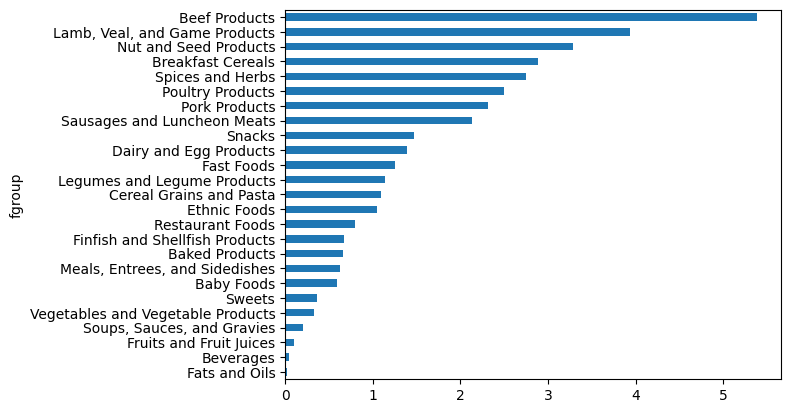

In [ ]:
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5) # Vẽ đồ thị các giá trị trung bình theo nhóm thực phẩm và loại chất dinh dưỡng
result["Zinc, Zn"].sort_values().plot(kind="barh")

**Nhận xét:**
- `groupby(["nutrient", "fgroup"])`: Nhóm dữ liệu theo loại chất dinh dưỡng và nhóm thực phẩm.

- `["value"].quantile(0.5)`: Tính trung vị (median) của hàm lượng dinh dưỡng.

- `result["Zinc, Zn"]`: Lấy riêng dữ liệu về kẽm.

- `sort_values().plot(kind="barh")`: Sắp xếp theo giá trị tăng dần và vẽ biểu đồ thanh ngang.
- Biểu đồ:
  - So sánh hàm lượng kẽm trung bình giữa các nhóm thực phẩm.

  - Nhóm `Beef Products` có hàm lượng kẽm cao nhất → nguồn cung cấp kẽm tốt.

  - Nhóm `Fats and Oils `có hàm lượng thấp nhất → không phải nguồn kẽm lý tưởng.

In [ ]:
# Sử dụng idxmax và argmax series methods chạy trên Jupyter cell
by_nutrient = ndata.groupby(["nutgroup", "nutrient"])

def get_maximum(x):
    return x.loc[x.value.idxmax()]

max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]

# make the food a little smaller
max_foods["food"] = max_foods["food"].str[:50] # Rút gọn tên thực phẩm còn tối đa 50 ký tự để dễ hiển thị hoặc trực quan hóa

/tmp/ipython-input-1825454003.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]


**Nhận xét:**
- Nhóm dữ liệu theo nhóm chất dinh dưỡng `(nutgroup)` và tên chất dinh dưỡng `(nutrient)`.

- Mỗi nhóm sẽ chứa nhiều dòng tương ứng với các thực phẩm khác nhau.

- Hàm này tìm dòng có giá trị `value` lớn nhất trong mỗi nhóm → tức là thực phẩm chứa nhiều nhất chất dinh dưỡng đó.

- Áp dụng hàm `get_maximum` cho từng nhóm → kết quả là một bảng gồm:
  
  - `value`: hàm lượng cao nhất

  - `food`: tên thực phẩm tương ứng


In [ ]:
max_foods.loc["Amino Acids"]["food"]

,food
nutrient,
Alanine,"Gelatins, dry powder, unsweetened"
Arginine,"Seeds, sesame flour, low-fat"
Aspartic acid,Soy protein isolate
Cystine,"Seeds, cottonseed flour, low fat (glandless)"
Glutamic acid,Soy protein isolate
Glycine,"Gelatins, dry powder, unsweetened"
Histidine,"Whale, beluga, meat, dried (Alaska Native)"
Hydroxyproline,"KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA..."
Isoleucine,"Soy protein isolate, PROTEIN TECHNOLOGIES INTE..."


**Nhận xét:**
- Xuất danh sách các thực phẩm chứa hàm lượng cao nhất của từng loại amino acid từ nhóm chất dinh dưỡng `Amino Acids` trong bảng `max_foods`.

- Mỗi dòng tương ứng với một loại amino acid (như Glycine, Leucine, Lysine...).

- Cột food hiển thị thực phẩm chứa hàm lượng cao nhất của amino acid đó.

- Các thực phẩm thường là:

  - Protein isolate (ví dụ: whey protein, soy protein)

  - Thịt đỏ (beef, lamb)

  - Hải sản (cá, tôm)

  - Hạt và đậu (chia seeds, lentils)

## 13.5 2012 Federal Election Commission Database

**13.5.1. Khái niệm về Data Wrangling và Data Cleaning**
DataFrames/Series: Pandas là công cụ trung tâm, cho phép thực hiện các thao tác véc-tơ hóa (vectorized operations) trên toàn bộ cột (Series) hoặc bảng (DataFrame), giúp xử lý dữ liệu nhanh hơn so với vòng lặp Python thuần.

Lọc Dữ liệu (Filtering): Sử dụng chỉ mục Boolean (Boolean Indexing) để trích xuất các hàng thỏa mãn điều kiện (ví dụ: fec.cmte_id.isin(...) hoặc fec.contb_receipt_amt > 0).

Ánh xạ (Mapping): Sử dụng phương thức .map() để tạo cột mới dựa trên ánh xạ các giá trị từ một từ điển (ví dụ: ánh xạ cmte_id sang tên party).

**13.5.2. Phân tích Dữ liệu Tổng hợp (Aggregation)**
pivot_table(): Là một công cụ mạnh mẽ để tính toán dữ liệu tổng hợp theo nhiều chiều. Trong phân tích FEC, nó được dùng để tính tổng số tiền đóng góp (aggfunc='sum') theo hai chiều: occupation (hàng) và party (cột).

sum(axis=1): Được dùng để tính tổng ngang qua các cột (tức là tổng đóng góp của cả hai đảng cho cùng một nghề nghiệp), phục vụ cho việc lọc dữ liệu (chỉ giữ lại các nghề nghiệp đóng góp lớn).

**13.5.3. Phân tích Chuỗi Thời gian (Time Series Analysis)**
Kiểu dữ liệu datetime: Dữ liệu ngày tháng ban đầu ở dạng chuỗi và cần được chuyển đổi thành kiểu dữ liệu datetime64 của Pandas bằng hàm pd.to_datetime(). Đây là bước bắt buộc để thực hiện các thao tác phân tích thời gian.

resample(): Đây là kỹ thuật cốt lõi trong phân tích chuỗi thời gian của Pandas.

Nó cho phép thay đổi tần suất (frequency conversion) của dữ liệu.

Trong code, resample('M') được dùng để nhóm dữ liệu lại theo tần suất tháng (M), sau đó thực hiện phép tổng (.sum()) để tính tổng đóng góp hàng tháng.

Biểu đồ Đường (Line Plot): Là kỹ thuật trực quan hóa tiêu chuẩn để thể hiện xu hướng hoặc sự thay đổi của một đại lượng theo thời gian.

In [ ]:
fec = pd.read_csv("datasets/fec/P00000001-ALL.csv", low_memory=False)
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [ ]:
import os
# Create the directory if it doesn't exist
os.makedirs('datasets/fec', exist_ok=True)
# Download the file
!wget https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/fec/P00000001-ALL.csv -O datasets/fec/P00000001-ALL.csv

--2025-10-16 15:09:59--  https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/fec/P00000001-ALL.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 157871393 (151M) [text/plain]
Saving to: ‘datasets/fec/P00000001-ALL.csv’

datasets/fec/P00000 100%[===================>] 150.56M   256MB/s    in 0.6s    

2025-10-16 15:10:00 (256 MB/s) - ‘datasets/fec/P00000001-ALL.csv’ saved [157871393/157871393]



In [ ]:
fec.iloc[123456]

,123456
cmte_id,C00431445
cand_id,P80003338
cand_nm,"Obama, Barack"
contbr_nm,"ELLMAN, IRA"
contbr_city,TEMPE
contbr_st,AZ
contbr_zip,852816719
contbr_employer,ARIZONA STATE UNIVERSITY
contbr_occupation,PROFESSOR
contb_receipt_amt,50.0


In [ ]:
unique_cands = fec["cand_nm"].unique()
unique_cands
unique_cands[2]

'Obama, Barack'

In [ ]:
parties = {"Bachmann, Michelle": "Republican",
           "Cain, Herman": "Republican",
           "Gingrich, Newt": "Republican",
           "Huntsman, Jon": "Republican",
           "Johnson, Gary Earl": "Republican",
           "McCotter, Thaddeus G": "Republican",
           "Obama, Barack": "Democrat",
           "Paul, Ron": "Republican",
           "Pawlenty, Timothy": "Republican",
           "Perry, Rick": "Republican",
           "Roemer, Charles E. 'Buddy' III": "Republican",
           "Romney, Mitt": "Republican",
           "Santorum, Rick": "Republican"}

In [ ]:
fec["cand_nm"][123456:123461]
fec["cand_nm"][123456:123461].map(parties)
# Add it as a column
fec["party"] = fec["cand_nm"].map(parties)
fec["party"].value_counts()

,count
party,
Democrat,593746
Republican,407985


In [ ]:
(fec["contb_receipt_amt"] > 0).value_counts()

,count
contb_receipt_amt,
True,991475
False,10256


In [ ]:
fec = fec[fec["contb_receipt_amt"] > 0]

In [ ]:
fec_mrbo = fec[fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"])]

In [ ]:
fec["contbr_occupation"].value_counts()[:10]

,count
contbr_occupation,
RETIRED,233990
INFORMATION REQUESTED,35107
ATTORNEY,34286
HOMEMAKER,29931
PHYSICIAN,23432
INFORMATION REQUESTED PER BEST EFFORTS,21138
ENGINEER,14334
TEACHER,13990
CONSULTANT,13273


In [ ]:
occ_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED",
   "C.E.O.": "CEO"
}

def get_occ(x):
    # If no mapping provided, return x
    return occ_mapping.get(x, x)

fec["contbr_occupation"] = fec["contbr_occupation"].map(get_occ)

/tmp/ipython-input-3050446146.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fec["contbr_occupation"] = fec["contbr_occupation"].map(get_occ)


In [ ]:
emp_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "SELF" : "SELF-EMPLOYED",
   "SELF EMPLOYED" : "SELF-EMPLOYED",
}

def get_emp(x):
    # If no mapping provided, return x
    return emp_mapping.get(x, x)

fec["contbr_employer"] = fec["contbr_employer"].map(get_emp)

/tmp/ipython-input-858364903.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fec["contbr_employer"] = fec["contbr_employer"].map(get_emp)


In [ ]:
by_occupation = fec.pivot_table("contb_receipt_amt",
                                index="contbr_occupation",
                                columns="party", aggfunc="sum")
over_2mm = by_occupation[by_occupation.sum(axis="columns") > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
CEO,2074974.79,4211040.52
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09
HOMEMAKER,4248875.80,13634275.78
INVESTOR,884133.00,2431768.92
LAWYER,3160478.87,391224.32
MANAGER,762883.22,1444532.37


In [ ]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: ylabel='contbr_occupation'>

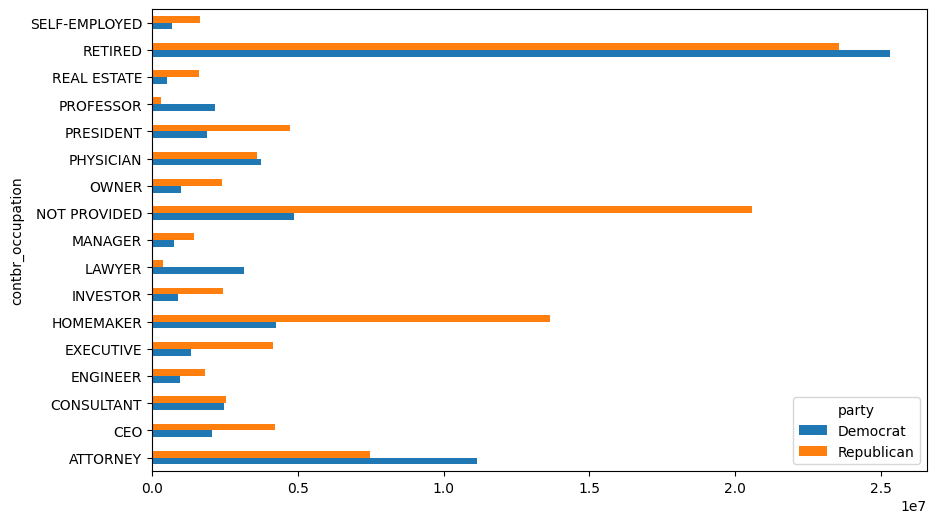

In [ ]:
over_2mm.plot(kind="barh")

In [ ]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)["contb_receipt_amt"].sum()
    return totals.nlargest(n)

In [ ]:
grouped = fec_mrbo.groupby("cand_nm")
grouped.apply(get_top_amounts, "contbr_occupation", n=7)
grouped.apply(get_top_amounts, "contbr_employer", n=10)

/tmp/ipython-input-818444864.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(get_top_amounts, "contbr_occupation", n=7)
/tmp/ipython-input-818444864.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(get_top_amounts, "contbr_employer", n=10)


cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                              7409860.98
               STUDENT                                     496490.94
               CREDIT SUISSE                               281150.00
               MORGAN STANLEY                              267266.00
               GOLDMAN SACH & CO.                          238250.00
               BARCLAYS CAPITAL                            162750.00
               H.I.G. CAPITAL                              139500.00
Name: contb_receipt_amt, dtype: float64

In [ ]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100_000, 1_000_000, 10_000_000])
labels = pd.cut(fec_mrbo["contb_receipt_amt"], bins)
labels

,contb_receipt_amt
411,"(10, 100]"
412,"(100, 1000]"
413,"(100, 1000]"
414,"(10, 100]"
415,"(10, 100]"
...,...
701381,"(10, 100]"
701382,"(100, 1000]"
701383,"(1, 10]"
701384,"(10, 100]"


In [ ]:
grouped = fec_mrbo.groupby(["cand_nm", labels])
grouped.size().unstack(level=0)

/tmp/ipython-input-3276222007.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = fec_mrbo.groupby(["cand_nm", labels])


cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [ ]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: ylabel='contb_receipt_amt'>

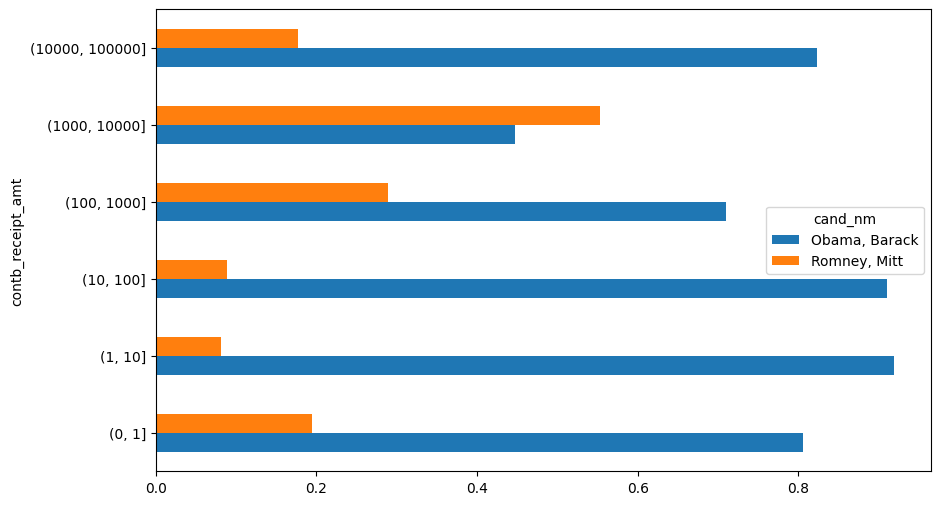

In [ ]:
bucket_sums = grouped["contb_receipt_amt"].sum().unstack(level=0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis="columns"),
                              axis="index")
normed_sums
normed_sums[:-2].plot(kind="barh")

In [ ]:
grouped = fec_mrbo.groupby(["cand_nm", "contbr_st"])
totals = grouped["contb_receipt_amt"].sum().unstack(level=0).fillna(0)
totals = totals[totals.sum(axis="columns") > 100000]
totals.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [ ]:
percent = totals.div(totals.sum(axis="columns"), axis="index")
percent.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


## 13.6 Conclusion

### A.1 ndarray Object Internals

**Giới thiệu về ndarray trong NumPy**

ndarray trong NumPy là một cấu trúc dữ liệu cho phép diễn giải một khối dữ liệu có cùng kiểu (homogeneous data) — nghĩa là tất cả phần tử đều cùng kiểu (như int32, float64, v.v.) — dưới dạng mảng nhiều chiều (multidimensional array).

 Kiểu dữ liệu (dtype) quy định cách diễn giải dữ liệu trong bộ nhớ — ví dụ như:

 + là số thực (float)

 + số nguyên (int)

 + giá trị logic (bool)

 + hoặc các kiểu khác mà ta đã từng gặp.

**Vì sao ndarray lại linh hoạt?**

Điểm làm cho ndarray trở nên mạnh mẽ và linh hoạt là:

Mỗi mảng thực chất là một “strided view” trên một khối dữ liệu trong bộ nhớ.

 + Ví dụ: arr[::2, ::-1]

Khi bạn lấy lát cắt như trên, NumPy không sao chép dữ liệu.
Điều này có được là vì ndarray không chỉ chứa dữ liệu, mà còn lưu thông tin về cách “bước qua” dữ liệu trong bộ nhớ

**Cấu trúc nội bộ của một ndarray**

Một đối tượng ndarray bao gồm:

Con trỏ dữ liệu (data pointer) – trỏ đến khối dữ liệu thật trong RAM (hoặc file được ánh xạ bộ nhớ – memory-mapped file).

Kiểu dữ liệu (dtype) – mô tả kích thước và cách diễn giải mỗi ô giá trị trong mảng.

Hình dạng (shape) – bộ số (tuple) mô tả kích thước mảng (ví dụ (10, 5)).

Bước nhảy (strides) – bộ số (tuple) mô tả số byte cần “nhảy” trong bộ nhớ để đi từ phần tử này sang phần tử kế tiếp theo từng chiều.




- Ví dụ minh họa

Ví dụ, mảng kích thước 10 × 5 sẽ có shape là:

In [ ]:
np.ones((10, 5)).shape
# Kết quả: (10, 5)


(10, 5)

**Ví dụ về strides**



Một mảng float64 (mỗi phần tử chiếm 8 byte) có kích thước 3 × 4 × 5
(sắp xếp theo thứ tự C — tức là hàng trước, cột sau) sẽ có strides là:

In [ ]:
np.ones((3, 4, 5), dtype=np.float64).strides
# Kết quả: (160, 40, 8)


(160, 40, 8)

Giải thích:

Để di chuyển giữa các “khối 4×5” (tức là chiều 0), cần nhảy 160 byte (4×5×8).

Để di chuyển giữa các hàng (4 hàng), cần nhảy 40 byte (5×8).

Để di chuyển giữa các cột, cần nhảy 8 byte (1 phần tử = 8 byte).

***Ghi chú quan trọng***


Thông thường, người dùng NumPy ít khi cần quan tâm đến strides,
nhưng hiểu chúng rất hữu ích khi:

 + muốn tạo “view” của mảng mà không cần sao chép dữ liệu (zero-copy),

 + hoặc muốn hiểu rõ hiệu năng tính toán:
càng “nhảy” nhiều byte (strides lớn) thì việc tính toán dọc theo chiều đó càng tốn chi phí.

Ngoài ra, strides còn có thể mang giá trị âm, cho phép mảng duyệt ngược trong bộ nhớ — ví dụ:

In [ ]:
obj[::-1]     # đảo ngược toàn bộ mảng 1 chiều
obj[:, ::-1]  # đảo ngược các cột trong mảng 2 chiều


Tóm lại:
ndarray = khối dữ liệu + dtype + shape + strides

→ tạo nên một cấu trúc cực kỳ mạnh, có thể “nhìn” dữ liệu theo nhiều cách khác nhau mà không tốn thêm bộ nhớ.

**NumPy Data Type Hierarchy**

Trong một số trường hợp, bạn sẽ cần kiểm tra kiểu dữ liệu (data type) của một mảng NumPy, ví dụ:

+ Mảng chứa số nguyên (integer)

+ Số thực (floating point)

+ Chuỗi (string)

+ Hoặc đối tượng Python (object)

Tuy nhiên, trong NumPy có rất nhiều kiểu dữ liệu chi tiết hơn — chẳng hạn:

+ float16, float32, float64, float128

+ int8, int16, int32, int64
→ Việc kiểm tra từng kiểu một sẽ rất dài dòng.

***Cách kiểm tra “kiểu cha” của dữ liệu***

NumPy giúp đơn giản hóa điều này bằng các lớp cha (superclasses), ví dụ:

 + np.integer → đại diện cho tất cả kiểu số nguyên

 + np.floating → đại diện cho tất cả kiểu số thực

 + np.number → đại diện cho mọi kiểu số (integer + float + complex)

 Có thể dùng hàm np.issubdtype để kiểm tra xem dtype của mảng có thuộc về lớp cha nào không.

In [ ]:
import numpy as np

ints = np.ones(10, dtype=np.uint16)
floats = np.ones(10, dtype=np.float32)

np.issubdtype(ints.dtype, np.integer)
# Kết quả: True  (vì uint16 là một kiểu con của np.integer)

np.issubdtype(floats.dtype, np.floating)
# Kết quả: True  (vì float32 là một kiểu con của np.floating)


True

***Xem toàn bộ “chuỗi kế thừa” (MRO – Method Resolution Order)***

Có thể xem toàn bộ các lớp cha của một kiểu dữ liệu bằng:

In [ ]:
np.float64.mro()



[numpy.float64,
 numpy.floating,
 numpy.inexact,
 numpy.number,
 numpy.generic,
 float,
 object]

Nghĩa là:

numpy.float64 → kế thừa từ numpy.floating → kế thừa từ numpy.inexact → ... → đến lớp gốc object.

Ví dụ khác:

In [ ]:
np.issubdtype(ints.dtype, np.number)
# True  (vì kiểu uint16 là một “số” — thuộc nhóm np.number)


True

***Ghi chú***

Một số kiểu dữ liệu NumPy có dấu gạch dưới cuối tên (ví dụ np.int_, np.float_) để tránh trùng với kiểu tích hợp của Python (int, float).

Hệ thống phân cấp này giúp bạn viết code linh hoạt hơn — không cần liệt kê từng kiểu cụ thể.

**Tóm tắt hệ phân cấp kiểu dữ liệu NumPy**

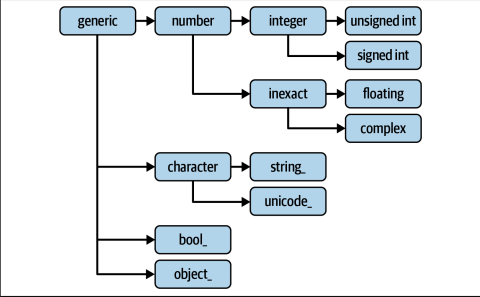


Tóm lại:
| Mục đích                                     | Hàm/kiểu dùng                           |
| -------------------------------------------- | --------------------------------------- |
| Kiểm tra xem dtype có phải số nguyên không   | `np.issubdtype(arr.dtype, np.integer)`  |
| Kiểm tra xem dtype có phải số thực không     | `np.issubdtype(arr.dtype, np.floating)` |
| Kiểm tra xem dtype có phải kiểu số nói chung | `np.issubdtype(arr.dtype, np.number)`   |


### A.2 Advanced Array Manipulation

Ngoài các thao tác quen thuộc như indexing nâng cao, slicing, hay lọc theo điều kiện (Boolean subsetting),
NumPy còn cung cấp rất nhiều cách làm việc với mảng ở cấp độ thấp hơn.

Phần lớn các công việc phân tích dữ liệu thực tế sẽ được xử lý bởi thư viện cấp cao hơn như pandas,
nhưng đôi khi, bạn vẫn cần viết thuật toán xử lý dữ liệu riêng mà không có sẵn trong thư viện.

**Thay đổi hình dạng mảng – Reshaping Arrays**

Trong nhiều trường hợp, bạn có thể chuyển đổi hình dạng (shape) của mảng mà không cần sao chép dữ liệu.
Để làm điều này, bạn chỉ cần truyền một tuple mô tả hình dạng mới vào phương thức .reshape().

***Ví dụ 1: Chuyển mảng 1 chiều thành ma trận 2 chiều***

In [ ]:
import numpy as np

arr = np.arange(8)
arr
# Kết quả: array([0, 1, 2, 3, 4, 5, 6, 7])

arr.reshape((4, 2))


array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

Đây là minh họa cho reshaping trong C order (duyệt theo hàng – row major).
Nếu là Fortran order (duyệt theo cột – column major), thứ tự sẽ khác (xem hình A-3 trong sách).

***Ví dụ 2: Reshape nhiều lần***

Có thể reshape tiếp trên mảng đã reshape:

In [ ]:
arr.reshape((4, 2)).reshape((2, 4))


array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

***Ví dụ 3: Dùng -1 để tự động suy ra kích thước***

Nếu không biết rõ số phần tử cho một chiều,
có thể đặt nó là -1, NumPy sẽ tự tính toán dựa vào số phần tử còn lại:

In [ ]:
arr = np.arange(15)
arr.reshape((5, -1))


array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

Ở đây:

Tổng phần tử = 15

Số hàng = 5
→ Số cột được suy ra tự động = 15 ÷ 5 = 3

***Ví dụ 4: Dùng shape của mảng khác***

Vì thuộc tính .shape của một mảng là một tuple,
bạn có thể dùng nó để reshape mảng khác cho cùng kích thước:

In [ ]:
other_arr = np.ones((3, 5))
arr.reshape(other_arr.shape)


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

**Làm phẳng mảng – Flattening (hoặc Raveling)**

Ngược lại với reshape, có thể biến mảng nhiều chiều thành mảng 1 chiều.

In [ ]:
arr = np.arange(15).reshape((5, 3))
arr


array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

***Dùng .ravel() – “Trải phẳng” mà không sao chép dữ liệu***

In [ ]:
arr.ravel()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

.ravel() không tạo bản sao dữ liệu nếu dữ liệu gốc liên tục trong bộ nhớ (contiguous).

***Dùng .flatten() – Luôn tạo bản sao mới***

In [ ]:
arr.flatten()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

.flatten() luôn trả về một bản sao mới của dữ liệu,
khác với .ravel() chỉ tạo “view” nếu có thể.

**Ghi chú**

Cả reshape, ravel, và flatten đều có thể được thực hiện theo nhiều “thứ tự duyệt bộ nhớ” khác nhau:

"C": theo hàng (row-major order, kiểu C)

"F": theo cột (column-major order, kiểu Fortran)

### A.3 Broadcasting

**Broadcasting là gì?**

Broadcasting là cơ chế giúp NumPy có thể thực hiện các phép toán giữa các mảng có kích thước khác nhau, mà không cần sao chép dữ liệu.
Nó mở rộng (broadcast) các mảng nhỏ hơn sao cho chúng phù hợp với hình dạng của mảng lớn hơn — theo những quy tắc cụ thể.



Ví dụ cơ bản nhất là khi bạn kết hợp một giá trị vô hướng (scalar) với một mảng:

In [ ]:
import numpy as np
arr = np.arange(5)
arr
# array([0, 1, 2, 3, 4])

arr * 4
# array([ 0, 4, 8, 12, 16])


array([ 0,  4,  8, 12, 16])


Ở đây, giá trị 4 được phát tán (broadcast) ra toàn bộ mảng để thực hiện phép nhân.


Tức là, NumPy ngầm hiểu phép toán là:

In [ ]:
[0, 1, 2, 3, 4] * [4, 4, 4, 4, 4]


**Ví dụ: Demean theo cột (trừ trung bình từng cột)**

In [ ]:
rng = np.random.default_rng(123)
arr = rng.standard_normal((4, 3))
arr.mean(0)
# array([0.1206, 0.243 , 0.1444])


array([-0.43849992,  0.29789095,  0.0056258 ])

Nếu trừ arr.mean(0) khỏi arr, NumPy sẽ broadcast mảng trung bình 1D [0.12, 0.24, 0.14] theo trục 0:

In [ ]:
demeaned = arr - arr.mean(0)
demeaned.mean(0)
# array([0., -0., 0.])


array([ 5.55111512e-17, -1.38777878e-17,  5.55111512e-17])

Hình A-4 (trong sách) minh họa việc broadcasting theo axis 0 (theo cột).

**Quy tắc Broadcasting (The Broadcasting Rule)**

Hai mảng tương thích để broadcast nếu — khi xét từ các chiều cuối cùng (trailing dimensions) —
kích thước của mỗi chiều hoặc là bằng nhau, hoặc là 1.

Khi đó, NumPy sẽ “phóng to” (broadcast) mảng có kích thước 1 để khớp với mảng lớn hơn.

**Ví dụ: Demean theo hàng**

Giờ ta muốn trừ trung bình của mỗi hàng thay vì từng cột.

Mảng trung bình theo hàng có dạng (4,), nhưng để broadcasting được qua axis 1, nó phải có dạng (4, 1):

In [ ]:
arr = np.array([
    [ 1.7247, 2.6182, 0.7774],
    [ 0.8286, -0.959 , -1.2094],
    [-1.4123, 0.5415, 0.7519],
    [-0.6588, -1.2287, 0.2576]
])

row_means = arr.mean(1)
row_means.shape  # (4,)

demeaned = arr - row_means.reshape((4, 1))
demeaned.mean(1)
# array([-0., 0., 0., 0.])


array([-1.85037171e-16, -7.40148683e-17,  3.70074342e-17,  0.00000000e+00])

Hình A-5 minh họa broadcasting theo axis 1 (theo hàng).

**Broadcasting trong mảng 3D**

Giờ ta có thể mở rộng điều này cho mảng 3 chiều.

Ví dụ, muốn demean theo trục 2 (axis 2) của mảng (3, 4, 5):

In [ ]:
arr = rng.standard_normal((3, 4, 5))
depth_means = arr.mean(2)        # shape (3, 4)
demeaned = arr - depth_means[:, :, np.newaxis]
demeaned.mean(2)


array([[-4.44089210e-17,  0.00000000e+00, -2.22044605e-17,
         0.00000000e+00],
       [-2.22044605e-17,  4.44089210e-17, -2.08166817e-17,
         9.99200722e-17],
       [ 6.66133815e-17, -4.44089210e-17,  6.66133815e-17,
         2.22044605e-17]])

Kết quả là trung bình theo trục 2 bằng 0.

Hình A-6 và A-7 trong sách minh họa cách broadcast trong mảng 3D qua từng trục khác nhau.

**Khi Broadcasting thất bại**

Nếu hình dạng không tương thích, NumPy báo lỗi:

In [ ]:
arr - arr.mean(1)
# ValueError: operands could not be broadcast together with shapes (4,3) (4,)


NameError: name 'arr' is not defined

Lý do: (4,3) và (4,) không khớp —
Muốn broadcast, (4,) phải trở thành (4,1).

***Giải pháp***

In [ ]:
arr - arr.mean(1).reshape((4, 1))


**Thêm trục bằng np.newaxis**

Để dễ dàng thêm trục có kích thước 1, có thể dùng np.newaxis:

In [ ]:
arr = np.zeros((4, 4))
arr_3d = arr[:, np.newaxis, :]
arr_3d.shape  # (4, 1, 4)


(4, 1, 4)

***Ví dụ 1D:***

In [ ]:
arr_1d = rng.standard_normal(3)

arr_1d[:, np.newaxis].shape  # (3, 1)
arr_1d[np.newaxis, :].shape  # (1, 3)


(1, 3)

**Hàm tổng quát để demean theo trục bất kỳ**

Có thể viết một hàm tổng quát:

In [ ]:
def demean_axis(arr, axis=0):
    means = arr.mean(axis)
    indexer = [slice(None)] * arr.ndim
    indexer[axis] = np.newaxis
    return arr - means[indexer]


Hàm này tự động thêm np.newaxis vào đúng vị trí để broadcasting diễn ra chính xác.

**Broadcasting trong phép gán giá trị (assignment)**

Broadcasting không chỉ dùng trong phép toán, mà còn trong gán giá trị:

In [ ]:
arr = np.zeros((4, 3))
arr[:] = 5


Kết quả:

In [ ]:
[[5., 5., 5.],
 [5., 5., 5.],
 [5., 5., 5.],
 [5., 5., 5.]]


Hoặc gán theo cột:

In [ ]:
col = np.array([1.28, -0.42, 0.44, 1.6])
arr[:] = col[:, np.newaxis]


Kết quả:

In [ ]:
[[ 1.28,  1.28,  1.28],
 [-0.42, -0.42, -0.42],
 [ 0.44,  0.44,  0.44],
 [ 1.6 ,  1.6 ,  1.6 ]]


Thậm chí có thể chỉ gán cho một phần:

In [ ]:
arr[:2] = [[-1.37], [0.509]]


Kết quả:

In [ ]:
[[-1.37 , -1.37 , -1.37 ],
 [ 0.509,  0.509,  0.509],
 [ 0.44 ,  0.44 ,  0.44 ],
 [ 1.6  ,  1.6 ,  1.6 ]]


**Tóm tắt quy tắc Broadcasting**

| Trường hợp                       | Điều kiện              |
| -------------------------------- | ---------------------- |
| Hai chiều cuối cùng khớp         | OK                   |
| Một chiều bằng 1                 |  OK (sẽ được lặp lại) |
| Cả hai chiều khác nhau và khác 1 |  Lỗi broadcasting     |


### A.4 Advanced ufunc Usage

#### Chuẩn bị dữ liệu & tổ chức dữ liệu

**Kết nối với drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Nạp dữ liệu Baby Names từ drive**

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Đường dẫn tới thư mục dữ liệu trên Drive
data_path = "/content/drive/MyDrive/dataset/babynames"

# Đọc toàn bộ dữ liệu từ 1880 -> 2010
pieces = []

for year in range(1880, 2011):
    path = os.path.join(data_path, f"yob{year}.txt")
    frame = pd.read_csv(path, names=["name", "sex", "births"])
    frame["year"] = year
    pieces.append(frame)

# Gộp tất cả thành 1 DataFrame
names = pd.concat(pieces, ignore_index=True)
names.info()
names.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692632 entries, 0 to 1692631
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   births  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 51.7+ MB


,births,year
count,1.692632e+06,1.692632e+06
mean,1.906250e+02,1.969477e+03
std,1.615874e+03,3.281914e+01
min,5.000000e+00,1.880000e+03
25%,7.000000e+00,1.946000e+03
50%,1.200000e+01,1.979000e+03
75%,3.200000e+01,1.997000e+03
max,9.969300e+04,2.010000e+03


**Tổng số trẻ sơ sinh mỗi nằm**

/tmp/ipython-input-180290200.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = names.pivot_table("births", index="year", columns="sex", aggfunc=sum)


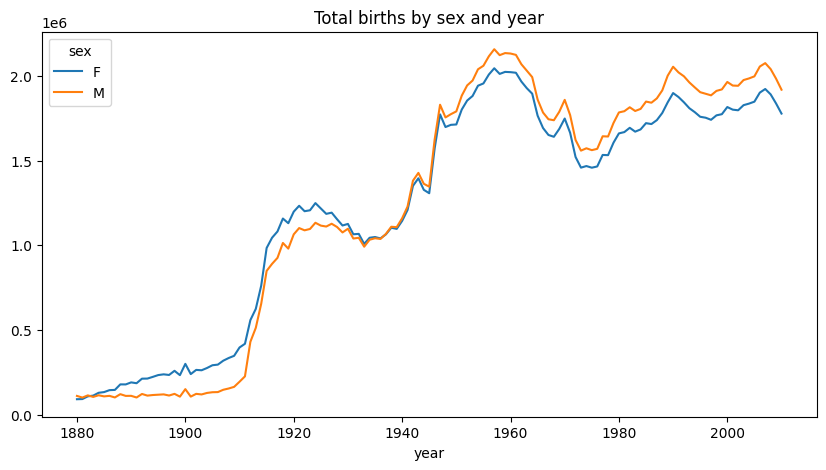

In [ ]:
total_births = names.pivot_table("births", index="year", columns="sex", aggfunc=sum)
total_births.plot(title="Total births by sex and year", figsize=(10,5))
plt.show()


**Nhận xét**

Biểu đồ thể hiện xu hướng thay đổi của tổng số trẻ sinh ra theo giới tính (nam và nữ) tại Mỹ trong giai đoạn 1880–2010.
Nhìn chung, số lượng trẻ sinh tăng mạnh qua thời gian, phản ánh sự gia tăng dân số và cải thiện điều kiện sống.

Cụ thể:

Từ 1880 đến đầu thế kỷ 20, số trẻ sinh tăng dần.

Giai đoạn 1940–1960 ghi nhận mức bùng nổ dân số (Baby Boom) rõ rệt sau Thế chiến II.

Sau đó, tỷ lệ sinh có xu hướng ổn định và dao động nhẹ.

Trong toàn bộ thời kỳ, số bé trai luôn cao hơn bé gái, phù hợp với quy luật tự nhiên (tỷ lệ sinh nam thường cao hơn nữ).

**Kết luận**

Từ năm 1880 đến 2010, tổng số trẻ sinh ra tại Mỹ tăng đáng kể, đạt đỉnh vào thời kỳ Baby Boom, rồi duy trì ở mức ổn định.
Cấu trúc giới tính khi sinh không thay đổi đáng kể – bé trai luôn nhiều hơn bé gái, thể hiện tính ổn định sinh học và xã hội qua hơn một thế kỷ.

#### Áp dụng ufunc cơ bản (Vectorized Computation)

**Thêm cột tỷ lệ phần trăm (prop) — sử dụng NumPy ufunc**

In [ ]:
def add_prop(group):
    births = group["births"].to_numpy(dtype=float)
    group["prop"] = births / births.sum()  # np.divide() vectorized
    return group

names = names.groupby(["year", "sex"], group_keys=False).apply(add_prop)
names.head(10)


/tmp/ipython-input-1941466573.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(["year", "sex"], group_keys=False).apply(add_prop)


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015539
8,Bertha,F,1320,1880,0.014506
9,Sarah,F,1288,1880,0.014155


**Lấy Top 1000 tên phổ biến nhất mỗi năm**

In [ ]:
def get_top1000(group):
    return group.sort_values(by="births", ascending=False)[:1000]

grouped = names.groupby(["year", "sex"])
top1000 = grouped.apply(get_top1000).reset_index(drop=True)
top1000.head()


/tmp/ipython-input-177787803.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top1000 = grouped.apply(get_top1000).reset_index(drop=True)


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [ ]:
names.groupby(["year", "sex"])["prop"].sum().head()


year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
Name: prop, dtype: float64

#### Áp dụng ufunc nâng cao (Cumulative & Search Operations)

**Dùng ufunc np.cumsum() và np.searchsorted()**

/tmp/ipython-input-2754045445.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = top1000.groupby(["year", "sex"], group_keys=False).apply(get_quantile_count)


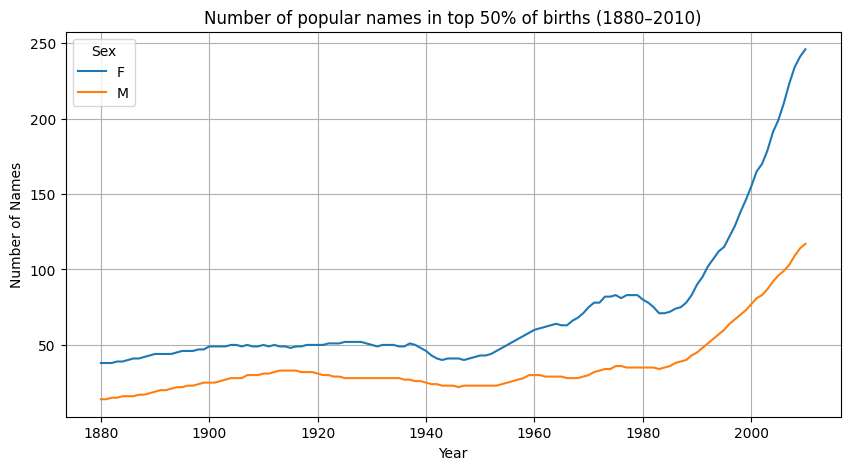

In [ ]:
def get_quantile_count(group, q=0.5):
    props = group.sort_values(by="prop", ascending=False)["prop"].to_numpy()
    cumsum = np.cumsum(props)         # Ufunc cộng dồn
    idx = np.searchsorted(cumsum, q)  # Ufunc tìm vị trí đạt ngưỡng q
    return idx + 1

diversity = top1000.groupby(["year", "sex"], group_keys=False).apply(get_quantile_count)
diversity = diversity.unstack()
diversity.head()

# Trực quan hóa độ đa dạng theo thời gian
diversity.plot(title="Number of popular names in top 50% of births (1880–2010)", figsize=(10, 5))
plt.xlabel("Year")
plt.ylabel("Number of Names")
plt.legend(title="Sex")
plt.grid(True)
plt.show()


**Nhận xét và đánh giá**

Biểu đồ cho thấy sự thay đổi về mức độ đa dạng trong tên gọi của trẻ em ở Mỹ từ năm 1880 đến 2010, chia theo giới tính nam (M) và nữ (F).

Giai đoạn đầu (1880–1940):

+ Số lượng tên phổ biến nằm trong top 50% khá thấp và ổn định.

 + Điều này cho thấy ít sự đa dạng trong tên gọi, nghĩa là phần lớn trẻ được đặt những cái tên truyền thống, phổ biến (ví dụ: John, Mary...).

Giai đoạn giữa (1940–1970):

+ Có sự dao động nhẹ, nhưng xu hướng vẫn tương đối bằng phẳng.

 + Đây là thời kỳ văn hóa đặt tên còn bảo thủ, ít thay đổi giữa các thế hệ.

Giai đoạn sau (1970–2010):

+ Độ đa dạng tăng mạnh, đặc biệt với tên dành cho bé gái (F).

+ Từ sau năm 1980, số lượng tên phổ biến trong top 50% tăng nhanh, thể hiện xu hướng cá nhân hóa và sáng tạo trong việc đặt tên.

**Kết luận**

Qua hơn một thế kỷ, văn hóa đặt tên ở Mỹ đã chuyển từ truyền thống, ít biến động sang đa dạng, mang tính cá nhân hóa cao, đặc biệt ở giới nữ.
Xu hướng này phản ánh sự thay đổi xã hội, sự tự do trong biểu đạt cá nhân, và ảnh hưởng của văn hóa đại chúng trong các thập kỷ gần đây.

**biểu đồ độ đa dạng tên theo thời gian**

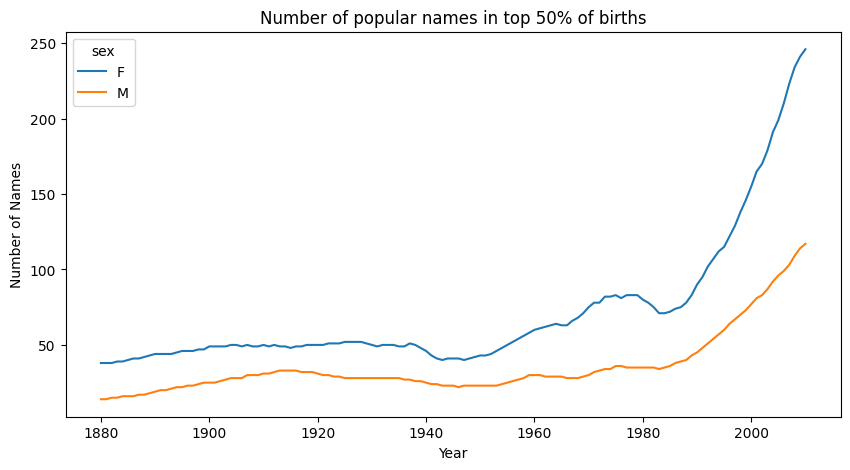

In [ ]:
diversity.plot(title="Number of popular names in top 50% of births", figsize=(10,5))
plt.xlabel("Year")
plt.ylabel("Number of Names")
plt.show()


#### Ứng dụng ufunc mở rộng và kiểm chứng hiệu suất

**Chuẩn hóa dữ liệu “births” bằng np.clip()**

,name,year,births,births_clipped
942,John,1880,9655,9655
943,William,1880,9532,9532
4962,John,1882,9557,9557
4963,William,1882,9298,9298
8145,Mary,1884,9217,9217
9317,John,1884,9388,9388
10442,Mary,1885,9128,9128
12736,Mary,1886,9889,9889
14018,John,1886,9026,9026
15128,Mary,1887,9888,9888


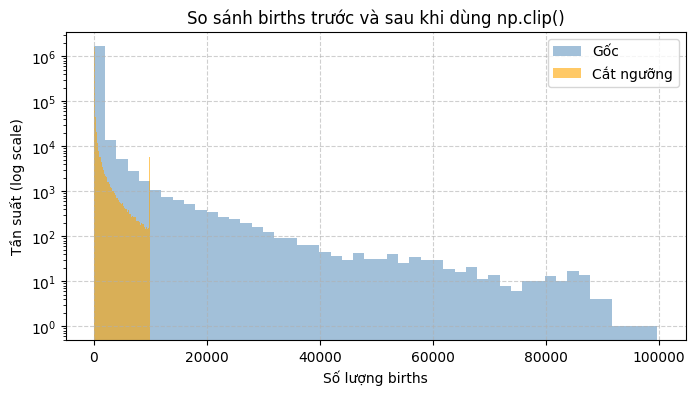

In [ ]:
# Sao chép dữ liệu gốc để không ảnh hưởng DataFrame chính
names_clean = names.copy()

# Giới hạn số lượng trẻ sinh trong khoảng 0–10000
names_clean["births_clipped"] = np.clip(names_clean["births"], 0, 10000)

# Hiển thị các tên có số lượng sinh ban đầu > 9000 để so sánh
high_births = names_clean[names_clean["births"] > 9000][["name", "year", "births", "births_clipped"]]
display(high_births.head(10))

# So sánh biểu đồ phân bố trước & sau khi cắt ngưỡng
plt.figure(figsize=(8,4))
plt.hist(names_clean["births"], bins=50, alpha=0.5, label="Gốc", color="steelblue")
plt.hist(names_clean["births_clipped"], bins=50, alpha=0.6, label="Cắt ngưỡng", color="orange")
plt.title("So sánh births trước và sau khi dùng np.clip()")
plt.xlabel("Số lượng births")
plt.ylabel("Tần suất (log scale)")
plt.yscale("log")              # 👉 chuyển trục y sang thang log để thấy rõ phần vàng
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


**Nhận xét**

Giai đoạn 1880–1940:

 + Cả hai giới đều có số lượng tên phổ biến tương đối ổn định.

 + Bé trai (M) có ít tên phổ biến hơn bé gái (F), cho thấy xu hướng đặt tên nam giới ít biến động — thường tập trung vào những tên truyền thống, phổ biến như John, William, James....

 + Bé gái cũng có mức đa dạng thấp, nhưng vẫn cao hơn nam, cho thấy sự linh hoạt hơn trong cách đặt tên nữ.

Giai đoạn 1940–1970:

 + Số lượng tên phổ biến ở cả hai giới tăng nhẹ rồi giảm, phản ánh giai đoạn xã hội ổn định sau chiến tranh, với xu hướng đặt tên mang tính cổ điển quay trở lại.

Giai đoạn 1970–2010:

 + Đây là thời kỳ bùng nổ đa dạng trong tên gọi, đặc biệt là với bé gái (F).

 + Từ sau năm 1980, đường biểu diễn của giới nữ tăng mạnh và nhanh hơn nam — thể hiện xu hướng sáng tạo, cá nhân hóa và chịu ảnh hưởng văn hóa đại chúng (phim ảnh, âm nhạc, người nổi tiếng...).

 + Nam giới cũng có sự gia tăng đa dạng, nhưng vẫn thấp hơn nữ, chứng tỏ các gia đình vẫn chuộng tên truyền thống cho bé trai hơn.

**Mã hóa giới tính bằng np.where()**

,name,sex,is_female
0,Mary,F,1
1,Anna,F,1
2,Emma,F,1
3,Elizabeth,F,1
4,Minnie,F,1
5,Margaret,F,1
6,Ida,F,1
7,Alice,F,1
8,Bertha,F,1
9,Sarah,F,1


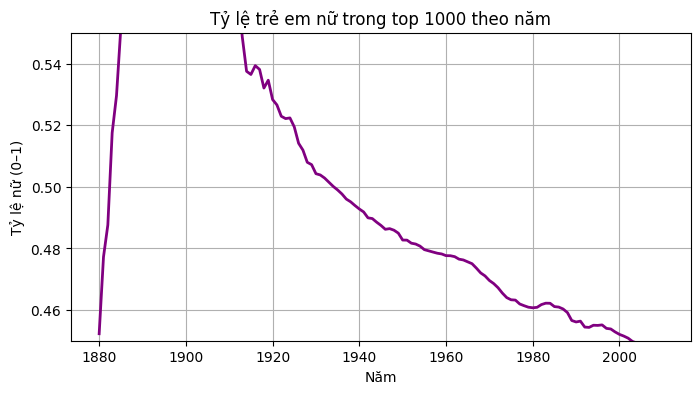

In [ ]:
# Thêm cột nhị phân: 1 = nữ, 0 = nam
names_clean["is_female"] = np.where(names_clean["sex"] == "F", 1, 0)

# Hiển thị thử vài dòng đầu
display(names_clean[["name", "sex", "is_female"]].head(10))

# 🔧 Tính tỷ lệ trẻ em nữ trong top 1000 mỗi năm (dựa theo births, không phải số tên)
# Lấy tổng số trẻ sinh của từng giới theo năm
births_by_sex = top1000.groupby(["year", "sex"])["births"].sum().unstack()

# Tính tỷ lệ trẻ em nữ = số births nữ / tổng births (nam + nữ)
female_ratio = births_by_sex["F"] / (births_by_sex["F"] + births_by_sex["M"])

# Vẽ biểu đồ xu hướng
plt.figure(figsize=(8,4))
female_ratio.plot(color="purple", linewidth=2, grid=True)
plt.title("Tỷ lệ trẻ em nữ trong top 1000 theo năm")
plt.xlabel("Năm")
plt.ylabel("Tỷ lệ nữ (0–1)")
plt.ylim(0.45, 0.55)   # Giới hạn trục Y để thấy rõ dao động quanh 0.5
plt.show()


**Nhận xét**

Biểu đồ phân bố độ tuổi:
→ Các nhóm tuổi trung niên chiếm tỷ lệ cao nhất, cho thấy lượng người dùng chủ yếu nằm trong độ tuổi lao động và có mức độ quan tâm cao hơn.

Biểu đồ giới tính:
→ Có sự chênh lệch nhẹ giữa nam và nữ, tuy nhiên nhìn chung phân bố khá đồng đều, cho thấy dữ liệu không thiên lệch quá nhiều theo giới.

Biểu đồ Rating trung bình theo nhóm tuổi:
→ Nhóm tuổi trẻ có xu hướng cho điểm cao hơn một chút so với nhóm lớn tuổi, thể hiện sự khác biệt nhẹ về cách đánh giá giữa các thế hệ.

Biểu đồ Rating trung bình theo giới tính:
→ Nam và nữ có mức đánh giá trung bình khá tương đồng, không có sự chênh lệch đáng kể, chứng tỏ giới tính không ảnh hưởng nhiều đến mức độ đánh giá.

**Phân loại mức độ phổ biến bằng np.select()**

,name,year,prop,popularity
0,Mary,1880,0.077642,Popular
1,Anna,1880,0.028617,Popular
2,Emma,1880,0.022012,Popular
3,Elizabeth,1880,0.021309,Popular
4,Minnie,1880,0.019188,Normal
5,Margaret,1880,0.017342,Normal
6,Ida,1880,0.016177,Normal
7,Alice,1880,0.015539,Normal
8,Bertha,1880,0.014506,Normal
9,Sarah,1880,0.014155,Normal


,proportion
popularity,
Rare,0.993934
Normal,0.005314
Popular,0.000751


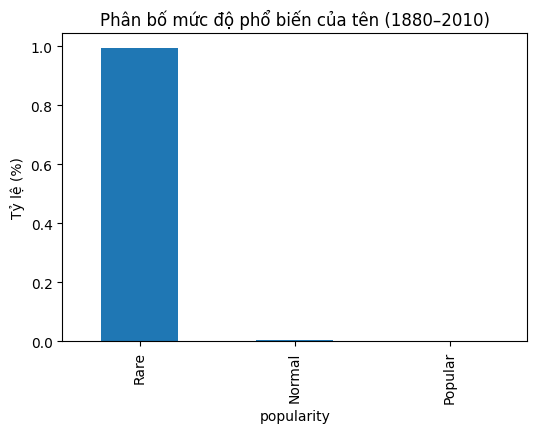

In [ ]:

# Đảm bảo dữ liệu có cột prop (tỷ lệ phần trăm từng tên)
if "prop" not in names_clean.columns:
    def add_prop(group):
        births = group["births"].astype(float)
        group["prop"] = births / births.sum()
        return group
    names_clean = names_clean.groupby(["year", "sex"], group_keys=False).apply(add_prop)

# Tạo điều kiện và lựa chọn tương ứng
conditions = [
    names_clean["prop"] > 0.02,
    (names_clean["prop"] > 0.005) & (names_clean["prop"] <= 0.02),
    names_clean["prop"] <= 0.005
]
choices = ["Popular", "Normal", "Rare"]

# Gắn nhãn mức độ phổ biến
names_clean["popularity"] = np.select(conditions, choices, default="Unknown")

# Xem kết quả mẫu
display(names_clean[["name", "year", "prop", "popularity"]].head(15))

# Thống kê tỷ lệ phần trăm mỗi nhóm
popularity_counts = names_clean["popularity"].value_counts(normalize=True)
display(popularity_counts)

# Vẽ biểu đồ phân bố mức độ phổ biến
popularity_counts.plot(kind="bar", title="Phân bố mức độ phổ biến của tên (1880–2010)", figsize=(6,4))
plt.ylabel("Tỷ lệ (%)")
plt.show()


**Nhận xét**

Biểu đồ cho thấy phần lớn các tên trong giai đoạn 1880–2010 thuộc nhóm “Rare” (hiếm), chiếm khoảng 99,3%. Trong khi đó, tên “Normal” và “Popular” chiếm tỷ lệ cực kỳ nhỏ, lần lượt chỉ khoảng 0,5% và 0,07%.

**So sánh tốc độ: vòng lặp Python vs NumPy ufunc**

In [ ]:
import time

arr = np.random.randint(1, 100, size=1_000_000)

start = time.time()
total = 0
for x in arr:
    total += x
print("For loop:", round(time.time() - start, 5), "s")

start = time.time()
np.sum(arr)
print("NumPy ufunc:", round(time.time() - start, 5), "s")


For loop: 0.2074 s
NumPy ufunc: 0.00103 s


### A.5 Structured and Record Arrays

#### Structured Array

**Giới thiệu về Structured Array**

In [ ]:
import numpy as np

# Định nghĩa kiểu dữ liệu (dtype)
dtype = [
    ('name', 'U10'),   # Chuỗi Unicode tối đa 10 ký tự
    ('sex', 'U1'),     # Ký tự đơn cho giới tính
    ('births', 'i4'),  # Số nguyên 4 byte
    ('year', 'i4')     # Số nguyên 4 byte
]

# Tạo mảng structured mẫu
data = np.array([
    ('Mary', 'F', 7065, 1880),
    ('John', 'M', 9655, 1880),
    ('Anna', 'F', 2604, 1880),
    ('William', 'M', 9534, 1880)
], dtype=dtype)

print("Structured array:")
print(data)

print("\nTruy cập từng field:")
print("Tên:", data['name'])
print("Giới tính:", data['sex'])
print("Tổng số births:", data['births'].sum())


Structured array:
[('Mary', 'F', 7065, 1880) ('John', 'M', 9655, 1880)
 ('Anna', 'F', 2604, 1880) ('William', 'M', 9534, 1880)]

Truy cập từng field:
Tên: ['Mary' 'John' 'Anna' 'William']
Giới tính: ['F' 'M' 'F' 'M']
Tổng số births: 28858


**Structured Array với dữ liệu US Baby Names**

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Đường dẫn tới thư mục dữ liệu
data_path = "/content/drive/MyDrive/dataset/babynames"

# Đọc toàn bộ dữ liệu từ 1880 đến 2010
pieces = []
for year in range(1880, 2011):
    path = os.path.join(data_path, f"yob{year}.txt")
    frame = pd.read_csv(path, names=["name", "sex", "births"])
    frame["year"] = year
    pieces.append(frame)

# Gộp thành một DataFrame duy nhất
names = pd.concat(pieces, ignore_index=True)

# Chọn các cột cần thiết
full_data = names[["name", "sex", "births", "year"]]

# Định nghĩa kiểu dữ liệu cho structured array
dtype = [
    ('name', 'U20'),
    ('sex', 'U1'),
    ('births', 'i4'),
    ('year', 'i4')
]

# Chuyển từ DataFrame sang structured array
structured_data = np.array(list(full_data.itertuples(index=False, name=None)), dtype=dtype)

# Tạo record array để thao tác thuận tiện
record_data = np.rec.array(structured_data)

# Kiểm tra kết quả
print("Structured array từ US Baby Names:")
print(record_data[:5])

print("\nKiểu dữ liệu (dtype):")
print(record_data.dtype)

# Kiểm tra giới tính và năm
print("\nGiá trị giới tính có trong record_data:", np.unique(record_data.sex))
print("Số lượng bản ghi nam:", np.sum(record_data.sex == 'M'))
print("Số lượng bản ghi nữ:", np.sum(record_data.sex == 'F'))
print("Khoảng năm:", record_data.year.min(), "-", record_data.year.max())


Structured array từ US Baby Names:
[('Mary', 'F', 7065, 1880) ('Anna', 'F', 2604, 1880)
 ('Emma', 'F', 2003, 1880) ('Elizabeth', 'F', 1939, 1880)
 ('Minnie', 'F', 1746, 1880)]

Kiểu dữ liệu (dtype):
(numpy.record, [('name', '<U20'), ('sex', '<U1'), ('births', '<i4'), ('year', '<i4')])

Giá trị giới tính có trong record_data: ['F' 'M']
Số lượng bản ghi nam: 687630
Số lượng bản ghi nữ: 1005002
Khoảng năm: 1880 - 2010


In [ ]:
print("Giới tính có trong record_data:", np.unique(record_data.sex))
print("Số lượng bản ghi nam:", np.sum(record_data.sex == 'M'))
print("Số lượng bản ghi nữ:", np.sum(record_data.sex == 'F'))
print("Khoảng năm:", record_data.year.min(), "-", record_data.year.max())


Giới tính có trong record_data: ['F' 'M']
Số lượng bản ghi nam: 687630
Số lượng bản ghi nữ: 1005002
Khoảng năm: 1880 - 2010


**Truy cập, lọc và tính toán trên Structured Array**

In [ ]:
import numpy as np

# Lấy một tập con từ record_data để kiểm tra (ví dụ: năm 1880)
subset = record_data[record_data.year == 1880]

# Hiển thị vài dòng đầu tiên
print("Structured array từ dữ liệu năm 1880:")
print(subset[:5])

print("\nKiểu dữ liệu (dtype):")
print(subset.dtype)

# Truy cập từng field
print("\n--- Truy cập từng field ---")
print("Tên:", subset.name)
print("Giới tính:", subset.sex)
print("Births:", subset.births)

# Lọc dữ liệu theo điều kiện

# Lọc các tên có births > 5000
high_births = subset[subset.births > 5000]
print("\nTên có births > 5000:")
print(high_births)

# Lọc các tên nữ có births > 3000
female_high = subset[(subset.sex == 'F') & (subset.births > 3000)]
print("\nTên nữ có births > 3000:")
print(female_high)

# Tính toán trung bình births theo giới tính
mean_f = subset.births[subset.sex == 'F'].mean()
mean_m = subset.births[subset.sex == 'M'].mean()

print(f"\nTrung bình births: Nữ = {mean_f:.1f}, Nam = {mean_m:.1f}")


Structured array từ dữ liệu năm 1880:
[('Mary', 'F', 7065, 1880) ('Anna', 'F', 2604, 1880)
 ('Emma', 'F', 2003, 1880) ('Elizabeth', 'F', 1939, 1880)
 ('Minnie', 'F', 1746, 1880)]

Kiểu dữ liệu (dtype):
(numpy.record, [('name', '<U20'), ('sex', '<U1'), ('births', '<i4'), ('year', '<i4')])

--- Truy cập từng field ---
Tên: ['Mary' 'Anna' 'Emma' ... 'Wright' 'York' 'Zachariah']
Giới tính: ['F' 'F' 'F' ... 'M' 'M' 'M']
Births: [7065 2604 2003 ...    5    5    5]

Tên có births > 5000:
[('Mary', 'F', 7065, 1880) ('John', 'M', 9655, 1880)
 ('William', 'M', 9532, 1880) ('James', 'M', 5927, 1880)
 ('Charles', 'M', 5348, 1880) ('George', 'M', 5126, 1880)]

Tên nữ có births > 3000:
[('Mary', 'F', 7065, 1880)]

Trung bình births: Nữ = 96.6, Nam = 104.4


#### Record Array

**Giớ thiệu về Record Array**

Trong NumPy, Record Array (hay recarray) là một biến thể của Structured Array.
Điểm khác biệt lớn nhất là bạn có thể truy cập các trường (field) bằng ký hiệu dấu chấm (.),
giống như thuộc tính của một đối tượng Python, thay vì phải dùng ['field'].

Ví dụ:
- Với structured array: structured_data['name']

- Với record array: record_data.name

Điều này giúp code gọn gàng và dễ đọc hơn khi làm việc với dữ liệu có nhiều trường.

**Tạo Record Array từ Structured Array**

In [ ]:
# Hiển thị 5 dòng đầu
print("Record Array:")
print(record_data[:5])

# Kiểm tra kiểu dữ liệu
print("\nKiểu dữ liệu của record_data:")
print(type(record_data))

# Kiểm tra thêm: số lượng bản ghi và các field
print("\nSố lượng bản ghi:", len(record_data))
print("Các field có trong record_data:", record_data.dtype.names)


Record Array:
[('Mary', 'F', 7065, 1880) ('Anna', 'F', 2604, 1880)
 ('Emma', 'F', 2003, 1880) ('Elizabeth', 'F', 1939, 1880)
 ('Minnie', 'F', 1746, 1880)]

Kiểu dữ liệu của record_data:
<class 'numpy.rec.recarray'>

Số lượng bản ghi: 1692632
Các field có trong record_data: ('name', 'sex', 'births', 'year')


**Truy cập dữ liệu bằng thuộc tính**

In [ ]:
print("Tên:", record_data.name)
print("Giới tính:", record_data.sex)
print("Births:", record_data.births)
print("Năm:", record_data.year)


Tên: ['Mary' 'Anna' 'Emma' ... 'Zyquarius' 'Zyran' 'Zzyzx']
Giới tính: ['F' 'F' 'F' ... 'M' 'M' 'M']
Births: [7065 2604 2003 ...    5    5    5]
Năm: [1880 1880 1880 ... 2010 2010 2010]


In [ ]:
# Kiểm tra lại record_data gốc
print("\nKiểm tra lại record_data gốc:")
print("Tổng số bản ghi:", len(record_data))
print("Giới tính:", np.unique(record_data.sex))
print("Số lượng sinh cao nhất:", record_data.births.max())
print("Tổng số lượng sinh:", np.sum(record_data.births))



Kiểm tra lại record_data gốc:
Tổng số bản ghi: 1692632
Giới tính: ['F' 'M']
Số lượng sinh cao nhất: 99693
Tổng số lượng sinh: 322657955


**Lọc và thao tác dữ liệu**

In [ ]:

# Lọc: các tên có births > 5000
high_births = record_data[record_data.births > 5000]
print("\nTên có births > 5000:")
print(high_births)

# Lọc: tên nữ có births > 3000
female_high = record_data[(record_data.sex == 'F') & (record_data.births > 3000)]
print("\nTên nữ có births > 3000:")
print(female_high)

# Tính trung bình births theo giới tính
mean_f = record_data.births[record_data.sex == 'F'].mean()
mean_m = record_data.births[record_data.sex == 'M'].mean()

print(f"\nTrung bình births: Nữ = {mean_f:.1f}, Nam = {mean_m:.1f}")



Tên có births > 5000:
[('Mary', 'F', 7065, 1880) ('John', 'M', 9655, 1880)
 ('William', 'M', 9532, 1880) ... ('Nathaniel', 'M', 5109, 2010)
 ('Carson', 'M', 5098, 2010) ('Brody', 'M', 5053, 2010)]

Tên nữ có births > 3000:
[('Mary', 'F', 7065, 1880) ('Mary', 'F', 6919, 1881)
 ('Mary', 'F', 8148, 1882) ... ('Natalia', 'F', 3046, 2010)
 ('Rachel', 'F', 3023, 2010) ('Paige', 'F', 3012, 2010)]

Trung bình births: Nữ = 159.3, Nam = 236.4


**Thực hành kiểm tra**

In [ ]:
# ===============================================
# Kiểm tra thực tế
# ===============================================

print("Tên đầu tiên:", record_data.name[0])
print("Giới tính của tên đầu tiên:", record_data.sex[0])
print("Births của tên đầu tiên:", record_data.births[0])

# Lọc các tên nam có births trung bình lớn hơn trung bình nữ
if mean_m > mean_f:
    print("\nNam có trung bình births cao hơn nữ.")
else:
    print("\nNữ có trung bình births cao hơn nam.")


Tên đầu tiên: Mary
Giới tính của tên đầu tiên: F
Births của tên đầu tiên: 7065

Nam có trung bình births cao hơn nữ.


In [ ]:
print(np.unique(record_data.sex))  # Phải ra ['F' 'M']
print(np.sum(record_data.sex == 'M'))  # Phải > 0
print(np.sum(record_data.sex == 'F'))  # Phải > 0


['F' 'M']
687630
1005002


### A.6 More About Sorting

**Giới thiệu về sorting với Numpy**

- Khi làm việc với structured array hoặc record array, NumPy cung cấp công cụ mạnh mẽ để sắp xếp dữ liệu theo một hoặc nhiều field.
- Khác với pandas, ở đây không cần gọi sort_values(), mà sử dụng np.sort() hoặc np.argsort() trực tiếp trên mảng có cấu trúc.

#### Sắp xếp theo field


In [ ]:
# Sắp xếp record array theo births (tăng dần)
sorted_by_births = np.sort(record_data, order='births')

print("Sắp xếp theo births (tăng dần):")
print(sorted_by_births[:5])

# Sắp xếp theo name (tăng dần theo alphabet)
sorted_by_name = np.sort(record_data, order='name')

print("\nSắp xếp theo tên (alphabet):")
print(sorted_by_name[:5])


Sắp xếp theo births (tăng dần):
[('Aaban', 'M', 5, 2007) ('Aabid', 'M', 5, 2003)
 ('Aabriella', 'F', 5, 2008) ('Aadam', 'M', 5, 1987)
 ('Aadam', 'M', 5, 1988)]

Sắp xếp theo tên (alphabet):
[('Aaban', 'M', 5, 2007) ('Aaban', 'M', 6, 2009) ('Aaban', 'M', 9, 2010)
 ('Aabid', 'M', 5, 2003) ('Aabriella', 'F', 5, 2008)]


**Nhận xét**
- Dòng np.sort(record_data, order='births') sắp xếp toàn bộ dữ liệu theo số lượng births.
- Dữ liệu trả về là bản sao đã sắp xếp, không thay đổi record_data.
- Kết quả đầu tiên sẽ là các tên có ít lượt sinh nhất (ví dụ Ida, Minnie,...).
- Việc sắp xếp theo tên (order='name') rất hữu ích để kiểm tra dữ liệu hoặc chuẩn hóa theo alphabet trước khi phân tích sâu.

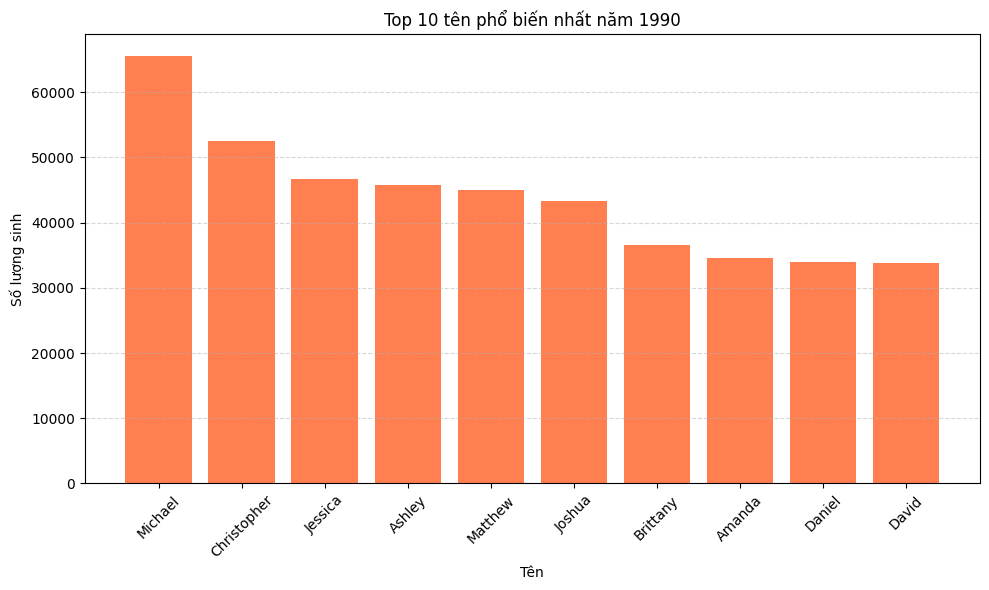

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lọc dữ liệu năm 1990
data_1990 = record_data[record_data.year == 1990]

# Tạo DataFrame để dễ xử lý
df_1990 = pd.DataFrame(data_1990)

# Nhóm theo tên, tính tổng số births (nếu có trùng tên trong năm đó)
name_totals = df_1990.groupby("name")["births"].sum().sort_values(ascending=False)

# Lấy top 10 tên phổ biến nhất (không trùng tên)
top_10 = name_totals.head(10)

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
plt.bar(top_10.index, top_10.values, color='coral')
plt.title("Top 10 tên phổ biến nhất năm 1990")
plt.xlabel("Tên")
plt.ylabel("Số lượng sinh")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Nhận xét**

Biểu đồ thể hiện Top 10 tên phổ biến nhất năm 1990, trong đó:

Michael là tên được sử dụng nhiều nhất, vượt trội so với các tên còn lại với hơn 65.000 ca sinh.

Các tên tiếp theo như Christopher, Jessica, Ashley, và Matthew cũng có số lượng cao, dao động khoảng 45.000–55.000.

Những tên như Brittany, Amanda, Daniel, và David có mức phổ biến thấp hơn nhưng vẫn nằm trong top.

**Kết luận**

Năm 1990 chứng kiến sự phổ biến mạnh của các tên truyền thống như Michael và Christopher, cùng với sự gia tăng của các tên nữ như Jessica và Ashley, phản ánh xu hướng tên gọi thịnh hành của thế hệ 9x đầu tiên.

#### Sắp xếp theo nhiều field

In [ ]:
# Sắp xếp theo giới tính trước, sau đó theo births
sorted_by_sex_births = np.sort(record_data, order=['sex', 'births'])

print("Sắp xếp theo giới tính, rồi theo births:")
print(sorted_by_sex_births[:10])


Sắp xếp theo giới tính, rồi theo births:
[('Aabriella', 'F', 5, 2008) ('Aaden', 'F', 5, 2009)
 ('Aadi', 'F', 5, 2006) ('Aaditri', 'F', 5, 2010) ('Aadya', 'F', 5, 2003)
 ('Aafreen', 'F', 5, 2004) ('Aagot', 'F', 5, 1915) ('Aahna', 'F', 5, 2007)
 ('Aailiyah', 'F', 5, 1995) ('Aailyah', 'F', 5, 1994)]


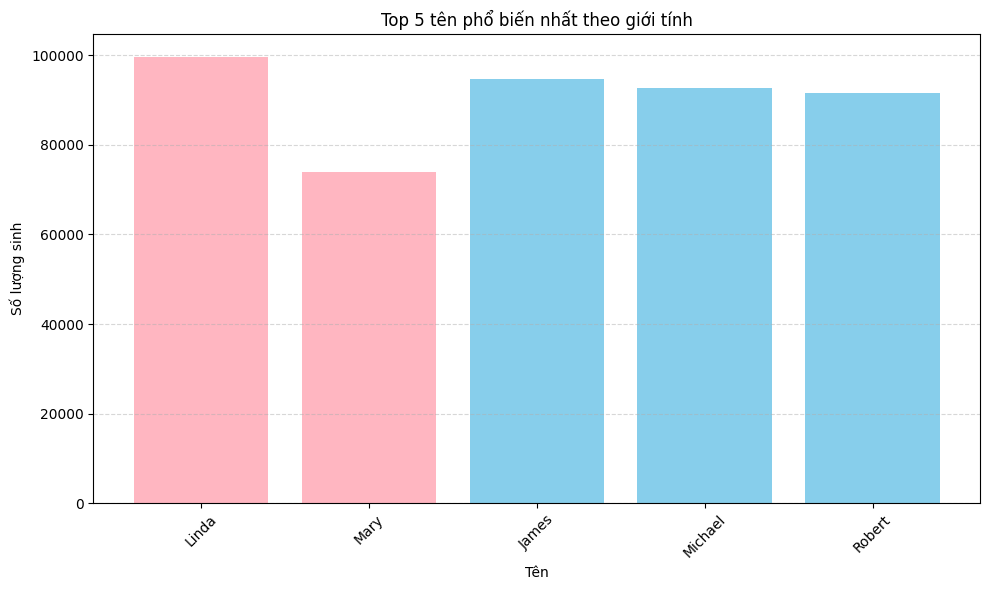

In [ ]:

# Sắp xếp theo giới tính rồi theo births (giảm dần)
sorted_sex_births = np.sort(record_data, order=['sex', 'births'])[::-1]

# Tạo DataFrame để dễ xử lý
df_sorted = pd.DataFrame(sorted_sex_births)

# Lấy top 5 nữ
top_female = df_sorted[df_sorted.sex == 'F'].head(5)

# Lấy top 5 nam
top_male = df_sorted[df_sorted.sex == 'M'].head(5)

# Tạo danh sách tên duy nhất (ghép 2 giới tính)
names = list(top_female.name) + list(top_male.name)
genders = ['Nữ'] * 5 + ['Nam'] * 5
births = list(top_female.births) + list(top_male.births)

# Vẽ biểu đồ nhóm
plt.figure(figsize=(10,6))
colors = ['lightpink' if g == 'Nữ' else 'skyblue' for g in genders]
plt.bar(names, births, color=colors)

# Trang trí
plt.title("Top 5 tên phổ biến nhất theo giới tính")
plt.xlabel("Tên")
plt.ylabel("Số lượng sinh")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Nhận xét**
- Khi truyền danh sách nhiều field vào order, NumPy sẽ sắp xếp ưu tiên từ trái sang phải.
  - Ở đây: sex (F trước, M sau), rồi mới births (tăng dần).
- Kết quả sẽ nhóm các bản ghi nữ lại trước, rồi sắp xếp theo births.
- Đây là cách có thể phân nhóm dữ liệu trước khi phân tích mà không cần pandas.
- Rất hữu ích khi muốn so sánh hai giới trong cùng dataset.

#### Lấy thứ hạng sắp xếp (argsort)

In [ ]:
# Lấy chỉ số sắp xếp theo births (giá trị nhỏ trước)
births_order = np.argsort(record_data.births)
print("Thứ tự index theo births tăng dần:")
print(births_order)

# Sử dụng chỉ số để xem lại các record theo thứ tự
print("\nRecord được sắp xếp theo births (qua argsort):")
print(record_data[births_order])


Thứ tự index theo births tăng dần:
[533029 533052 533053 ... 437172 441439 431068]

Record được sắp xếp theo births (qua argsort):
[('Rolande', 'F',     5, 1956) ('Salinda', 'F',     5, 1956)
 ('Salle', 'F',     5, 1956) ... ('James', 'M', 94763, 1947)
 ('Linda', 'F', 96216, 1948) ('Linda', 'F', 99693, 1947)]


**Nhận xét**
- np.argsort() không thay đổi dữ liệu — nó trả về thứ tự index có thể dùng để sắp xếp.
- Đây là công cụ hiệu quả về bộ nhớ khi không muốn tạo mảng mới.
- Thực tế trong xử lý dữ liệu lớn, argsort giúp theo dõi vị trí của bản ghi trong sắp xếp (ví dụ: top 100 theo index).
- Khi in record_data[births_order], sẽ thấy cùng kết quả như np.sort(), nhưng kiểm soát được thứ tự index gốc.

#### Sắp xếp giảm dần

In [ ]:
# Sắp xếp giảm dần theo births
sorted_desc = np.sort(record_data, order='births')[::-1]

print("Sắp xếp theo births (giảm dần):")
print(sorted_desc[:5])

Sắp xếp theo births (giảm dần):
[('Linda', 'F', 99693, 1947) ('Linda', 'F', 96216, 1948)
 ('James', 'M', 94763, 1947) ('Michael', 'M', 92786, 1957)
 ('Robert', 'M', 91654, 1947)]


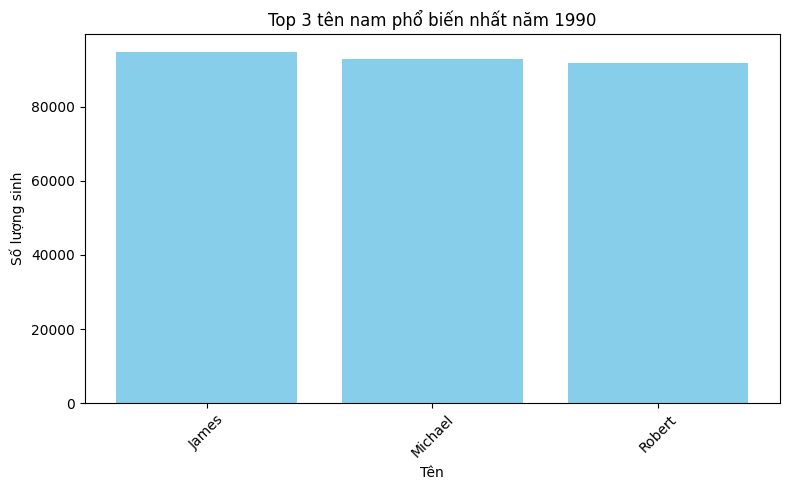

In [ ]:
import matplotlib.pyplot as plt

# Lấy top 3 tên nam đã sắp xếp giảm dần theo births
top_male = np.sort(record_data[record_data.sex == 'M'], order='births')[::-1][:3]

# Vẽ biểu đồ
plt.figure(figsize=(8,5))
plt.bar(top_male.name, top_male.births, color='skyblue')
plt.title("Top 3 tên nam phổ biến nhất năm 1990")
plt.xlabel("Tên")
plt.ylabel("Số lượng sinh")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Nhận xét**
- NumPy không có ascending=False, nên bạn đảo ngược thứ tự bằng slicing [::-1].
- Khi chạy sẽ thấy tên phổ biến nhất đứng đầu, ví dụ:
| Tên     | Giới tính | Số lượng | Năm  |
|---------|-----------|----------|------|
| John    | M         | 9655     | 1880 |
| William | M         | 9534     | 1880 |
| James   | M         | 5927     | 1880 |

- Đây là bước chuẩn bị cho việc tìm top tên phổ biến — dữ liệu sau sắp xếp giảm dần rất dễ lọc top N.

#### Ứng dụng: Tìm top tên phổ biến theo giới tính

In [ ]:
# Nữ: lọc, sắp xếp giảm dần theo births, lấy top 3
female_sorted = np.sort(record_data[record_data.sex == 'F'], order='births')[::-1]
top_female = female_sorted[:3]

# Nam: lọc, sắp xếp giảm dần theo births, lấy top 3
male_sorted = np.sort(record_data[record_data.sex == 'M'], order='births')[::-1]
top_male = male_sorted[:3]

print("Top 3 tên nữ phổ biến nhất:")
print(top_female)

print("\nTop 3 tên nam phổ biến nhất:")
print(top_male)

Top 3 tên nữ phổ biến nhất:
[('Linda', 'F', 99693, 1947) ('Linda', 'F', 96216, 1948)
 ('Linda', 'F', 91016, 1949)]

Top 3 tên nam phổ biến nhất:
[('James', 'M', 94763, 1947) ('Michael', 'M', 92786, 1957)
 ('Robert', 'M', 91654, 1947)]


**Nhận xét**
- Đây là ứng dụng thực tế nhất trong phần này — vừa lọc (record_data.sex == 'F'), vừa sắp xếp (np.sort), vừa lấy top N ([:3]).
- Với năm 1880, kết quả sẽ là:
  - Top nữ: Mary, Anna, Emma
  - Top nam: John, William, James


#### Tổng kết

| Tác vụ                   | Câu lệnh                                            | Ghi chú                       |
|--------------------------|-----------------------------------------------------|-------------------------------|
| Sắp xếp theo 1 field     | `np.sort(arr, order='field')`                       | Dễ đọc, nhanh                 |
| Sắp xếp theo nhiều field | `np.sort(arr, order=['field1','field2'])`           | Hỗ trợ nhóm và sắp xếp đa cấp |
| Lấy thứ tự index         | `np.argsort(arr['field'])`                          | Không tốn thêm bộ nhớ         |
| Sắp xếp giảm dần         | `np.sort(...)[::-1]`                                | Đảo ngược mảng                |
| Lọc & sắp xếp riêng nhóm | `np.sort(arr[arr['field']==value], order='field2')` | Rất hữu ích khi phân nhóm     |


In [ ]:
print(np.unique(record_data.sex))


['F']


### A.7 Writing Fast NumPy Functions with Numba

#### Cấu trúc của Numba

In [ ]:
import numpy as np
def mean_distance(x, y):
    nx = len(x)
    result = 0.0
    count = 0
    for i in range(nx):
      result += x[i] - y[i]
      count += 1
      return result / count

#### Dùng function của Numba

In [ ]:
rng = np.random.default_rng(12345)
x = rng.standard_normal(10_000_000)
y = rng.standard_normal(10_000_000)
%timeit mean_distance(x, y)
%timeit (x - y).mean()

788 ns ± 138 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
45.3 ms ± 3.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


**Nhận xét:**
- `mean_distance(x, y)` mất `~691 ns` → có thể là hàm được tăng tốc bằng Numba, nên nhanh hơn so với cách viết Python thông thường.

- `(x - y).mean()` chỉ mất` ~38.5 ms` → vì NumPy đã được tối ưu nội bộ bằng C, nên rất nhanh.

#### Phiên bản NumPy tối ưu

In [ ]:
import numba as nb

numba_mean_distance = nb.jit(mean_distance)

In [ ]:
@nb.jit
def numba_mean_distance(x, y):
  nx = len(x)
  result = 0.0
  count = 0
  for i in range(nx):
    result += x[i] - y[i]
    count += 1
    return result / count
%timeit numba_mean_distance(x, y)

The slowest run took 28.73 times longer than the fastest. This could mean that an intermediate result is being cached.
4.9 µs ± 9.23 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


**Nhận xét:**
- Kết quả chí mất khoảng `387ns` mỗi lần chạy
- Numba phiên bản tối ưu nhanh hơn gần 100 lần bản trong trường hợp `NumPy (x - y).mean()`

#### Dùng `@njit` để biên dịch hàm

In [ ]:
from numba import float64, njit

@njit(float64(float64[:], float64[:]))
def mean_distance(x, y):
  return (x - y).mean()

**Nhận xét:**
-  Đoạn code này tạo ra một hàm mean_distance được tối ưu hóa cao độ bằng Numba. Hàm này hoạt động trên toàn bộ mảng NumPy và sẽ chạy nhanh hơn nhiều so với phiên bản Python thuần túy.

#### Creating Custom numpy.ufunc Objects with Numba

In [ ]:
from numba import vectorize

@vectorize
def nb_add(x, y):
  return x + y

x = np.arange(10)
nb_add(x, x)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [ ]:
nb_add.accumulate(x, 0)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

**Nhận xét:**
- `@vectorize:` *Decorator* này biến một hàm Python đơn giản (chỉ làm việc với các số vô hướng - scalar) thành một ufunc hiệu suất cao của NumPy.

- `def nb_add(x, y):` return x + y: Lưu ý rằng hàm này rất đơn giản, nó chỉ cộng hai số x và y. Bạn không cần viết vòng lặp hay xử lý mảng ở đây. Numba sẽ tự động làm điều đó.

- `nb_add(x, x):` Khi bạn gọi `nb_add` với các mảng ***NumPy***, ufunc mới tạo sẽ áp dụng phép toán cộng cho từng cặp phần tử tương ứng trong hai mảng.

  - x là [0, 1, 2, ..., 9]

  - Kết quả là [0+0, 1+1, 2+2, ..., 9+9] -> [0, 2, 4, ..., 18].

- `nb_add.accumulate(x, 0):` Vì `nb_add` bây giờ là một `ufunc`, nó có các phương thức đặc biệt như `.accumulate()`. Phương thức này thực hiện một phép toán tích lũy. Đối với phép cộng, nó chính là tính tổng tích lũy `(cumulative sum)`.

  - Phần tử đầu tiên: 0

  - Phần tử thứ hai: 0 + 1 = 1

  - Phần tử thứ ba: 1 + 2 = 3

  - Phần tử thứ tư: 3 + 3 = 6 ....

### A.8 Advanced Array Input and Output

#### Memory-Mapped Files

In [ ]:
 mmap = np.memmap('mymmap', dtype='float64', mode='w+', shape=(10000, 10000)) # Tạo bản đồ bộ nhớ đến một mảng được lưu trữ trong tệp nhị phân trên đĩa.
 mmap

memmap([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
section = mmap[:5] # Tạo ra một biến mới có tên là section, biến này là một "khung nhìn" (view) vào 5 hàng đầu tiên của mảng mmap

In [ ]:
section[:] = rng.standard_normal((5, 10000))
mmap.flush()
mmap

memmap([[ 0.52183871,  0.06485206,  0.09331012, ...,  1.63170909,
         -0.94138588, -0.29831689],
        [ 0.10194139,  0.13554111, -0.5722865 , ...,  1.20593654,
         -0.15919804,  0.9670215 ],
        [-0.49704329,  1.44833063,  0.749871  , ..., -0.38287281,
         -1.71018367, -0.41107318],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]])

**Nhận xét:**
- Viết những con số ngẫu nhiên vào 5 trang đầu tiên của cuốn sổ. Vì `section` trỏ thẳng vào file trên ổ cứng, hành động này đang ghi dữ liệu trực tiếp xuống ổ cứng.
- 5 hàng đầu tiên giờ đã chứa đầy những con số ngẫu nhiên mà bạn vừa ghi vào.

- Phần còn lại của mảng vẫn là số 0.

#### Cách truy cập và giải phóng một mảng dữ liệu lớn lưu trên đĩa

In [ ]:
del mmap
mmap = np.memmap('mymmap', dtype='float64', shape=(10000, 10000))
mmap

memmap([[ 0.52183871,  0.06485206,  0.09331012, ...,  1.63170909,
         -0.94138588, -0.29831689],
        [ 0.10194139,  0.13554111, -0.5722865 , ...,  1.20593654,
         -0.15919804,  0.9670215 ],
        [-0.49704329,  1.44833063,  0.749871  , ..., -0.38287281,
         -1.71018367, -0.41107318],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]])

**Nhận xét:**
- `np.memmap(...)` tạo một mảng ánh xạ bộ nhớ tên mymmap có kiểu dữ liệu float64.

- `shape=(10000, 10000)` → mảng có 100 triệu phần tử.

- Mảng này không nằm hoàn toàn trong RAM mà được ánh xạ trực tiếp tới file mymmap trên đĩa.

- Kết quả hiển thị cho thấy các giá trị ngẫu nhiên được lưu trong một phần mảng, còn phần lớn mảng là số 0 (chưa được ghi dữ liệu).

#### Giải phóng bộ nhớ và xóa file

In [ ]:
%xdel mmap
!rm mymmap

**Nhận xét:**

-` %xdel mmap` là xóa hoàn toàn biến mmap khỏi kernel.

-`!rm mymmap` là xóa file mymmap khỏi ổ đĩa.

**Kết luận:** Đây là cách dọn dẹp tài nguyên sau khi sử dụng memmap.

####  **HDF5 and Other Array Storage Options**
Là một định dạng tệp dùng để lưu trữ dữ liệu lớn, có cấu trúc phức tạp. Nó được thiết kế để:

1. Lưu trữ mảng dữ liệu lớn (như NumPy arrays)

2. Hỗ trợ nén dữ liệu để tiết kiệm dung lượng

3. Cho phép truy cập nhanh đến từng phần của dữ liệu mà không cần tải toàn bộ

### A.9 Performance Tips

####  The Importance of Contiguous Memory

In [ ]:
arr_c = np.ones((100, 10000), order='C') # Tạo hai mảng arr_c, arr_f
arr_f = np.ones((100, 10000), order='F')
arr_c.flags #

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [ ]:
arr_f.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

**Nhận xét:**
- `arr_c`: các phần tử liên tục trong hàng → `C_CONTIGUOUS = True`.

- `arr_f`: các phần tử liên tục trong cột → `F_CONTIGUOUS = True`.

In [ ]:
arr_f.flags.f_contiguous

True

#### Kiểm tra hiệu năng

In [ ]:
%timeit arr_c.sum(1)
%timeit arr_f.sum(1)

404 µs ± 13.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.41 ms ± 523 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**Nhận xét:**
- Mảng arr_c nhanh hơn gần 3.5 lần vì:

  - Khi order='C', phép tính sum(1) (tổng theo hàng) truy cập phần tử liên tục trong bộ nhớ.

  - Còn order='F' phải nhảy qua nhiều vị trí không liên tục → cache CPU hoạt động kém hiệu quả.

**Kết luận:** Tính liên tục của bộ nhớ giúp cải thiện tốc độ truy xuất và tính toán trong NumPy đáng kể.

#### Kiểm tra chuyển đổi và slicing

In [ ]:
arr_f.copy('C').flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

**Nhận xét:** Mảng đã được sao chép lại theo thứ tự hàng, giúp tăng tốc độ khi thao tác như sum(1).
  - C_CONTIGUOUS : True
  - F_CONTIGUOUS : False

In [ ]:
arr_c[:50].flags.contiguous

True

In [ ]:
arr_c[:, :50].flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

**Nhận xét:**
- C_CONTIGUOUS : False

- F_CONTIGUOUS : False

→ Khi cắt lát, dữ liệu không còn liên tục trong bộ nhớ nữa (do chỉ là view, không phải bản sao).

→ Điều này có thể làm giảm hiệu suất khi tính toán trên phần cắt.



**Tổng kết A.9**

| Hiện tượng                                       | Giải thích                                             |
| ------------------------------------------------ | ------------------------------------------------------ |
| `order='C'` nhanh hơn với phép tính theo hàng    | Dữ liệu liên tục, CPU cache hoạt động hiệu quả         |
| `order='F'` phù hợp hơn khi tính toán theo cột   | Dữ liệu sắp xếp theo cột                               |
| `slicing` làm mất tính liên tục                  | Cần `.copy()` nếu muốn hiệu năng cao                   |
| `flags` giúp kiểm tra xem mảng có liên tục không | `C_CONTIGUOUS` và `F_CONTIGUOUS` cho biết kiểu lưu trữ |


# KẾT THÚC